In [1]:
# Lib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import pywt
from scipy import signal
from scipy.optimize import curve_fit

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
import scipy 
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (15, 15) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
import warnings
warnings.filterwarnings('ignore')

# 1.  Import all data files and create one DataFrame

In [2]:
# Define Column Names
columns=["timeRelativeRef", "samplingTime", "epoch", "latitude","longitude","altitude","speed", 
            "satellites","accelerationX", "accelerationY", "accelerationZ", "roll", "pitch","yaw",
            "temperatur","humidity", "barometricPressure","light","PM1.0_CF1", "PM2.5_CF1", "PM10.0_CF1",
            "PM1.0_Auto", "PM2.5_Auto", "PM10.0_Auto","label"]

In [3]:
# Read all data
Bricked1 = pd.read_csv(r"C:\Users\ckmai\LaneProject\R.O.A.D-System\Labeled Training data\Bricked road\DATA002.CSV", names=columns)
Bricked2 = pd.read_csv(r"C:\Users\ckmai\LaneProject\R.O.A.D-System\Labeled Training data\Bricked road\DATA004.CSV", names=columns)

Manhole = pd.read_csv(r"C:\Users\ckmai\LaneProject\R.O.A.D-System\Labeled Training data\Manhole\DATA004.CSV", names=columns)

Pothole1 = pd.read_csv(r"C:\Users\ckmai\LaneProject\R.O.A.D-System\Labeled Training data\Pothole\DATA001.CSV", names=columns)
#Pothole2 = pd.read_csv("C:\Users\ckmai\LaneProject\R.O.A.D-System\Labeled Training data\Pothole\DATA002.CSV", names=columns)
Pothole3 = pd.read_csv(r"C:\Users\ckmai\LaneProject\R.O.A.D-System\Labeled Training data\Pothole\DATA003.CSV", names=columns)

RoadJoint1 = pd.read_csv(r"C:\Users\ckmai\LaneProject\R.O.A.D-System\Labeled Training data\Road joint\DATA001.CSV", names=columns)
RoadJoint2 = pd.read_csv(r"C:\Users\ckmai\LaneProject\R.O.A.D-System\Labeled Training data\Road joint\DATA003.CSV", names=columns)

StormBasin1 = pd.read_csv(r"C:\Users\ckmai\LaneProject\R.O.A.D-System\Labeled Training data\Storm basin\DATA001.CSV", names=columns)
StormBasin2 = pd.read_csv(r"C:\Users\ckmai\LaneProject\R.O.A.D-System\Labeled Training data\Storm basin\DATA002.CSV", names=columns)
StormBasin3 = pd.read_csv(r"C:\Users\ckmai\LaneProject\R.O.A.D-System\Labeled Training data\Storm basin\DATA003.CSV", names=columns)

In [4]:
# add labels in all DataFrames

Bricked1['label'] = 'bricked'
Bricked2['label'] = 'bricked'

Manhole['label'] = 'manhole'

Pothole1['label'] = 'pothole'
#Pothole2['label'] = 'pothole'
Pothole3['label'] = 'pothole'

RoadJoint1['label'] = 'roadJoint'
RoadJoint2['label'] = 'roadJoint'

StormBasin1['label'] = 'stormBasin'
StormBasin2['label'] = 'stormBasin'
StormBasin3['label'] = 'stormBasin'

In [5]:
# combine all above DataFrames # add Pothole2 when fixed

data = pd.concat([Bricked1,Bricked2, 
                Manhole, 
                Pothole1,Pothole3, 
                RoadJoint1, RoadJoint2,
                StormBasin1,StormBasin2, StormBasin3 ])
# Check Shape
data.shape

(937836, 25)

In [6]:
data.head().T

0        1        2        3        4
timeRelativeRef      536820   536895   536911   536915   536918
samplingTime         536820       75       16        4        3
epoch                   NaN      NaN      NaN      NaN      NaN
latitude                NaN      NaN      NaN      NaN      NaN
longitude               NaN      NaN      NaN      NaN      NaN
altitude                NaN      NaN      NaN      NaN      NaN
speed                   NaN      NaN      NaN      NaN      NaN
satellites              NaN      NaN      NaN      NaN      NaN
accelerationX         -0.23    -0.22    -0.22    -0.22    -0.22
accelerationY           0.0      0.0      0.0      0.0      0.0
accelerationZ           1.0      1.0      1.0      1.0      1.0
roll                   1.71     1.77     1.83     1.77     1.77
pitch                 -7.39    -7.39    -7.32    -7.26    -7.26
yaw                   -3.48    -3.48    -3.48    -3.42    -3.42
temperatur              NaN      NaN      NaN      NaN      NaN
humidity                NaN      NaN      NaN      NaN      NaN
barometricPressure      NaN      NaN      NaN      NaN      NaN
light                   NaN      NaN      NaN      NaN      NaN
PM1.0_CF1               NaN      NaN      NaN      NaN      NaN
PM2.5_CF1               NaN      NaN      NaN      NaN      NaN
PM10.0_CF1              NaN      NaN      NaN      NaN      NaN
PM1.0_Auto              NaN      NaN      NaN      NaN      NaN
PM2.5_Auto              NaN      NaN      NaN      NaN      NaN
PM10.0_Auto             NaN      NaN      NaN      NaN      NaN
label               bricked  bricked  bricked  bricked  bricked

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937836 entries, 0 to 1824
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   timeRelativeRef     937836 non-null  int64  
 1   samplingTime        937836 non-null  int64  
 2   epoch               1869 non-null    float64
 3   latitude            1869 non-null    float64
 4   longitude           1869 non-null    float64
 5   altitude            1869 non-null    float64
 6   speed               1869 non-null    float64
 7   satellites          1869 non-null    float64
 8   accelerationX       937836 non-null  float64
 9   accelerationY       937836 non-null  float64
 10  accelerationZ       937836 non-null  float64
 11  roll                937836 non-null  float64
 12  pitch               937836 non-null  float64
 13  yaw                 937836 non-null  float64
 14  temperatur          1869 non-null    float64
 15  humidity            1869 non-null   

In [8]:
# check labels 
data.label.value_counts()

pothole       294779
stormBasin    232798
bricked       158578
roadJoint     146070
manhole       105611
Name: label, dtype: int64

In [9]:
# keep related columns
df = data[['timeRelativeRef', 'samplingTime','accelerationX', 'accelerationY',
       'accelerationZ', 'roll', 'pitch', 'yaw', 'label']]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937836 entries, 0 to 1824
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   timeRelativeRef  937836 non-null  int64  
 1   samplingTime     937836 non-null  int64  
 2   accelerationX    937836 non-null  float64
 3   accelerationY    937836 non-null  float64
 4   accelerationZ    937836 non-null  float64
 5   roll             937836 non-null  float64
 6   pitch            937836 non-null  float64
 7   yaw              937836 non-null  float64
 8   label            937836 non-null  object 
dtypes: float64(6), int64(2), object(1)
memory usage: 71.6+ MB


In [11]:
df.head()

timeRelativeRef  samplingTime  accelerationX  accelerationY  accelerationZ  \
0           536820        536820          -0.23            0.0            1.0   
1           536895            75          -0.22            0.0            1.0   
2           536911            16          -0.22            0.0            1.0   
3           536915             4          -0.22            0.0            1.0   
4           536918             3          -0.22            0.0            1.0   

   roll  pitch   yaw    label  
0  1.71  -7.39 -3.48  bricked  
1  1.77  -7.39 -3.48  bricked  
2  1.83  -7.32 -3.48  bricked  
3  1.77  -7.26 -3.42  bricked  
4  1.77  -7.26 -3.42  bricked

In [12]:
# check labels 
df.label.value_counts()

pothole       294779
stormBasin    232798
bricked       158578
roadJoint     146070
manhole       105611
Name: label, dtype: int64

In [13]:
df.head()

timeRelativeRef  samplingTime  accelerationX  accelerationY  accelerationZ  \
0           536820        536820          -0.23            0.0            1.0   
1           536895            75          -0.22            0.0            1.0   
2           536911            16          -0.22            0.0            1.0   
3           536915             4          -0.22            0.0            1.0   
4           536918             3          -0.22            0.0            1.0   

   roll  pitch   yaw    label  
0  1.71  -7.39 -3.48  bricked  
1  1.77  -7.39 -3.48  bricked  
2  1.83  -7.32 -3.48  bricked  
3  1.77  -7.26 -3.42  bricked  
4  1.77  -7.26 -3.42  bricked

2 . visualize plots
Using just one file form bricked labeled data (Bricked2 DataFrame) as one continuous file. It makes more sense for testing. later we may combine them. will see.

In [14]:
# coping ot df for quick update in future, if we want to test/ work with other file... 
df = Bricked2.copy() # copy other files DaatFrames here in DF and run the rest to check TFF effect on other labels 

df.head()

timeRelativeRef  samplingTime  epoch  latitude  longitude  altitude  speed  \
0          1383982       1383982    NaN       NaN        NaN       NaN    NaN   
1          1384051            69    NaN       NaN        NaN       NaN    NaN   
2          1384066            16    NaN       NaN        NaN       NaN    NaN   
3          1384071             4    NaN       NaN        NaN       NaN    NaN   
4          1384074             3    NaN       NaN        NaN       NaN    NaN   

   satellites  accelerationX  accelerationY  ...  humidity  \
0         NaN          -0.36          -0.04  ...       NaN   
1         NaN          -0.35          -0.05  ...       NaN   
2         NaN          -0.35          -0.06  ...       NaN   
3         NaN          -0.35          -0.05  ...       NaN   
4         NaN          -0.35          -0.05  ...       NaN   

   barometricPressure  light  PM1.0_CF1  PM2.5_CF1  PM10.0_CF1  PM1.0_Auto  \
0                 NaN    NaN        NaN        NaN         NaN         NaN   
1                 NaN    NaN        NaN        NaN         NaN         NaN   
2                 NaN    NaN        NaN        NaN         NaN         NaN   
3                 NaN    NaN        NaN        NaN         NaN         NaN   
4                 NaN    NaN        NaN        NaN         NaN         NaN   

   PM2.5_Auto  PM10.0_Auto    label  
0         NaN          NaN  bricked  
1         NaN          NaN  bricked  
2         NaN          NaN  bricked  
3         NaN          NaN  bricked  
4         NaN          NaN  bricked  

[5 rows x 25 columns]

In [15]:
df['timeRelative_sec'] = df['timeRelativeRef']/1000  # convert ms to sec. to understand easily
df['timeRelative_sec'] = df['timeRelative_sec']-min(df['timeRelative_sec']) # start time form zero to make more sence 

df['equal_sampled_numbers'] = df.index # i think we don’t have equally sampled time space, lets create one starting from zero

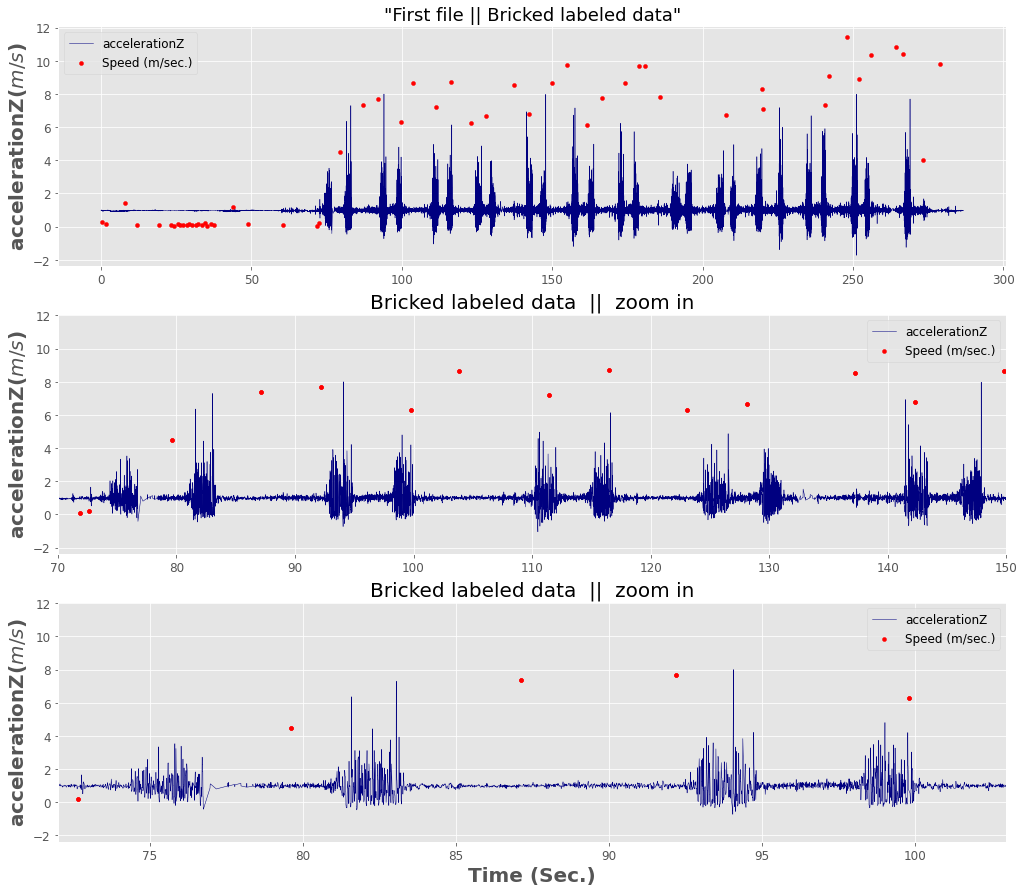

In [16]:
x = df.timeRelative_sec
xe = df.equal_sampled_numbers
y = df.accelerationZ

plt.rcParams['figure.figsize'] = (17, 15)

plt.subplot(3,1,1)
plt.plot(x,y,'navy', linewidth = 0.5);plt.title('"First file || Bricked labeled data"',fontsize=18)
speed =plt.scatter(x, df['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(x,y,'navy', linewidth = 0.5)
speed =plt.scatter(x, df['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
speed =plt.scatter(x, df['speed'], color = 'red',marker='.')
plt.title('Bricked labeled data  ||  zoom in',fontsize=20)
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
#plt.xlabel('Time (Sec.)',fontsize=20)
plt.xlim(70, 150)


plt.subplot(3,1,3)
plt.plot(x,y,'navy', linewidth = 0.5)
speed =plt.scatter(x, df['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
speed =plt.scatter(x, df['speed'], color = 'red',marker='.')
plt.title('Bricked labeled data  ||  zoom in',fontsize=20)
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
plt.xlabel('Time (Sec.)',fontsize=20)
plt.xlim(70, 150)
plt.xlim(72, 103)
plt.rcParams['figure.figsize'] = (17, 7)


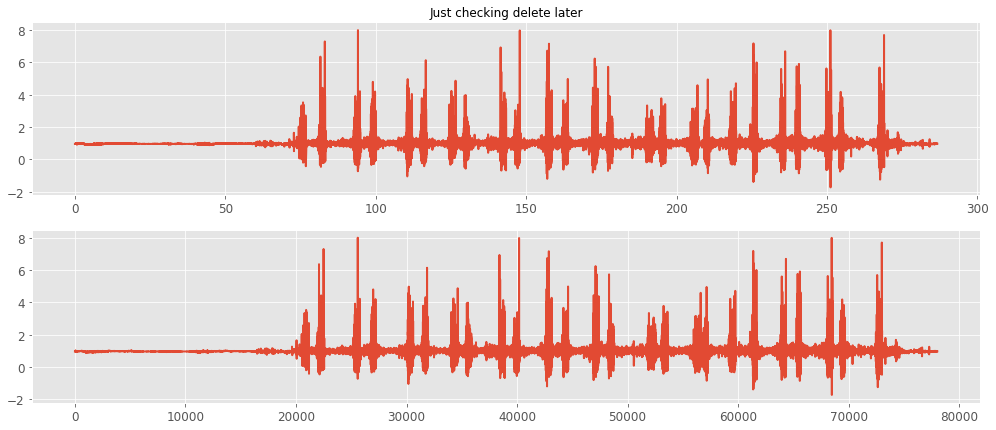

In [17]:
plt.subplot(2,1,1)
plt.title("Just checking delete later")
plt.plot(x,y)
plt.subplot(2,1,2)
plt.plot(xe,y)

Fourier analysis works well only for stationary data, use Polynomial Regression to find the best-fit polynomial function that fits the data. Then we will remove this line and obtain the stationary time-series ... (LEcture 4 Ts)

Text(0, 0.5, 'Price')

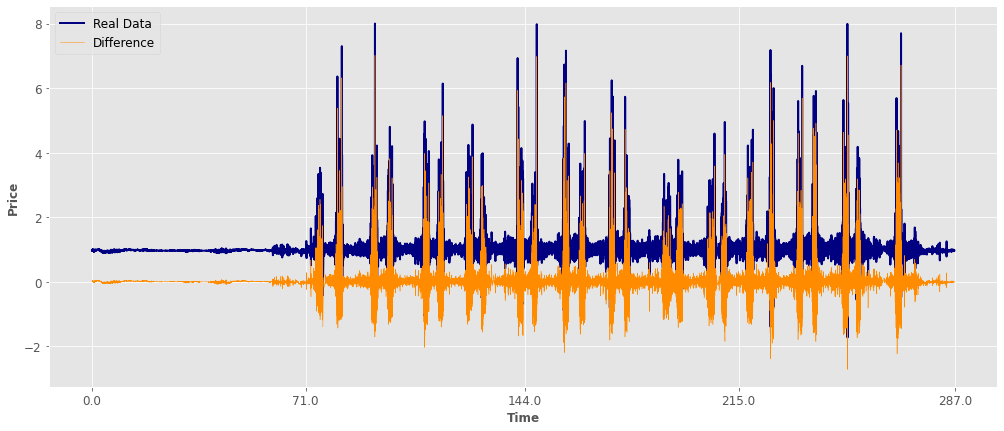

In [18]:
idx = np.linspace(0,len(x)-1,5).astype(int)
X = np.array(df.index).reshape(-1,1)
pf = PolynomialFeatures(3)
X = pf.fit_transform(X)
reg = LinearRegression().fit(X, y)
reg.score(X, y)
#plt.plot(x,reg.predict(X),label='Polynomial Regression',color='firebrick', linewidth = 5)
plt.plot(x,y,label='Real Data',color='navy')
plt.plot(x,y-reg.predict(X),label='Difference',color='darkorange', linewidth = 0.5)
plt.legend()
plt.xticks(x[idx].round(),x[idx].round())
plt.xlabel('Time')
plt.ylabel('Z')

Fourier transform and plot the amplitude:
Denoising Algorithm

Text(0, 0.5, 'Fourier Amplitude')

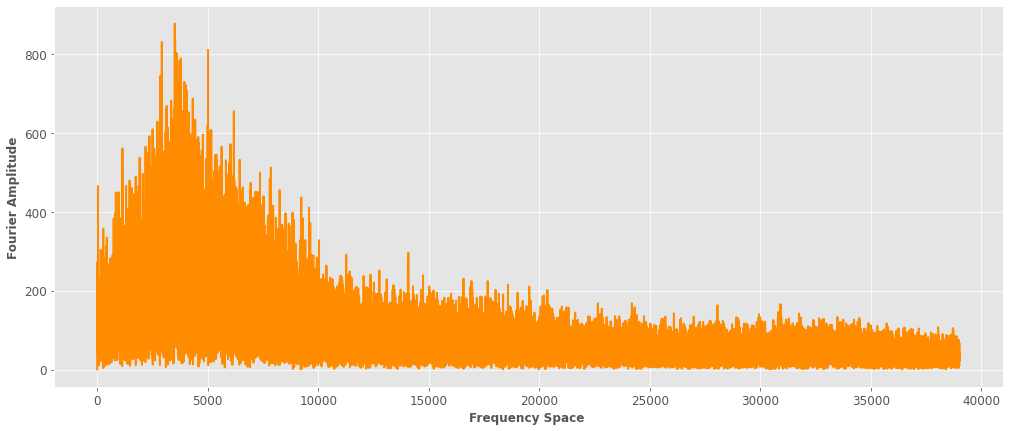

In [19]:
plt.rcParams['figure.figsize'] = (17, 7)
signal = reg.predict(X)-y
signal = signal-signal.mean()
fft_signal = np.abs(np.fft.fft(signal))
plt.plot(fft_signal[0:int(len(signal)/2)],color='darkorange')
plt.xlabel('Frequency Space ')
plt.ylabel('Fourier Amplitude')

In [20]:
new_Xph = fft_signal[0:int(len(signal)/2.)]

In [21]:
#functions from intro to BI lectures 8

def filter_signal(th):
    f_s = fft_filter(th)
    return np.real(np.fft.ifft(f_s))
def fft_filter(perc):
    fft_signal = np.fft.fft(signal)
    fft_abs = np.abs(fft_signal)
    th=perc*(2*fft_abs[0:int(len(signal)/2.)]/len(new_Xph)).max()
    fft_tof=fft_signal.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof
def fft_filter_amp(th):
    fft = np.fft.fft(signal)
    fft_tof=fft.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof_abs[fft_tof_abs<=th]=0
    return fft_tof_abs[0:int(len(fft_tof_abs)/2.)]

filter it. We are cutting out all the frequencies below a certain level. This level is set by using the maximum amplitude as a reference value.

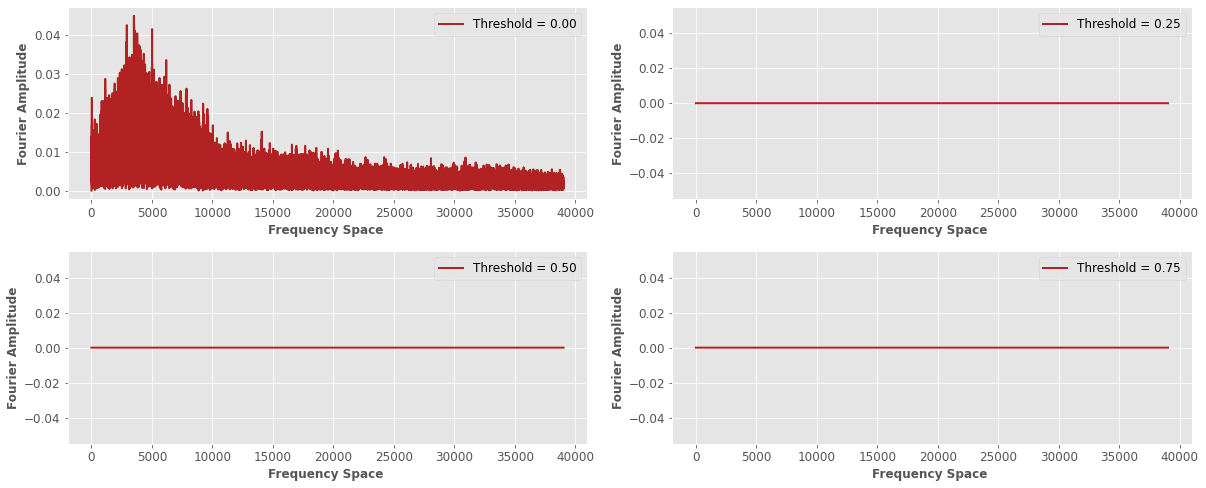

In [22]:
th_list = np.linspace(0,1,5)
th_list = th_list[0:len(th_list)-1]
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter_amp(th_i)
    plt.plot(th_filter[0:int(len(signal)/2.)],color='firebrick',label='Threshold = %.2f'%(th_list[i]))
    plt.xlabel('Frequency Space ')
    plt.ylabel('Fourier Amplitude')
    plt.legend()
plt.tight_layout()

inverse transform each filtered Fourier transforms

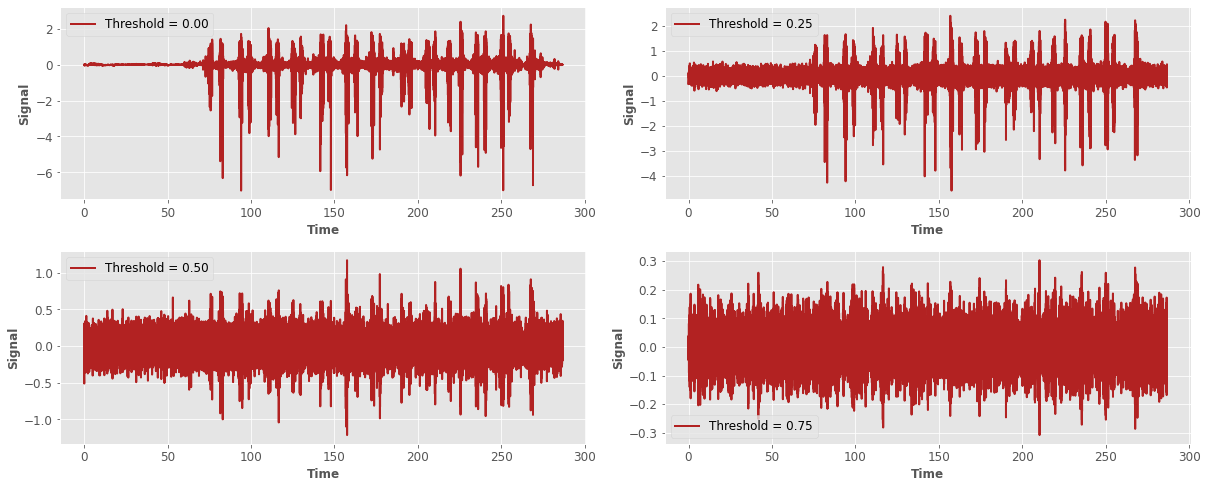

In [23]:
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter(th_i)
    signal_filter =np.real(np.fft.ifft(th_filter))
    plt.plot(x,signal_filter,color='firebrick',label='Threshold = %.2f'%(th_list[i]))
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend()
plt.tight_layout()

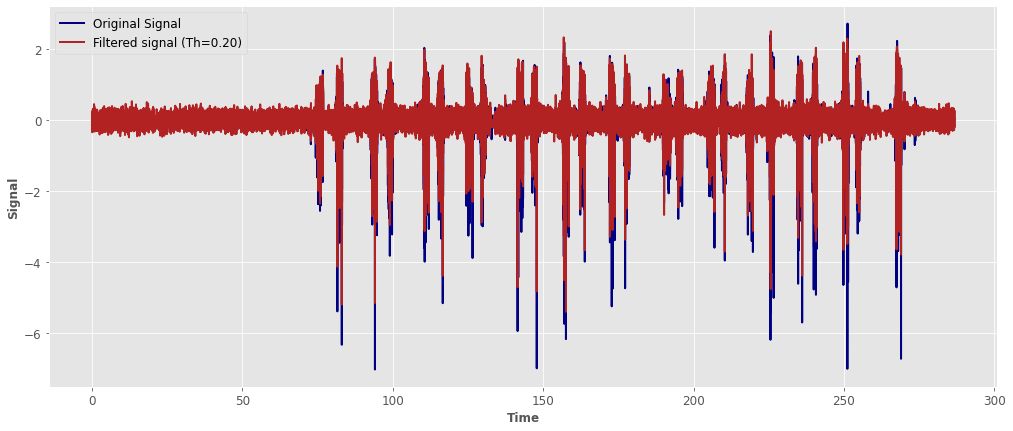

In [24]:
th_value = 0.2 #hit and trile , you may change and check this value
example_signal = filter_signal(th_value)
plt.plot(x,signal,color='navy',label='Original Signal')
plt.plot(x,example_signal,color='firebrick',label='Filtered signal (Th=%.2f)'%(th_value))
#plt.plot(x,signal-example_signal,color='darkorange',label='Difference')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()

signal should not correlate to the noise, ...................... correlation value and p-value) at different value of threshold

Text(0.5, 0, 'Threshold Value')

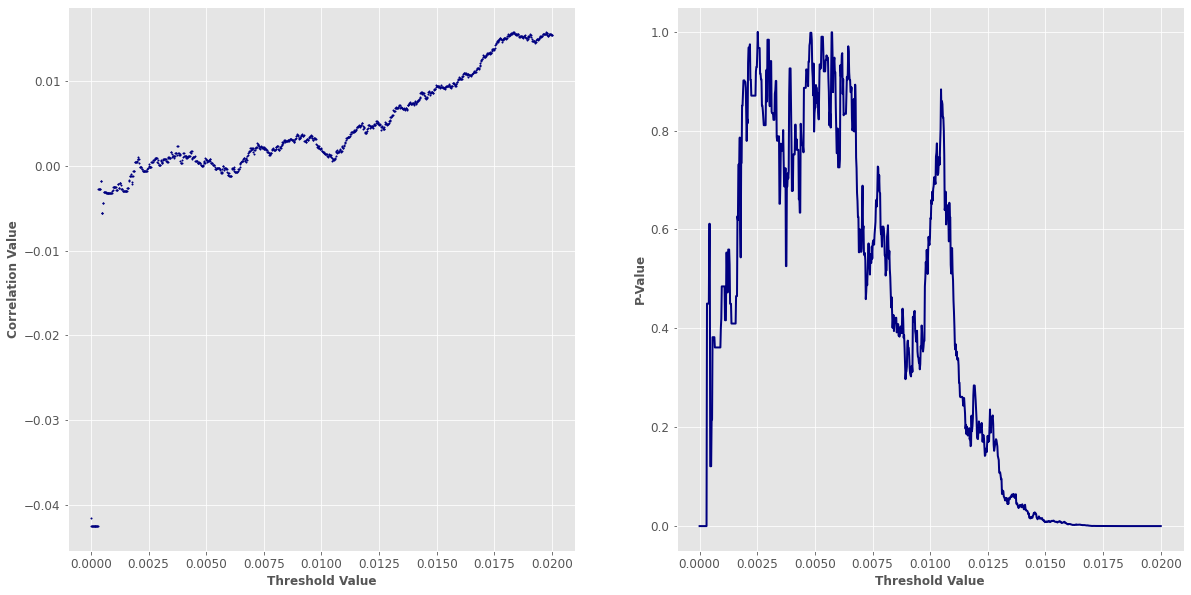

In [25]:
th_list = np.linspace(0,0.02,1000)
th_list = th_list[0:len(th_list)]
p_values = []
corr_values = []
for t in th_list:
    filt_signal = filter_signal(t)
    res = stats.spearmanr(signal,signal-filt_signal)
    p_values.append(res.pvalue)
    corr_values.append(res.correlation)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(th_list,corr_values,s=2,color='navy')
#plt.plot(th_list,p_values)
plt.ylabel('Correlation Value')
plt.xlabel('Threshold Value')
plt.subplot(1,2,2)
plt.plot(th_list,p_values,color='navy')
#plt.plot(th_list,p_values)
plt.ylabel('P-Value')
plt.xlabel('Threshold Value')

In [26]:
th_opt = th_list[np.array(corr_values).argmin()]
th_opt

2.002002002002002e-05

 FOURIER TRANSFORM ON MANHOLE DATA. 

In [27]:
df2 = Manhole.copy()

In [28]:
df2.head()

timeRelativeRef  samplingTime  epoch  latitude  longitude  altitude  speed  \
0          2077988       2077988    NaN       NaN        NaN       NaN    NaN   
1          2078064            77    NaN       NaN        NaN       NaN    NaN   
2          2078080            15    NaN       NaN        NaN       NaN    NaN   
3          2078085             5    NaN       NaN        NaN       NaN    NaN   
4          2078087             3    NaN       NaN        NaN       NaN    NaN   

   satellites  accelerationX  accelerationY  ...  humidity  \
0         NaN          -0.23          -0.02  ...       NaN   
1         NaN          -0.20          -0.01  ...       NaN   
2         NaN          -0.24          -0.01  ...       NaN   
3         NaN          -0.24          -0.01  ...       NaN   
4         NaN          -0.24          -0.01  ...       NaN   

   barometricPressure  light  PM1.0_CF1  PM2.5_CF1  PM10.0_CF1  PM1.0_Auto  \
0                 NaN    NaN        NaN        NaN         NaN         NaN   
1                 NaN    NaN        NaN        NaN         NaN         NaN   
2                 NaN    NaN        NaN        NaN         NaN         NaN   
3                 NaN    NaN        NaN        NaN         NaN         NaN   
4                 NaN    NaN        NaN        NaN         NaN         NaN   

   PM2.5_Auto  PM10.0_Auto    label  
0         NaN          NaN  manhole  
1         NaN          NaN  manhole  
2         NaN          NaN  manhole  
3         NaN          NaN  manhole  
4         NaN          NaN  manhole  

[5 rows x 25 columns]

In [30]:
df2['timeRelative_sec'] = df2['timeRelativeRef']/1000  # convert ms to sec. to understand easily
df2['timeRelative_sec'] = df2['timeRelative_sec']-min(df2['timeRelative_sec']) # start time form zero to make more sence 

df2['equal_sampled_numbers'] = df2.index # i think we don’t have equally sampled time space, lets create one starting 

(70.0, 150.0)

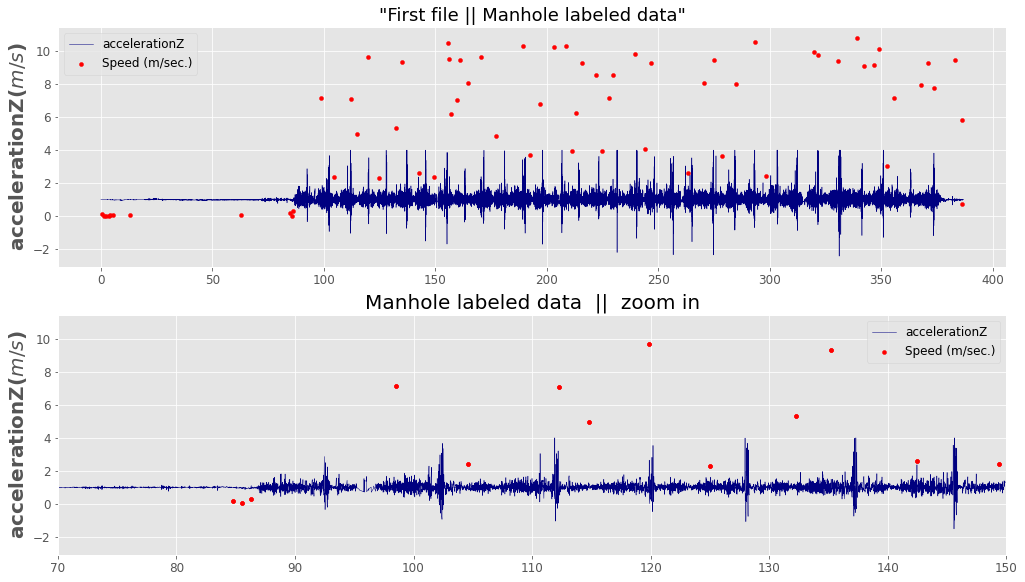

In [31]:
x = df2.timeRelative_sec
xe = df2.equal_sampled_numbers
y = df2.accelerationZ

plt.rcParams['figure.figsize'] = (17, 15)

plt.subplot(3,1,1)
plt.plot(x,y,'navy', linewidth = 0.5);plt.title('"First file || Manhole labeled data"',fontsize=18)
speed =plt.scatter(x, df2['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(x,y,'navy', linewidth = 0.5)
speed =plt.scatter(x, df2['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
speed =plt.scatter(x, df2['speed'], color = 'red',marker='.')
plt.title('Manhole labeled data  ||  zoom in',fontsize=20)
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
#plt.xlabel('Time (Sec.)',fontsize=20)
plt.xlim(70, 150)



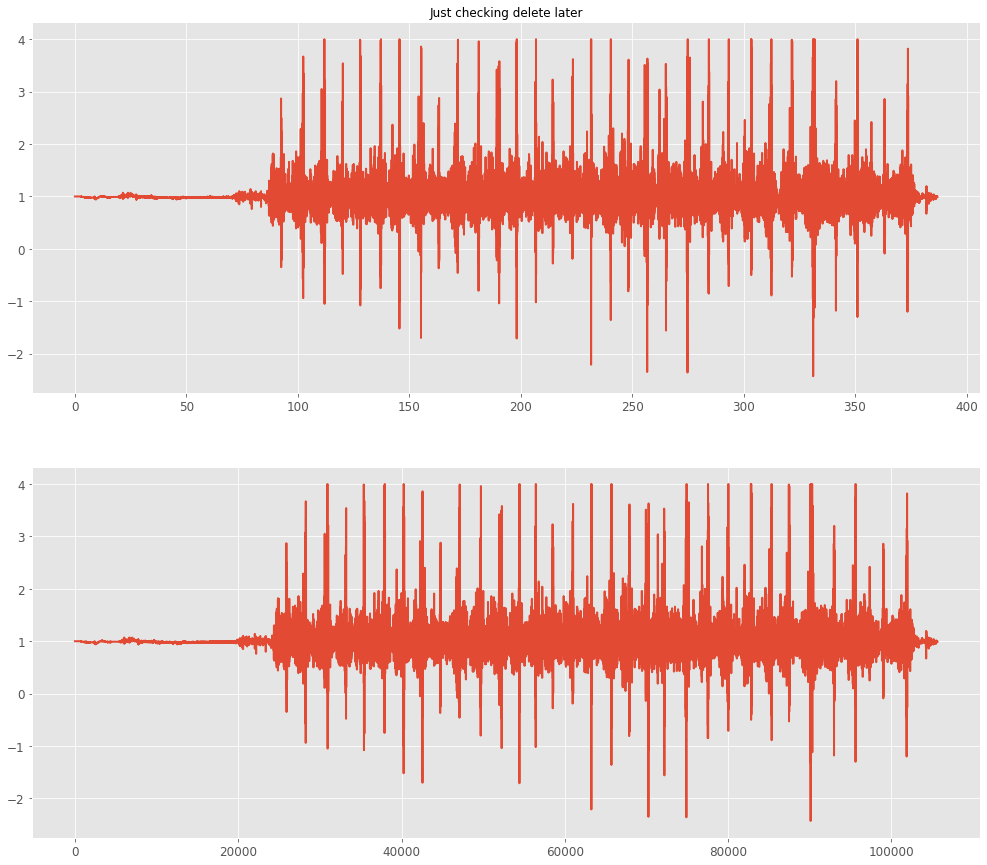

In [32]:
plt.subplot(2,1,1)
plt.title("Just checking delete later")
plt.plot(x,y)
plt.subplot(2,1,2)
plt.plot(xe,y)

Fourier analysis works well only for stationary data, use Polynomial Regression to find the best-fit polynomial function that fits the data. Then we will remove this line and obtain the stationary time-series ... (LEcture 4 Ts)

Text(0, 0.5, 'Price')

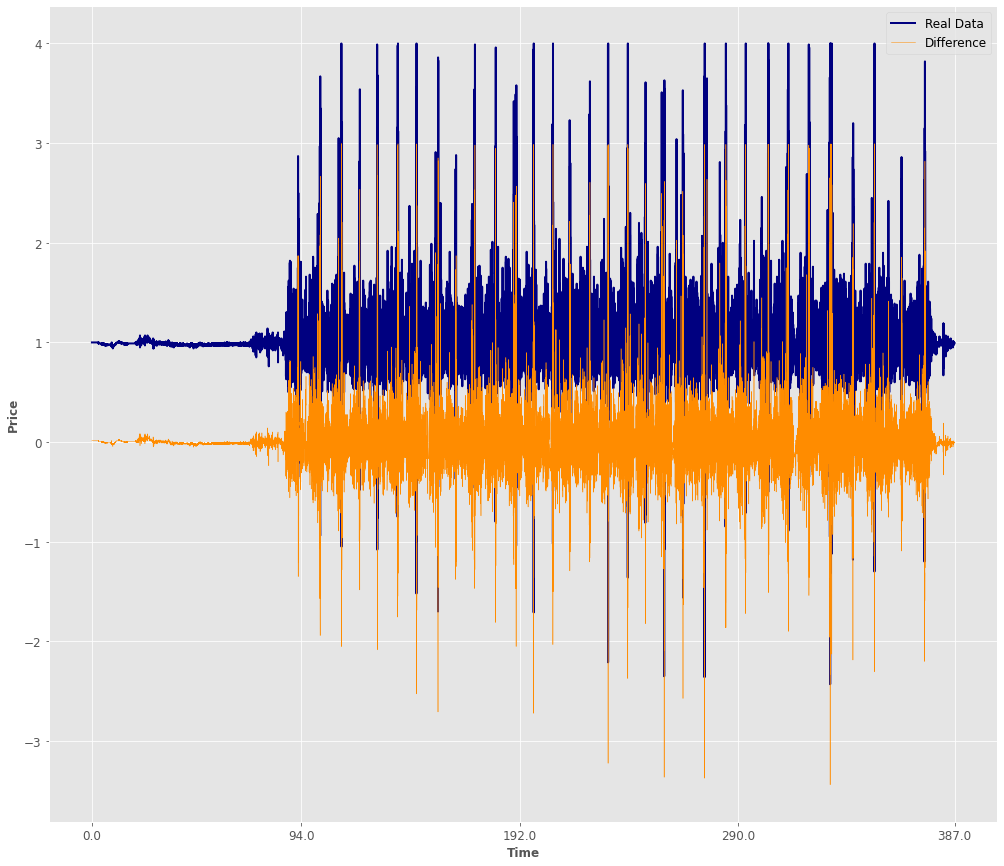

In [33]:
idx = np.linspace(0,len(x)-1,5).astype(int)
X = np.array(df2.index).reshape(-1,1)
pf = PolynomialFeatures(3)
X = pf.fit_transform(X)
reg = LinearRegression().fit(X, y)
reg.score(X, y)
#plt.plot(x,reg.predict(X),label='Polynomial Regression',color='firebrick', linewidth = 5)
plt.plot(x,y,label='Real Data',color='navy')
plt.plot(x,y-reg.predict(X),label='Difference',color='darkorange', linewidth = 0.5)
plt.legend()
plt.xticks(x[idx].round(),x[idx].round())
plt.xlabel('Time')
plt.ylabel('Price')

Fourier transform and plot the amplitude:
Denoising Algorithm

Text(0, 0.5, 'Fourier Amplitude')

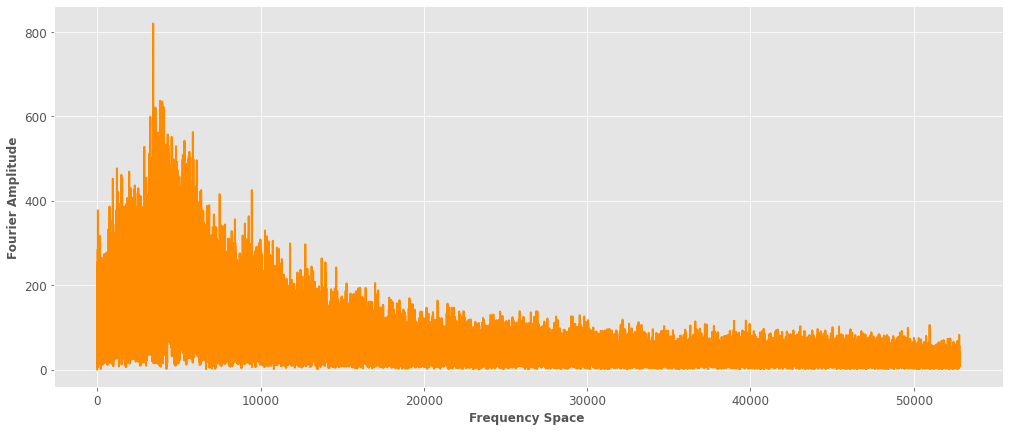

In [34]:
plt.rcParams['figure.figsize'] = (17, 7)
signal = reg.predict(X)-y
signal = signal-signal.mean()
fft_signal = np.abs(np.fft.fft(signal))
plt.plot(fft_signal[0:int(len(signal)/2)],color='darkorange')
plt.xlabel('Frequency Space ')
plt.ylabel('Fourier Amplitude')

In [35]:
new_Xph = fft_signal[0:int(len(signal)/2.)]

In [38]:
#functions from intro to BI lectures 8

def filter_signal(th):
    f_s = fft_filter(th)
    return np.real(np.fft.ifft(f_s))
def fft_filter(perc):
    fft_signal = np.fft.fft(signal)
    fft_abs = np.abs(fft_signal)
    th=perc*(2*fft_abs[0:int(len(signal)/2.)]/len(new_Xph)).max()
    fft_tof=fft_signal.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof
def fft_filter_amp(th):
    fft = np.fft.fft(signal)
    fft_tof=fft.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof_abs[fft_tof_abs<=th]=0
    return fft_tof_abs[0:int(len(fft_tof_abs)/2.)]

filter it. We are cutting out all the frequencies below a certain level. This level is set by using the maximum amplitude as a reference value.

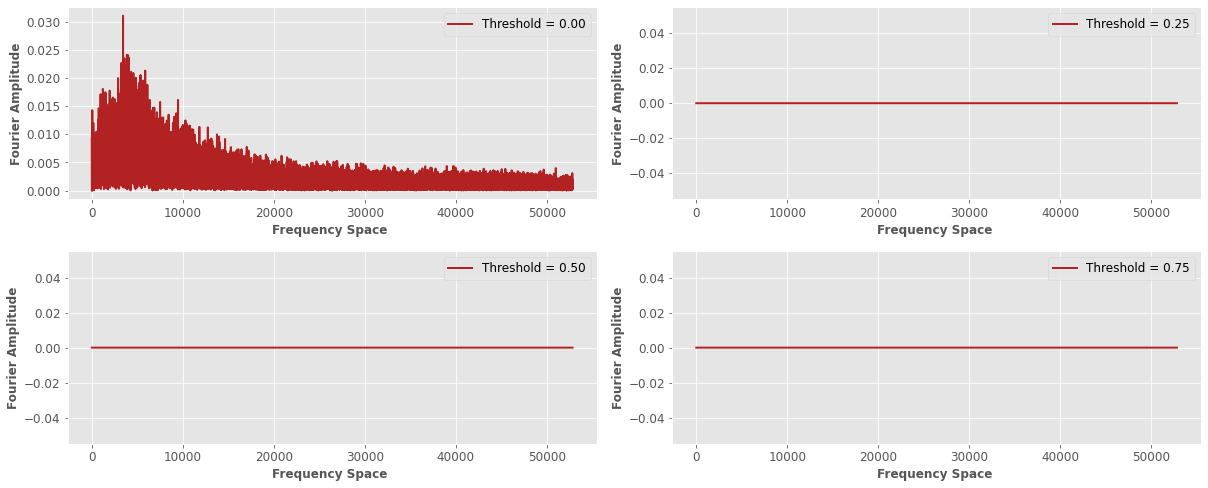

In [39]:
th_list = np.linspace(0,1,5)
th_list = th_list[0:len(th_list)-1]
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter_amp(th_i)
    plt.plot(th_filter[0:int(len(signal)/2.)],color='firebrick',label='Threshold = %.2f'%(th_list[i]))
    plt.xlabel('Frequency Space ')
    plt.ylabel('Fourier Amplitude')
    plt.legend()
plt.tight_layout()

inverse transform each filtered Fourier transforms

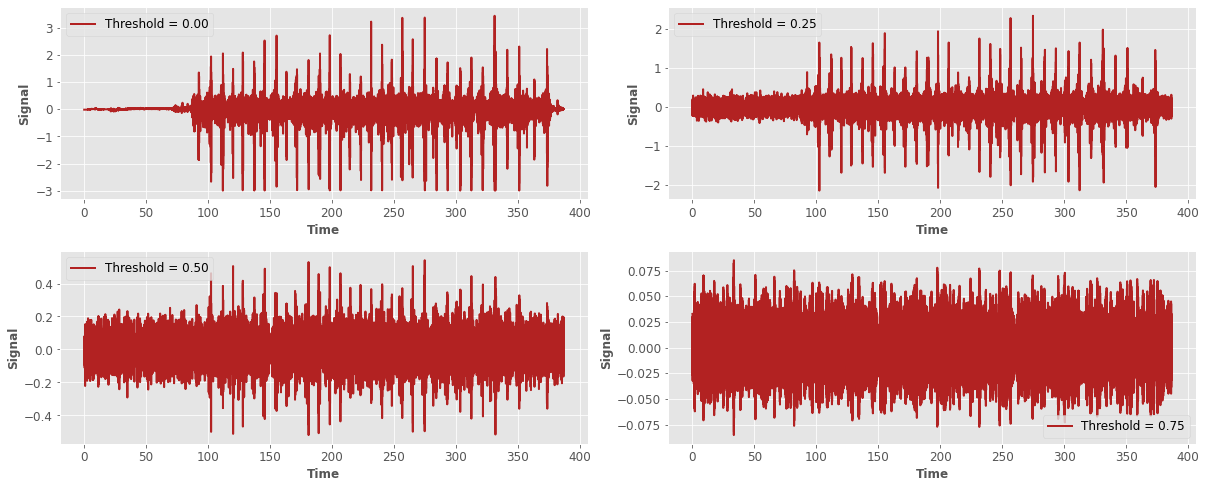

In [40]:
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter(th_i)
    signal_filter =np.real(np.fft.ifft(th_filter))
    plt.plot(x,signal_filter,color='firebrick',label='Threshold = %.2f'%(th_list[i]))
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend()
plt.tight_layout()

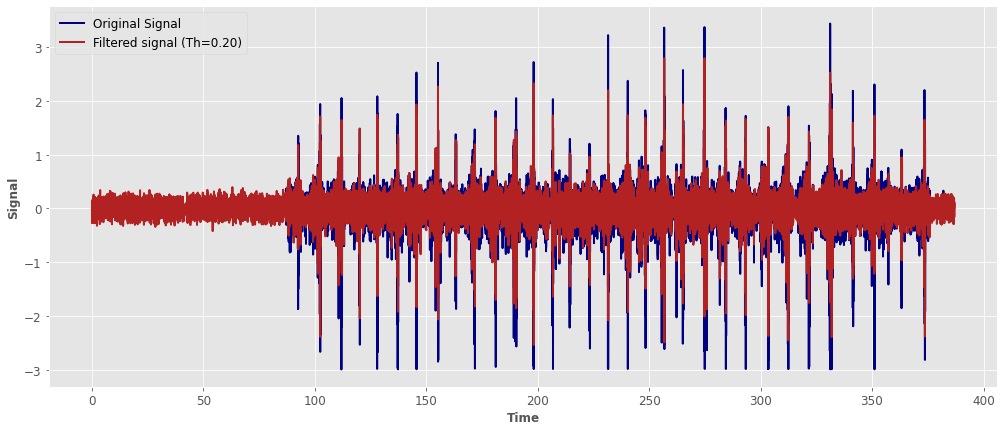

In [41]:
th_value = 0.2 #hit and trile , you may change and check this value
example_signal = filter_signal(th_value)
plt.plot(x,signal,color='navy',label='Original Signal')
plt.plot(x,example_signal,color='firebrick',label='Filtered signal (Th=%.2f)'%(th_value))
#plt.plot(x,signal-example_signal,color='darkorange',label='Difference')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()

signal should not correlate to the noise, ...................... correlation value and p-value) at different value of threshold

Text(0.5, 0, 'Threshold Value')

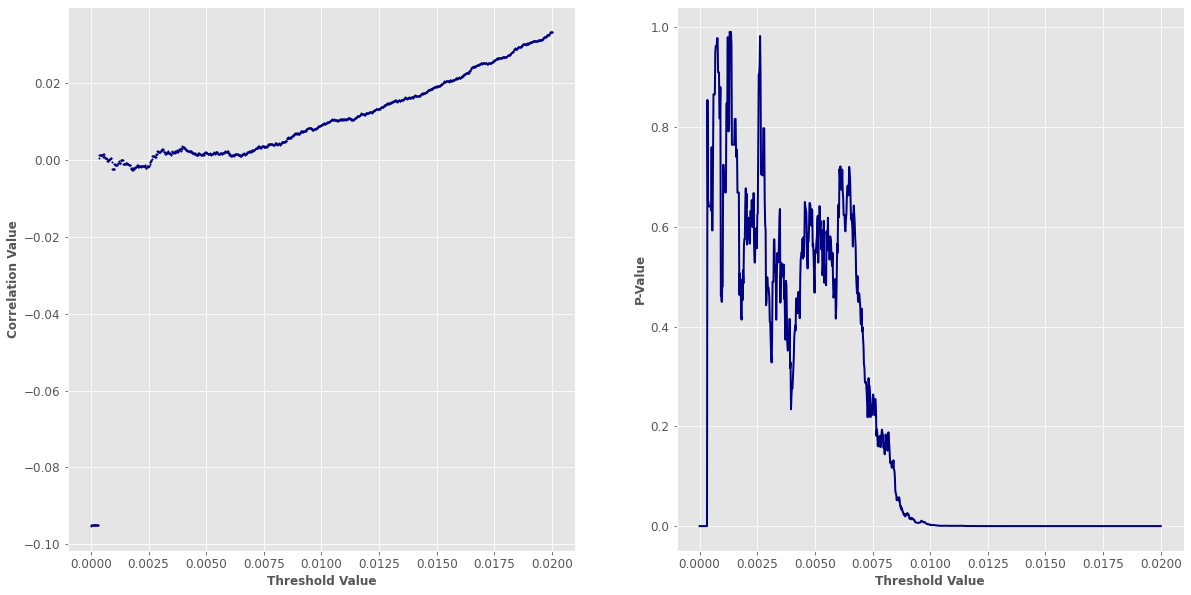

In [42]:
th_list = np.linspace(0,0.02,1000)
th_list = th_list[0:len(th_list)]
p_values = []
corr_values = []
for t in th_list:
    filt_signal = filter_signal(t)
    res = stats.spearmanr(signal,signal-filt_signal)
    p_values.append(res.pvalue)
    corr_values.append(res.correlation)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(th_list,corr_values,s=2,color='navy')
#plt.plot(th_list,p_values)
plt.ylabel('Correlation Value')
plt.xlabel('Threshold Value')
plt.subplot(1,2,2)
plt.plot(th_list,p_values,color='navy')
#plt.plot(th_list,p_values)
plt.ylabel('P-Value')
plt.xlabel('Threshold Value')

In [43]:
th_opt = th_list[np.array(corr_values).argmin()]
th_opt

0.0

FOURIER TRANSFORM ON POTHOLE1 DATA. 

In [44]:
df3 = Pothole1.copy()

In [45]:
df3.head()

timeRelativeRef  samplingTime  epoch  latitude  longitude  altitude  speed  \
0           172781        172781    NaN       NaN        NaN       NaN    NaN   
1           172869            88    NaN       NaN        NaN       NaN    NaN   
2           172884            15    NaN       NaN        NaN       NaN    NaN   
3           172889             5    NaN       NaN        NaN       NaN    NaN   
4           172891             2    NaN       NaN        NaN       NaN    NaN   

   satellites  accelerationX  accelerationY  ...  humidity  \
0         NaN          -0.25           0.03  ...       NaN   
1         NaN          -0.25           0.04  ...       NaN   
2         NaN          -0.26           0.03  ...       NaN   
3         NaN          -0.26           0.03  ...       NaN   
4         NaN          -0.26           0.04  ...       NaN   

   barometricPressure  light  PM1.0_CF1  PM2.5_CF1  PM10.0_CF1  PM1.0_Auto  \
0                 NaN    NaN        NaN        NaN         NaN         NaN   
1                 NaN    NaN        NaN        NaN         NaN         NaN   
2                 NaN    NaN        NaN        NaN         NaN         NaN   
3                 NaN    NaN        NaN        NaN         NaN         NaN   
4                 NaN    NaN        NaN        NaN         NaN         NaN   

   PM2.5_Auto  PM10.0_Auto    label  
0         NaN          NaN  pothole  
1         NaN          NaN  pothole  
2         NaN          NaN  pothole  
3         NaN          NaN  pothole  
4         NaN          NaN  pothole  

[5 rows x 25 columns]

In [46]:
df3['timeRelative_sec'] = df3['timeRelativeRef']/1000  # convert ms to sec. to understand easily
df3['timeRelative_sec'] = df3['timeRelative_sec']-min(df3['timeRelative_sec']) # start time form zero to make more sence 

df3['equal_sampled_numbers'] = df3.index # i think we don’t have equally sampled time space, lets create one starting from zero

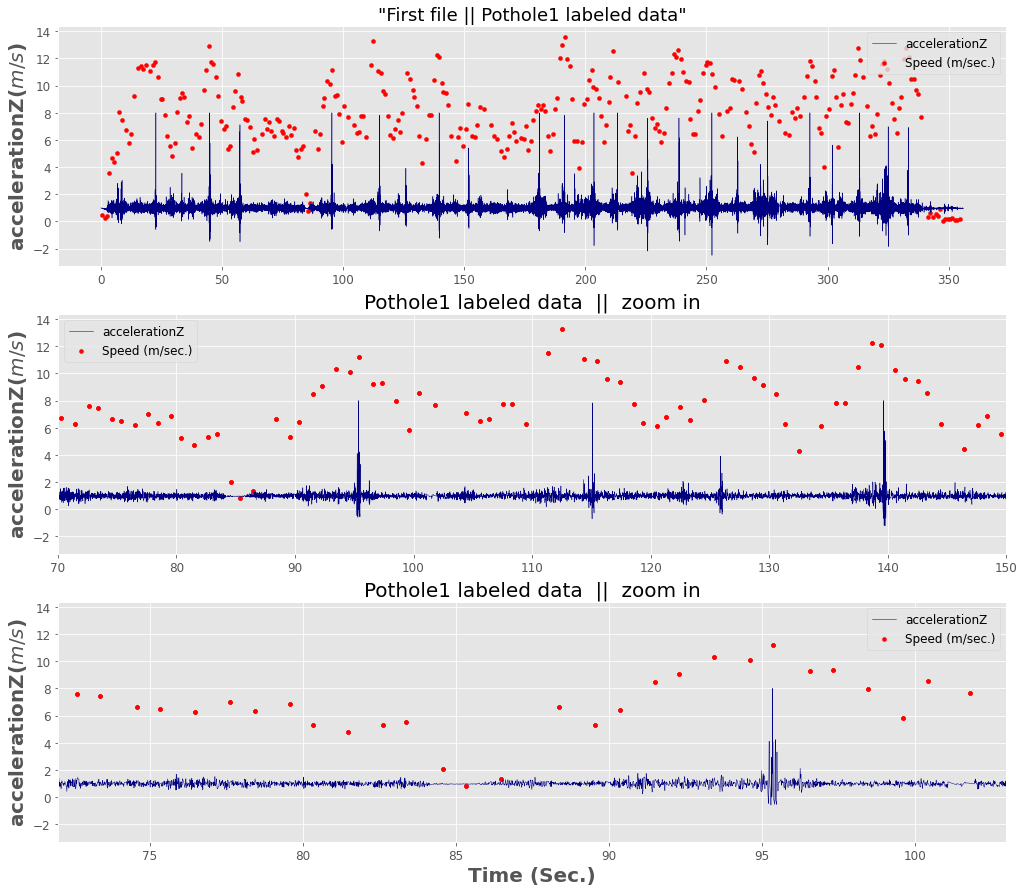

In [47]:
x = df3.timeRelative_sec
xe = df3.equal_sampled_numbers
y = df3.accelerationZ

plt.rcParams['figure.figsize'] = (17, 15)

plt.subplot(3,1,1)
plt.plot(x,y,'navy', linewidth = 0.5);plt.title('"First file || Pothole1 labeled data"',fontsize=18)
speed =plt.scatter(x, df3['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(x,y,'navy', linewidth = 0.5)
speed =plt.scatter(x, df3['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
speed =plt.scatter(x, df3['speed'], color = 'red',marker='.')
plt.title('Pothole1 labeled data  ||  zoom in',fontsize=20)
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
#plt.xlabel('Time (Sec.)',fontsize=20)
plt.xlim(70, 150)


plt.subplot(3,1,3)
plt.plot(x,y,'navy', linewidth = 0.5)
speed =plt.scatter(x, df3['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
speed =plt.scatter(x, df3['speed'], color = 'red',marker='.')
plt.title('Pothole1 labeled data  ||  zoom in',fontsize=20)
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
plt.xlabel('Time (Sec.)',fontsize=20)
plt.xlim(70, 150)
plt.xlim(72, 103)
plt.rcParams['figure.figsize'] = (17, 7)


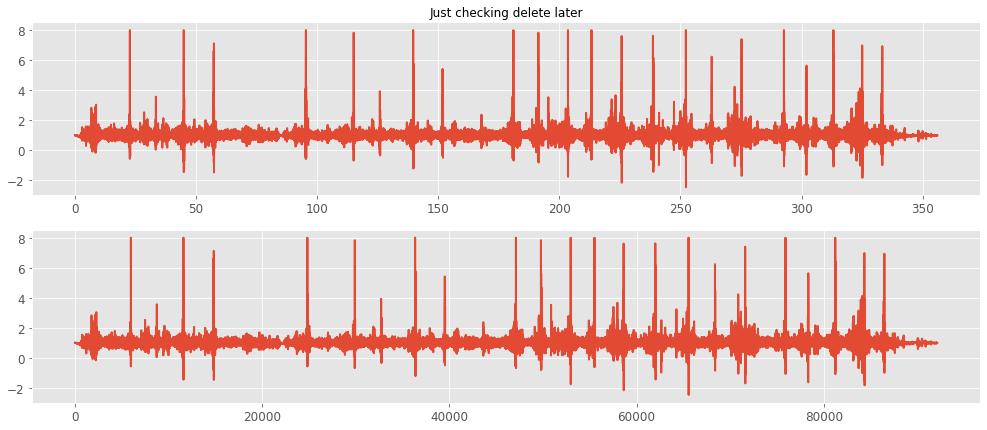

In [48]:
plt.subplot(2,1,1)
plt.title("Just checking delete later")
plt.plot(x,y)
plt.subplot(2,1,2)
plt.plot(xe,y)

Fourier analysis works well only for stationary data, use Polynomial Regression to find the best-fit polynomial function that fits the data. Then we will remove this line and obtain the stationary time-series ... (LEcture 4 Ts)

Text(0, 0.5, 'Price')

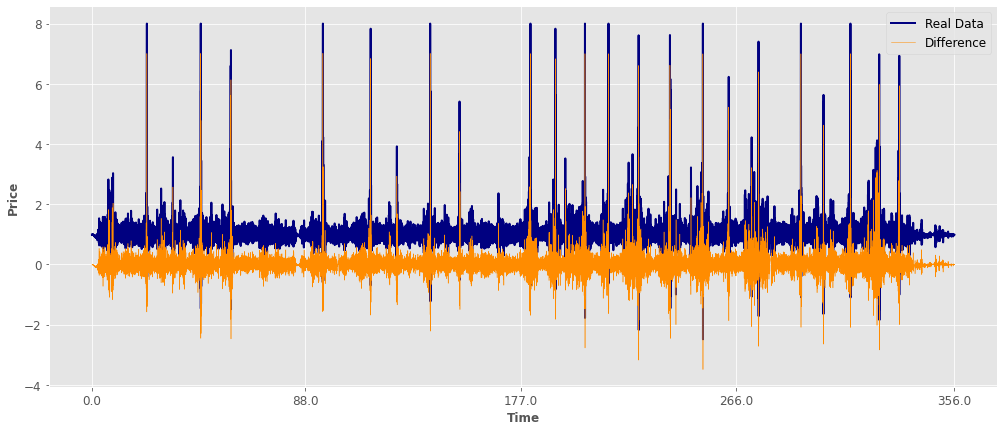

In [49]:
idx = np.linspace(0,len(x)-1,5).astype(int)
X = np.array(df3.index).reshape(-1,1)
pf = PolynomialFeatures(3)
X = pf.fit_transform(X)
reg = LinearRegression().fit(X, y)
reg.score(X, y)
#plt.plot(x,reg.predict(X),label='Polynomial Regression',color='firebrick', linewidth = 5)
plt.plot(x,y,label='Real Data',color='navy')
plt.plot(x,y-reg.predict(X),label='Difference',color='darkorange', linewidth = 0.5)
plt.legend()
plt.xticks(x[idx].round(),x[idx].round())
plt.xlabel('Time')
plt.ylabel('Price')

Fourier transform and plot the amplitude:
Denoising Algorithm

Text(0, 0.5, 'Fourier Amplitude')

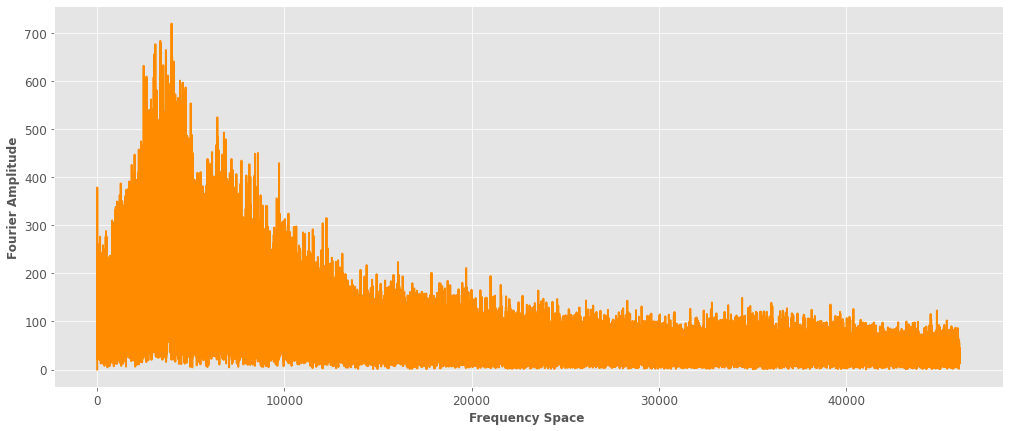

In [50]:
plt.rcParams['figure.figsize'] = (17, 7)
signal = reg.predict(X)-y
signal = signal-signal.mean()
fft_signal = np.abs(np.fft.fft(signal))
plt.plot(fft_signal[0:int(len(signal)/2)],color='darkorange')
plt.xlabel('Frequency Space ')
plt.ylabel('Fourier Amplitude')

In [51]:
new_Xph = fft_signal[0:int(len(signal)/2.)]

In [52]:
#functions from intro to BI lectures 8

def filter_signal(th):
    f_s = fft_filter(th)
    return np.real(np.fft.ifft(f_s))
def fft_filter(perc):
    fft_signal = np.fft.fft(signal)
    fft_abs = np.abs(fft_signal)
    th=perc*(2*fft_abs[0:int(len(signal)/2.)]/len(new_Xph)).max()
    fft_tof=fft_signal.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof
def fft_filter_amp(th):
    fft = np.fft.fft(signal)
    fft_tof=fft.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof_abs[fft_tof_abs<=th]=0
    return fft_tof_abs[0:int(len(fft_tof_abs)/2.)]

filter it. We are cutting out all the frequencies below a certain level. This level is set by using the maximum amplitude as a reference value.

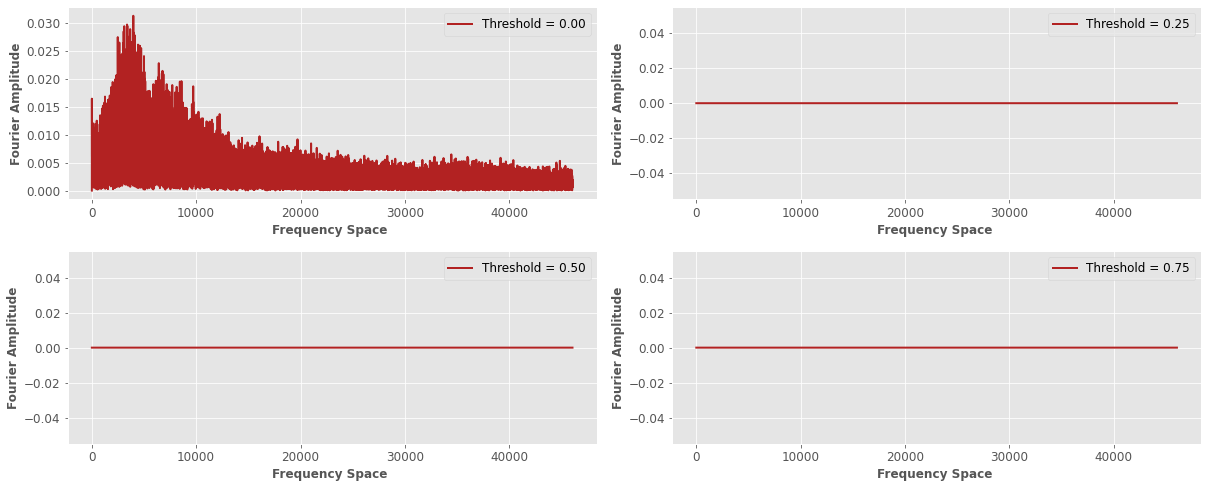

In [53]:
th_list = np.linspace(0,1,5)
th_list = th_list[0:len(th_list)-1]
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter_amp(th_i)
    plt.plot(th_filter[0:int(len(signal)/2.)],color='firebrick',label='Threshold = %.2f'%(th_list[i]))
    plt.xlabel('Frequency Space ')
    plt.ylabel('Fourier Amplitude')
    plt.legend()
plt.tight_layout()

inverse transform each filtered Fourier transforms

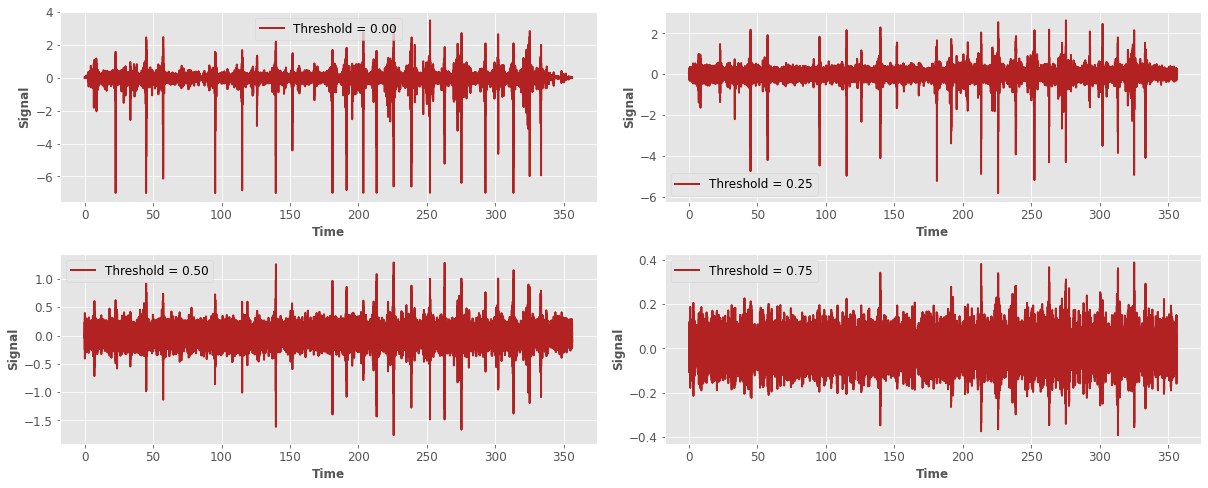

In [54]:
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter(th_i)
    signal_filter =np.real(np.fft.ifft(th_filter))
    plt.plot(x,signal_filter,color='firebrick',label='Threshold = %.2f'%(th_list[i]))
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend()
plt.tight_layout()

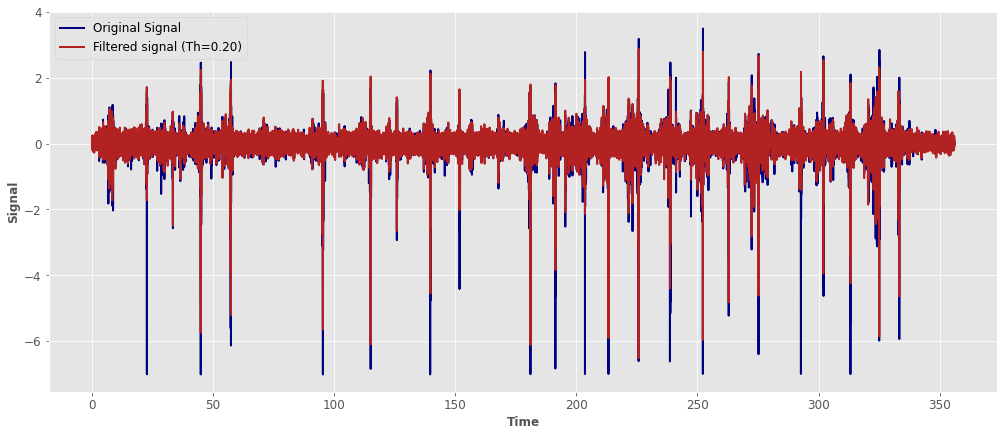

In [55]:
th_value = 0.2 #hit and trile , you may change and check this value
example_signal = filter_signal(th_value)
plt.plot(x,signal,color='navy',label='Original Signal')
plt.plot(x,example_signal,color='firebrick',label='Filtered signal (Th=%.2f)'%(th_value))
#plt.plot(x,signal-example_signal,color='darkorange',label='Difference')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()

Text(0.5, 0, 'Threshold Value')

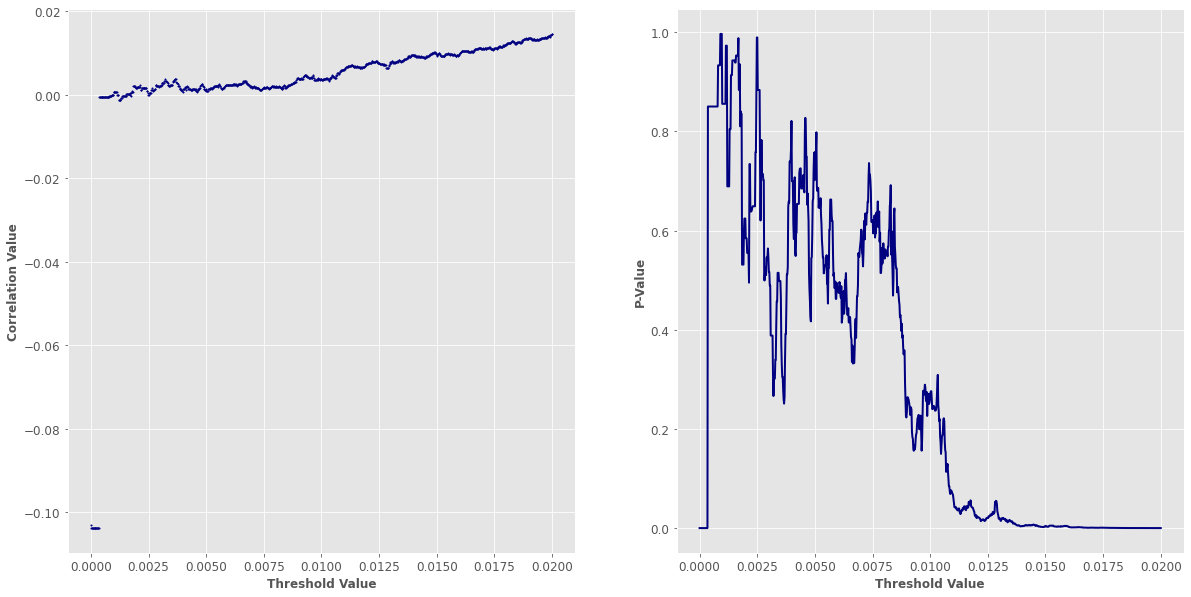

In [56]:
th_list = np.linspace(0,0.02,1000)
th_list = th_list[0:len(th_list)]
p_values = []
corr_values = []
for t in th_list:
    filt_signal = filter_signal(t)
    res = stats.spearmanr(signal,signal-filt_signal)
    p_values.append(res.pvalue)
    corr_values.append(res.correlation)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(th_list,corr_values,s=2,color='navy')
#plt.plot(th_list,p_values)
plt.ylabel('Correlation Value')
plt.xlabel('Threshold Value')
plt.subplot(1,2,2)
plt.plot(th_list,p_values,color='navy')
#plt.plot(th_list,p_values)
plt.ylabel('P-Value')
plt.xlabel('Threshold Value')

In [57]:
th_opt = th_list[np.array(corr_values).argmin()]
th_opt

2.002002002002002e-05

FOURIER TRANSFORM ON POTHOLE3 DATA. 

In [58]:
df4 = Pothole3.copy()

In [59]:
df4.head()

timeRelativeRef  samplingTime  epoch  latitude  longitude  altitude  speed  \
0          1117824       1117824    NaN       NaN        NaN       NaN    NaN   
1          1117893            68    NaN       NaN        NaN       NaN    NaN   
2          1117909            16    NaN       NaN        NaN       NaN    NaN   
3          1117914             5    NaN       NaN        NaN       NaN    NaN   
4          1117916             2    NaN       NaN        NaN       NaN    NaN   

   satellites  accelerationX  accelerationY  ...  humidity  \
0         NaN          -0.23          -0.03  ...       NaN   
1         NaN          -0.21          -0.03  ...       NaN   
2         NaN          -0.20          -0.03  ...       NaN   
3         NaN          -0.20          -0.03  ...       NaN   
4         NaN          -0.20          -0.03  ...       NaN   

   barometricPressure  light  PM1.0_CF1  PM2.5_CF1  PM10.0_CF1  PM1.0_Auto  \
0                 NaN    NaN        NaN        NaN         NaN         NaN   
1                 NaN    NaN        NaN        NaN         NaN         NaN   
2                 NaN    NaN        NaN        NaN         NaN         NaN   
3                 NaN    NaN        NaN        NaN         NaN         NaN   
4                 NaN    NaN        NaN        NaN         NaN         NaN   

   PM2.5_Auto  PM10.0_Auto    label  
0         NaN          NaN  pothole  
1         NaN          NaN  pothole  
2         NaN          NaN  pothole  
3         NaN          NaN  pothole  
4         NaN          NaN  pothole  

[5 rows x 25 columns]

In [60]:
df4['timeRelative_sec'] = df4['timeRelativeRef']/1000  # convert ms to sec. to understand easily
df4['timeRelative_sec'] = df4['timeRelative_sec']-min(df4['timeRelative_sec']) # start time form zero to make more sence 

df4['equal_sampled_numbers'] = df4.index # i think we don’t have equally sampled time space, lets create one starting

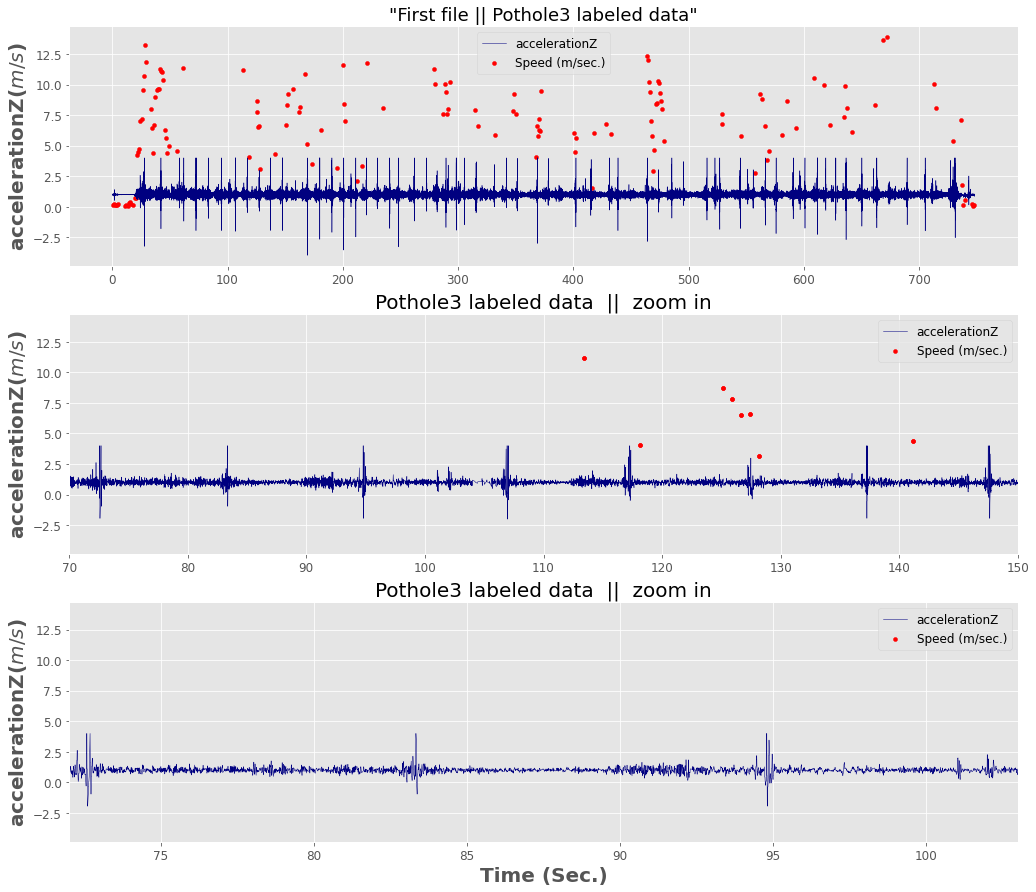

In [61]:
x = df4.timeRelative_sec
xe = df4.equal_sampled_numbers
y = df4.accelerationZ

plt.rcParams['figure.figsize'] = (17, 15)

plt.subplot(3,1,1)
plt.plot(x,y,'navy', linewidth = 0.5);plt.title('"First file || Pothole3 labeled data"',fontsize=18)
speed =plt.scatter(x, df4['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(x,y,'navy', linewidth = 0.5)
speed =plt.scatter(x, df4['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
speed =plt.scatter(x, df4['speed'], color = 'red',marker='.')
plt.title('Pothole3 labeled data  ||  zoom in',fontsize=20)
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
#plt.xlabel('Time (Sec.)',fontsize=20)
plt.xlim(70, 150)


plt.subplot(3,1,3)
plt.plot(x,y,'navy', linewidth = 0.5)
speed =plt.scatter(x, df4['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
speed =plt.scatter(x, df4['speed'], color = 'red',marker='.')
plt.title('Pothole3 labeled data  ||  zoom in',fontsize=20)
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
plt.xlabel('Time (Sec.)',fontsize=20)
plt.xlim(70, 150)
plt.xlim(72, 103)
plt.rcParams['figure.figsize'] = (17, 7)

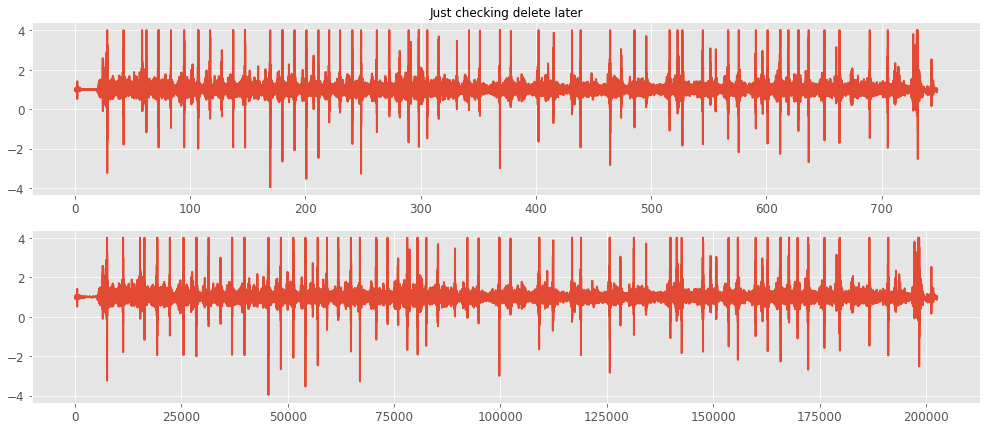

In [62]:
plt.subplot(2,1,1)
plt.title("Just checking delete later")
plt.plot(x,y)
plt.subplot(2,1,2)
plt.plot(xe,y)

Fourier analysis works well only for stationary data, use Polynomial Regression to find the best-fit polynomial function that fits the data. Then we will remove this line and obtain the stationary time-series ... (LEcture 4 Ts)

Text(0, 0.5, 'Price')

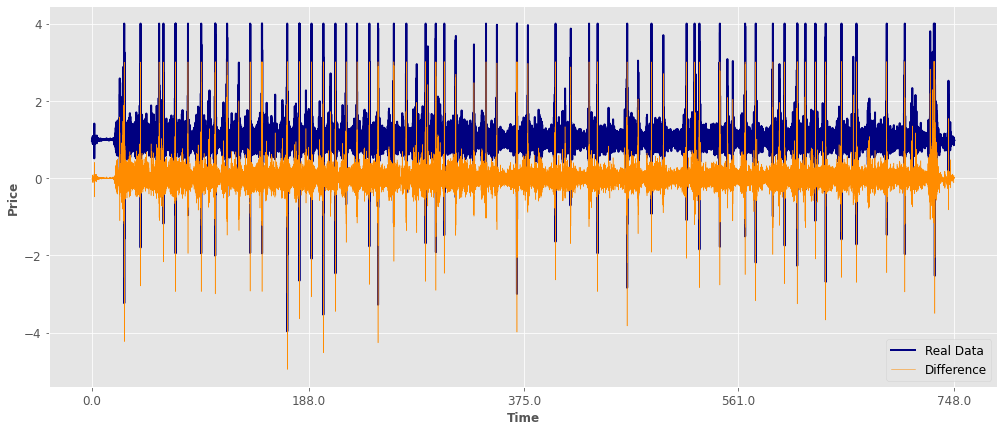

In [63]:
idx = np.linspace(0,len(x)-1,5).astype(int)
X = np.array(df4.index).reshape(-1,1)
pf = PolynomialFeatures(3)
X = pf.fit_transform(X)
reg = LinearRegression().fit(X, y)
reg.score(X, y)
#plt.plot(x,reg.predict(X),label='Polynomial Regression',color='firebrick', linewidth = 5)
plt.plot(x,y,label='Real Data',color='navy')
plt.plot(x,y-reg.predict(X),label='Difference',color='darkorange', linewidth = 0.5)
plt.legend()
plt.xticks(x[idx].round(),x[idx].round())
plt.xlabel('Time')
plt.ylabel('Price')

Fourier transform and plot the amplitude:
Denoising Algorithm

Text(0, 0.5, 'Fourier Amplitude')

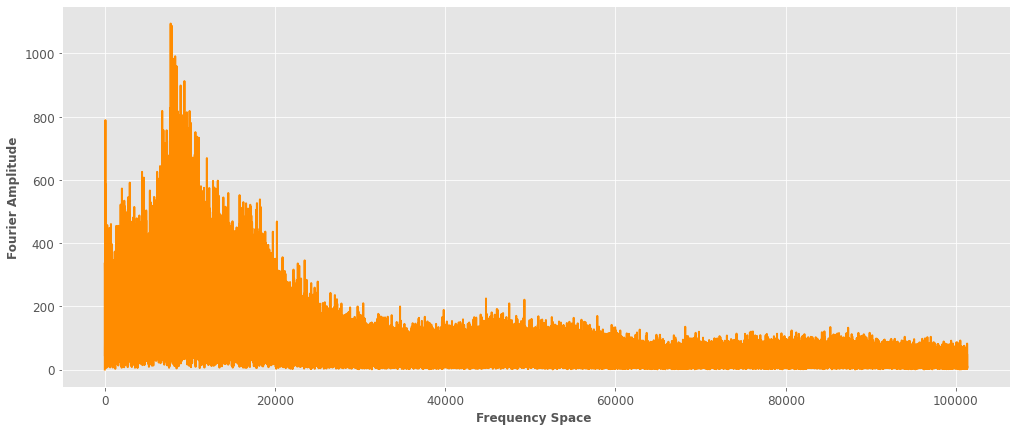

In [64]:
plt.rcParams['figure.figsize'] = (17, 7)
signal = reg.predict(X)-y
signal = signal-signal.mean()
fft_signal = np.abs(np.fft.fft(signal))
plt.plot(fft_signal[0:int(len(signal)/2)],color='darkorange')
plt.xlabel('Frequency Space ')
plt.ylabel('Fourier Amplitude')

In [65]:
new_Xph = fft_signal[0:int(len(signal)/2.)]

In [66]:
#functions from intro to BI lectures 8

def filter_signal(th):
    f_s = fft_filter(th)
    return np.real(np.fft.ifft(f_s))
def fft_filter(perc):
    fft_signal = np.fft.fft(signal)
    fft_abs = np.abs(fft_signal)
    th=perc*(2*fft_abs[0:int(len(signal)/2.)]/len(new_Xph)).max()
    fft_tof=fft_signal.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof
def fft_filter_amp(th):
    fft = np.fft.fft(signal)
    fft_tof=fft.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof_abs[fft_tof_abs<=th]=0
    return fft_tof_abs[0:int(len(fft_tof_abs)/2.)]

filter it. We are cutting out all the frequencies below a certain level. This level is set by using the maximum amplitude as a reference value.

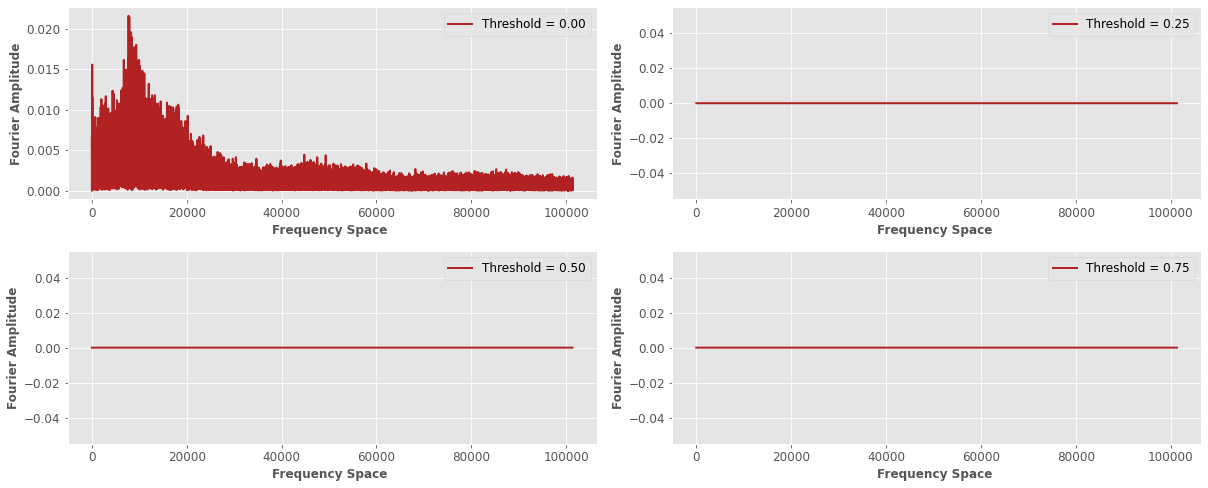

In [67]:
th_list = np.linspace(0,1,5)
th_list = th_list[0:len(th_list)-1]
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter_amp(th_i)
    plt.plot(th_filter[0:int(len(signal)/2.)],color='firebrick',label='Threshold = %.2f'%(th_list[i]))
    plt.xlabel('Frequency Space ')
    plt.ylabel('Fourier Amplitude')
    plt.legend()
plt.tight_layout()

inverse transform each filtered Fourier transforms

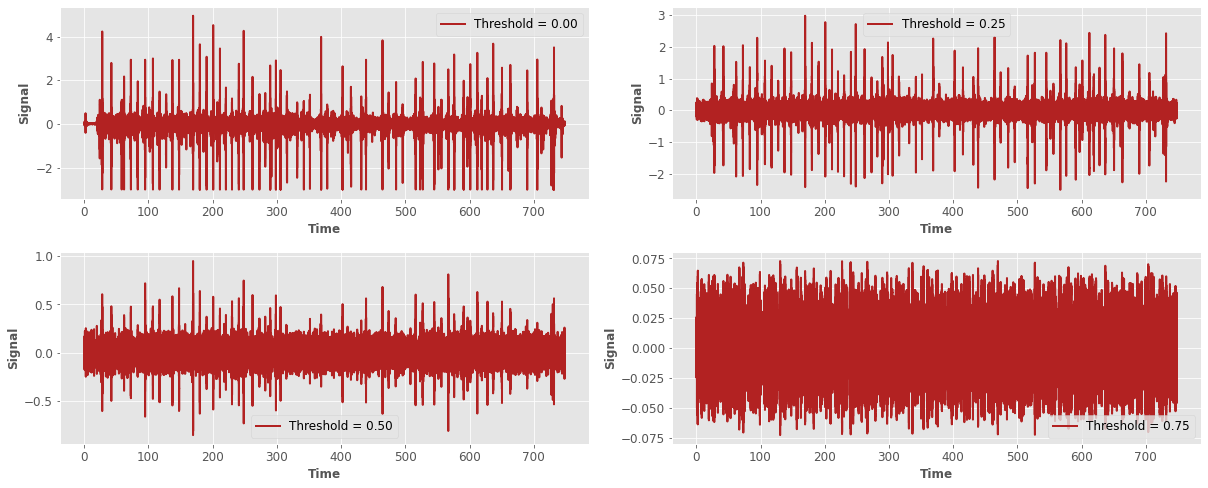

In [68]:
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter(th_i)
    signal_filter =np.real(np.fft.ifft(th_filter))
    plt.plot(x,signal_filter,color='firebrick',label='Threshold = %.2f'%(th_list[i]))
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend()
plt.tight_layout()

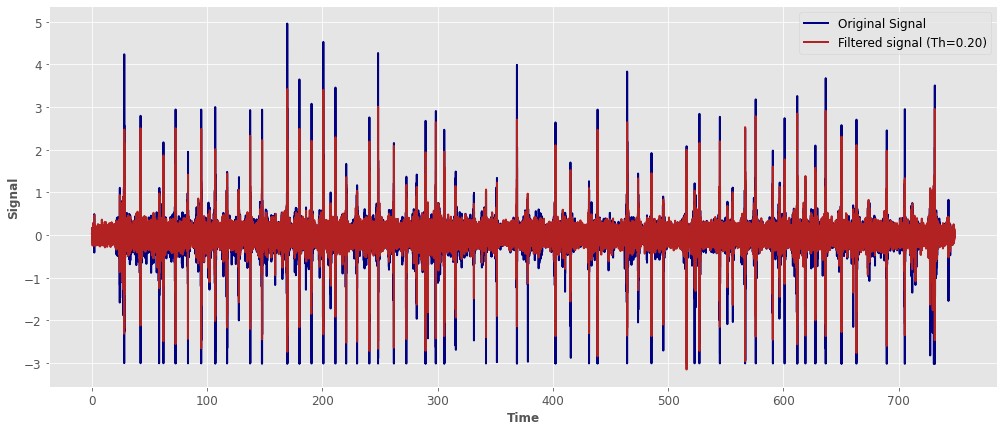

In [69]:
th_value = 0.2 #hit and trile , you may change and check this value
example_signal = filter_signal(th_value)
plt.plot(x,signal,color='navy',label='Original Signal')
plt.plot(x,example_signal,color='firebrick',label='Filtered signal (Th=%.2f)'%(th_value))
#plt.plot(x,signal-example_signal,color='darkorange',label='Difference')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()

Text(0.5, 0, 'Threshold Value')

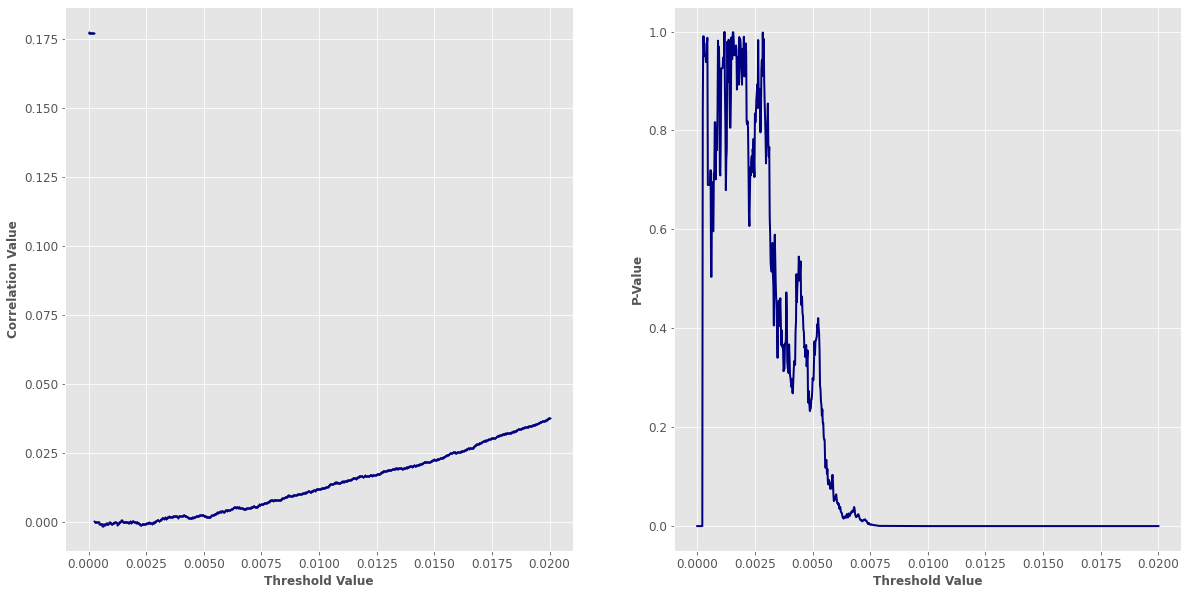

In [70]:
th_list = np.linspace(0,0.02,1000)
th_list = th_list[0:len(th_list)]
p_values = []
corr_values = []
for t in th_list:
    filt_signal = filter_signal(t)
    res = stats.spearmanr(signal,signal-filt_signal)
    p_values.append(res.pvalue)
    corr_values.append(res.correlation)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(th_list,corr_values,s=2,color='navy')
#plt.plot(th_list,p_values)
plt.ylabel('Correlation Value')
plt.xlabel('Threshold Value')
plt.subplot(1,2,2)
plt.plot(th_list,p_values,color='navy')
#plt.plot(th_list,p_values)
plt.ylabel('P-Value')
plt.xlabel('Threshold Value')

In [72]:
th_opt = th_list[np.array(corr_values).argmin()]
th_opt

0.0006006006006006006

FOURIER TRANSFORM ON ROADJOINT1 DATA.

In [74]:
df5 = RoadJoint1.copy()

In [75]:
df5.head()

timeRelativeRef  samplingTime  epoch  latitude  longitude  altitude  speed  \
0           171697        171697    NaN       NaN        NaN       NaN    NaN   
1           171784            88    NaN       NaN        NaN       NaN    NaN   
2           171800            15    NaN       NaN        NaN       NaN    NaN   
3           171805             5    NaN       NaN        NaN       NaN    NaN   
4           171807             2    NaN       NaN        NaN       NaN    NaN   

   satellites  accelerationX  accelerationY  ...  humidity  \
0         NaN          -0.21           0.01  ...       NaN   
1         NaN          -0.21           0.00  ...       NaN   
2         NaN          -0.21           0.01  ...       NaN   
3         NaN          -0.21           0.01  ...       NaN   
4         NaN          -0.21           0.01  ...       NaN   

   barometricPressure  light  PM1.0_CF1  PM2.5_CF1  PM10.0_CF1  PM1.0_Auto  \
0                 NaN    NaN        NaN        NaN         NaN         NaN   
1                 NaN    NaN        NaN        NaN         NaN         NaN   
2                 NaN    NaN        NaN        NaN         NaN         NaN   
3                 NaN    NaN        NaN        NaN         NaN         NaN   
4                 NaN    NaN        NaN        NaN         NaN         NaN   

   PM2.5_Auto  PM10.0_Auto      label  
0         NaN          NaN  roadJoint  
1         NaN          NaN  roadJoint  
2         NaN          NaN  roadJoint  
3         NaN          NaN  roadJoint  
4         NaN          NaN  roadJoint  

[5 rows x 25 columns]

In [76]:
df5['timeRelative_sec'] = df5['timeRelativeRef']/1000  # convert ms to sec. to understand easily
df5['timeRelative_sec'] = df5['timeRelative_sec']-min(df5['timeRelative_sec']) # start time form zero to make more sence 

df5['equal_sampled_numbers'] = df5.index # i think we don’t have equally sampled time space, lets create one starting from zero

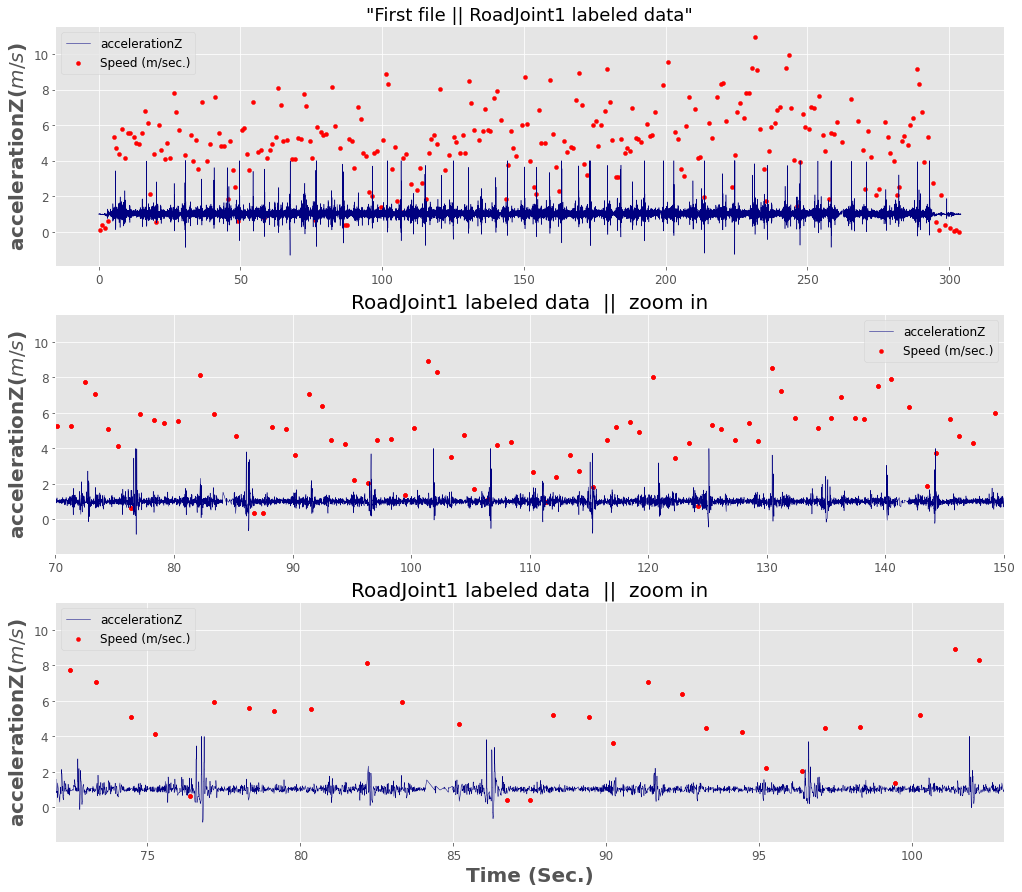

In [77]:
x = df5.timeRelative_sec
xe = df5.equal_sampled_numbers
y = df5.accelerationZ

plt.rcParams['figure.figsize'] = (17, 15)

plt.subplot(3,1,1)
plt.plot(x,y,'navy', linewidth = 0.5);plt.title('"First file || RoadJoint1 labeled data"',fontsize=18)
speed =plt.scatter(x, df5['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(x,y,'navy', linewidth = 0.5)
speed =plt.scatter(x, df5['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
speed =plt.scatter(x, df5['speed'], color = 'red',marker='.')
plt.title('RoadJoint1 labeled data  ||  zoom in',fontsize=20)
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
#plt.xlabel('Time (Sec.)',fontsize=20)
plt.xlim(70, 150)


plt.subplot(3,1,3)
plt.plot(x,y,'navy', linewidth = 0.5)
speed =plt.scatter(x, df5['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
speed =plt.scatter(x, df5['speed'], color = 'red',marker='.')
plt.title('RoadJoint1 labeled data  ||  zoom in',fontsize=20)
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
plt.xlabel('Time (Sec.)',fontsize=20)
plt.xlim(70, 150)
plt.xlim(72, 103)
plt.rcParams['figure.figsize'] = (17, 7)

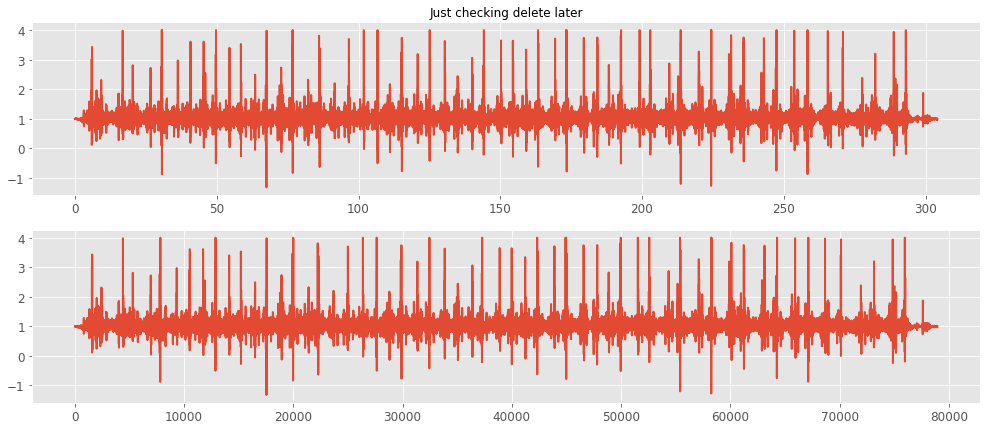

In [78]:
plt.subplot(2,1,1)
plt.title("Just checking delete later")
plt.plot(x,y)
plt.subplot(2,1,2)
plt.plot(xe,y)

Fourier analysis works well only for stationary data, use Polynomial Regression to find the best-fit polynomial function that fits the data. Then we will remove this line and obtain the stationary time-series ... (LEcture 4 Ts)

Text(0, 0.5, 'Price')

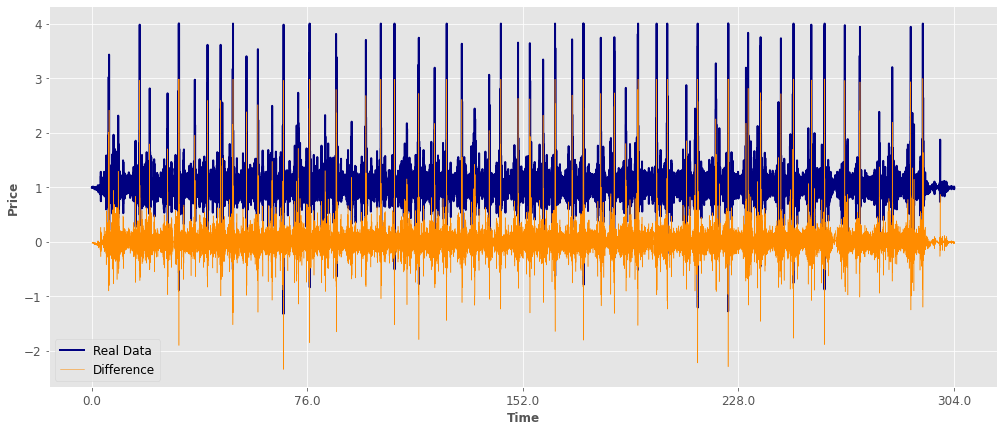

In [80]:
idx = np.linspace(0,len(x)-1,5).astype(int)
X = np.array(df5.index).reshape(-1,1)
pf = PolynomialFeatures(3)
X = pf.fit_transform(X)
reg = LinearRegression().fit(X, y)
reg.score(X, y)
#plt.plot(x,reg.predict(X),label='Polynomial Regression',color='firebrick', linewidth = 5)
plt.plot(x,y,label='Real Data',color='navy')
plt.plot(x,y-reg.predict(X),label='Difference',color='darkorange', linewidth = 0.5)
plt.legend()
plt.xticks(x[idx].round(),x[idx].round())
plt.xlabel('Time')
plt.ylabel('Price')

Fourier transform and plot the amplitude:
Denoising Algorithm

Text(0, 0.5, 'Fourier Amplitude')

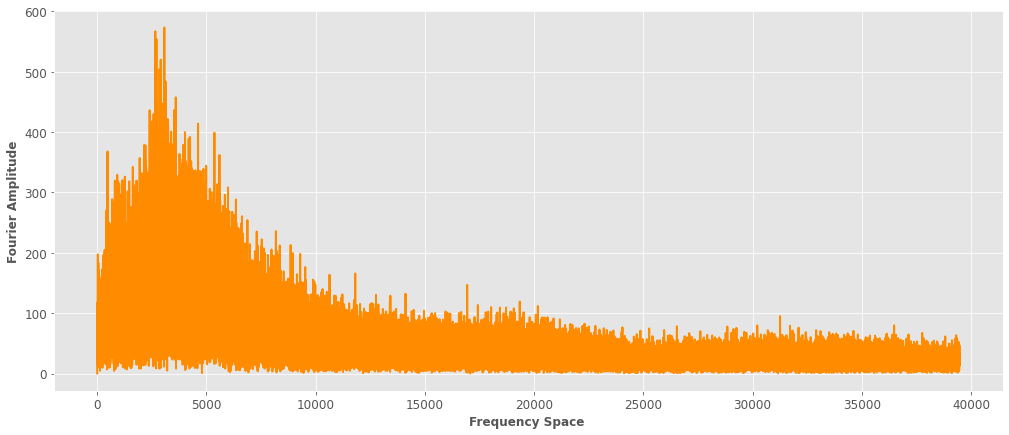

In [81]:
plt.rcParams['figure.figsize'] = (17, 7)
signal = reg.predict(X)-y
signal = signal-signal.mean()
fft_signal = np.abs(np.fft.fft(signal))
plt.plot(fft_signal[0:int(len(signal)/2)],color='darkorange')
plt.xlabel('Frequency Space ')
plt.ylabel('Fourier Amplitude')

In [82]:
new_Xph = fft_signal[0:int(len(signal)/2.)]

In [83]:
#functions from intro to BI lectures 8

def filter_signal(th):
    f_s = fft_filter(th)
    return np.real(np.fft.ifft(f_s))
def fft_filter(perc):
    fft_signal = np.fft.fft(signal)
    fft_abs = np.abs(fft_signal)
    th=perc*(2*fft_abs[0:int(len(signal)/2.)]/len(new_Xph)).max()
    fft_tof=fft_signal.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof
def fft_filter_amp(th):
    fft = np.fft.fft(signal)
    fft_tof=fft.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof_abs[fft_tof_abs<=th]=0
    return fft_tof_abs[0:int(len(fft_tof_abs)/2.)]

filter it. We are cutting out all the frequencies below a certain level. This level is set by using the maximum amplitude as a reference value.

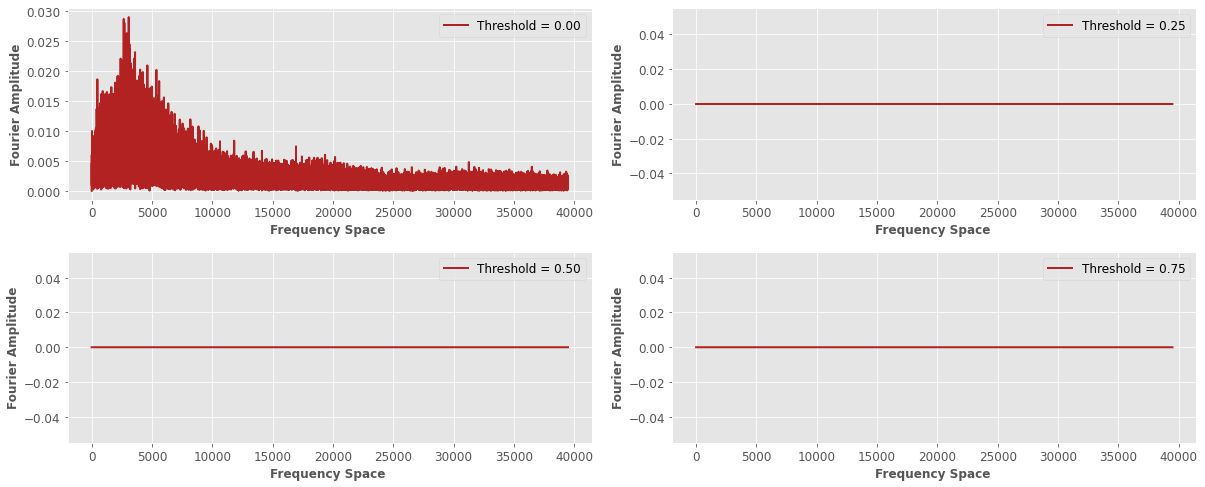

In [84]:
th_list = np.linspace(0,1,5)
th_list = th_list[0:len(th_list)-1]
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter_amp(th_i)
    plt.plot(th_filter[0:int(len(signal)/2.)],color='firebrick',label='Threshold = %.2f'%(th_list[i]))
    plt.xlabel('Frequency Space ')
    plt.ylabel('Fourier Amplitude')
    plt.legend()
plt.tight_layout()

inverse transform each filtered Fourier transforms

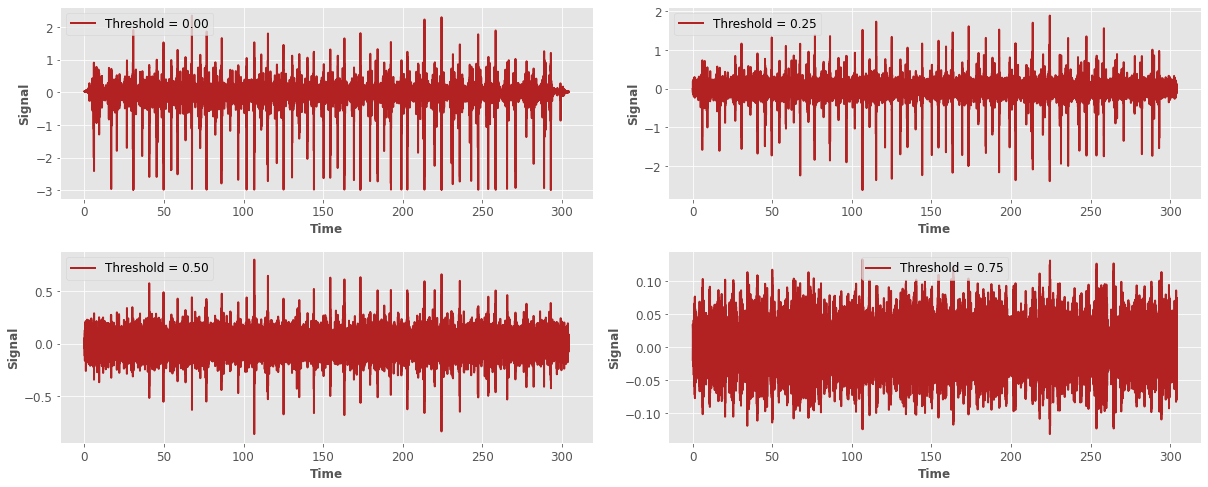

In [85]:
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter(th_i)
    signal_filter =np.real(np.fft.ifft(th_filter))
    plt.plot(x,signal_filter,color='firebrick',label='Threshold = %.2f'%(th_list[i]))
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend()
plt.tight_layout()

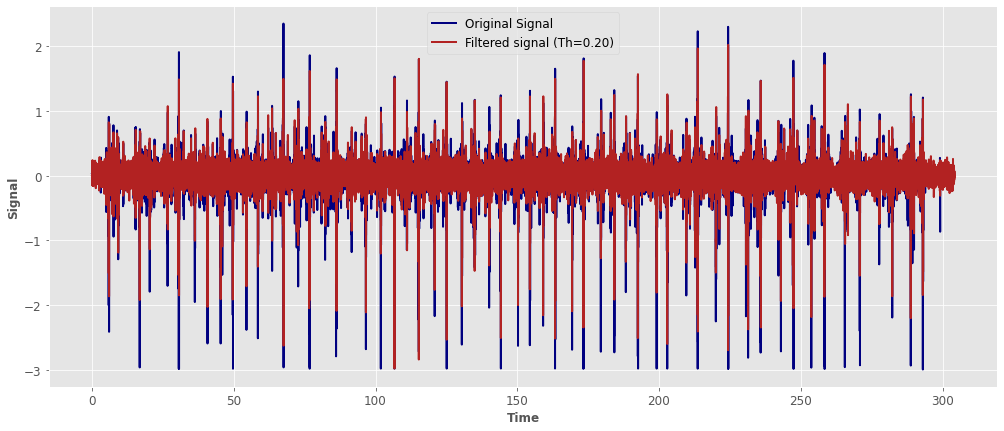

In [86]:
th_value = 0.2 #hit and trile , you may change and check this value
example_signal = filter_signal(th_value)
plt.plot(x,signal,color='navy',label='Original Signal')
plt.plot(x,example_signal,color='firebrick',label='Filtered signal (Th=%.2f)'%(th_value))
#plt.plot(x,signal-example_signal,color='darkorange',label='Difference')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()

Text(0.5, 0, 'Threshold Value')

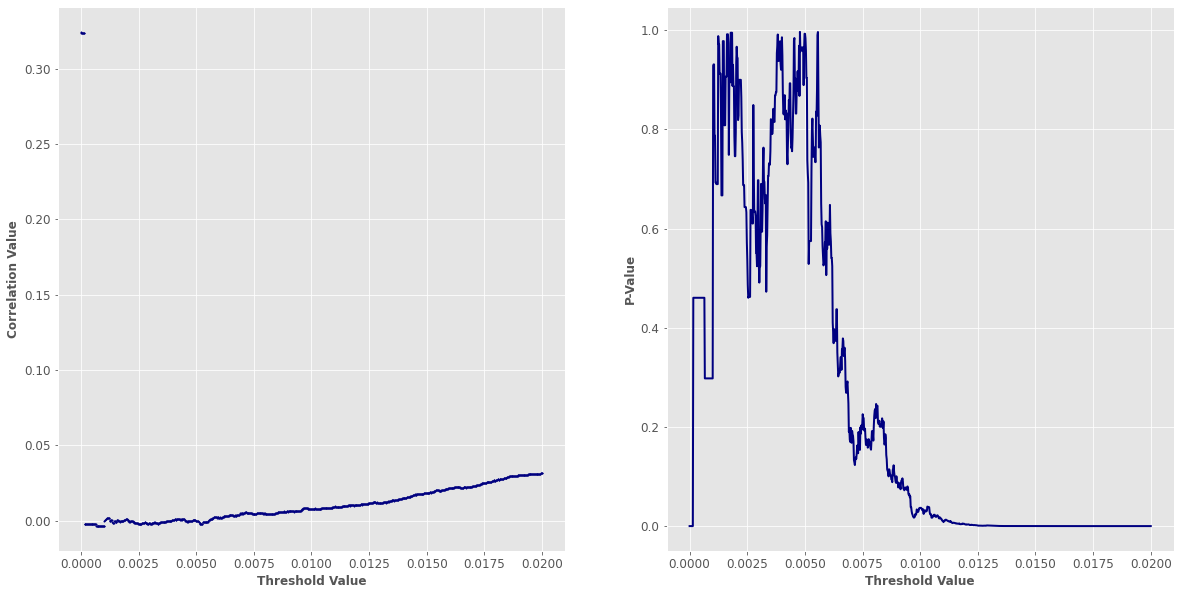

In [87]:
th_list = np.linspace(0,0.02,1000)
th_list = th_list[0:len(th_list)]
p_values = []
corr_values = []
for t in th_list:
    filt_signal = filter_signal(t)
    res = stats.spearmanr(signal,signal-filt_signal)
    p_values.append(res.pvalue)
    corr_values.append(res.correlation)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(th_list,corr_values,s=2,color='navy')
#plt.plot(th_list,p_values)
plt.ylabel('Correlation Value')
plt.xlabel('Threshold Value')
plt.subplot(1,2,2)
plt.plot(th_list,p_values,color='navy')
#plt.plot(th_list,p_values)
plt.ylabel('P-Value')
plt.xlabel('Threshold Value')

In [88]:
th_opt = th_list[np.array(corr_values).argmin()]
th_opt

0.0006606606606606606

FOURIER TRANSFORM ON ROADJOINT2 DATA. 

In [89]:
df6 = RoadJoint2.copy()

In [90]:
df6.head()

timeRelativeRef  samplingTime  epoch  latitude  longitude  altitude  speed  \
0          1089658       1089658    NaN       NaN        NaN       NaN    NaN   
1          1089728            69    NaN       NaN        NaN       NaN    NaN   
2          1089744            16    NaN       NaN        NaN       NaN    NaN   
3          1089749             5    NaN       NaN        NaN       NaN    NaN   
4          1089751             2    NaN       NaN        NaN       NaN    NaN   

   satellites  accelerationX  accelerationY  ...  humidity  \
0         NaN          -0.31           0.08  ...       NaN   
1         NaN          -0.32           0.08  ...       NaN   
2         NaN          -0.30           0.08  ...       NaN   
3         NaN          -0.30           0.08  ...       NaN   
4         NaN          -0.30           0.08  ...       NaN   

   barometricPressure  light  PM1.0_CF1  PM2.5_CF1  PM10.0_CF1  PM1.0_Auto  \
0                 NaN    NaN        NaN        NaN         NaN         NaN   
1                 NaN    NaN        NaN        NaN         NaN         NaN   
2                 NaN    NaN        NaN        NaN         NaN         NaN   
3                 NaN    NaN        NaN        NaN         NaN         NaN   
4                 NaN    NaN        NaN        NaN         NaN         NaN   

   PM2.5_Auto  PM10.0_Auto      label  
0         NaN          NaN  roadJoint  
1         NaN          NaN  roadJoint  
2         NaN          NaN  roadJoint  
3         NaN          NaN  roadJoint  
4         NaN          NaN  roadJoint  

[5 rows x 25 columns]

In [91]:
df6['timeRelative_sec'] = df6['timeRelativeRef']/1000  # convert ms to sec. to understand easily
df6['timeRelative_sec'] = df6['timeRelative_sec']-min(df6['timeRelative_sec']) # start time form zero to make more sence 

df6['equal_sampled_numbers'] = df6.index # i think we don’t have equally sampled time space, lets create one starting from zero

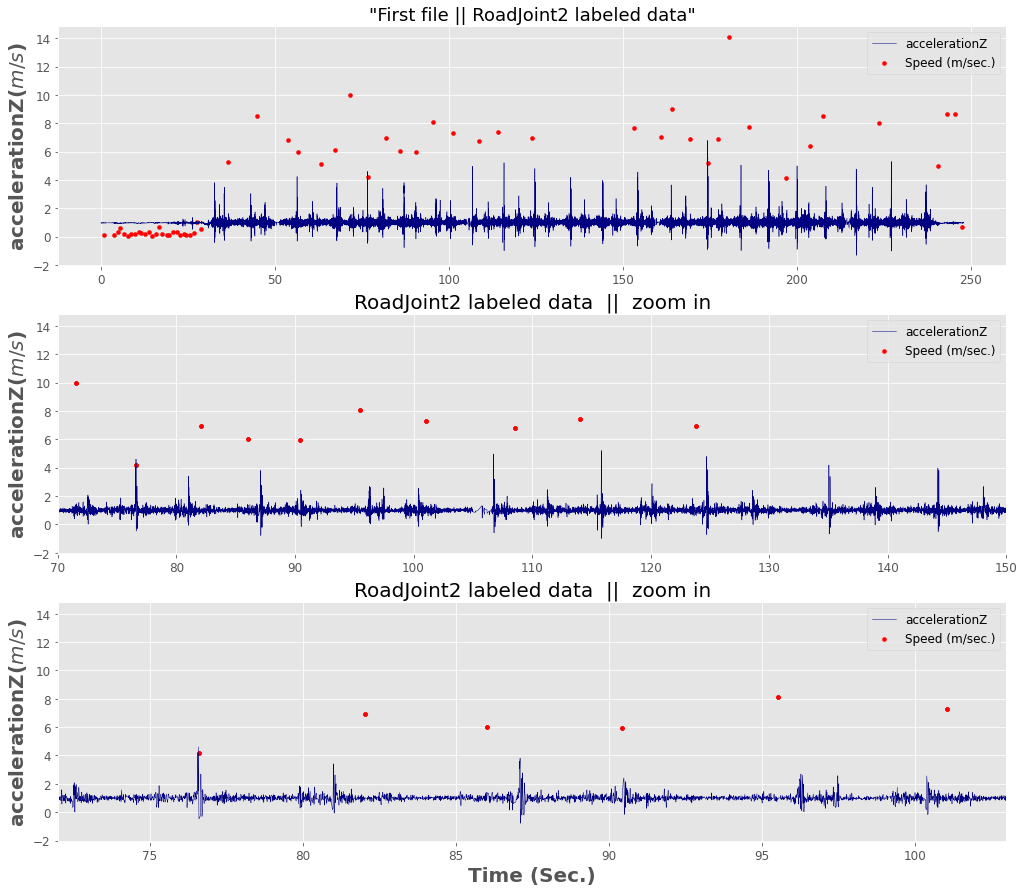

In [92]:
x = df6.timeRelative_sec
xe = df6.equal_sampled_numbers
y = df6.accelerationZ

plt.rcParams['figure.figsize'] = (17, 15)

plt.subplot(3,1,1)
plt.plot(x,y,'navy', linewidth = 0.5);plt.title('"First file || RoadJoint2 labeled data"',fontsize=18)
speed =plt.scatter(x, df6['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(x,y,'navy', linewidth = 0.5)
speed =plt.scatter(x, df6['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
speed =plt.scatter(x, df6['speed'], color = 'red',marker='.')
plt.title('RoadJoint2 labeled data  ||  zoom in',fontsize=20)
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
#plt.xlabel('Time (Sec.)',fontsize=20)
plt.xlim(70, 150)


plt.subplot(3,1,3)
plt.plot(x,y,'navy', linewidth = 0.5)
speed =plt.scatter(x, df6['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
speed =plt.scatter(x, df6['speed'], color = 'red',marker='.')
plt.title('RoadJoint2 labeled data  ||  zoom in',fontsize=20)
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
plt.xlabel('Time (Sec.)',fontsize=20)
plt.xlim(70, 150)
plt.xlim(72, 103)
plt.rcParams['figure.figsize'] = (17, 7)

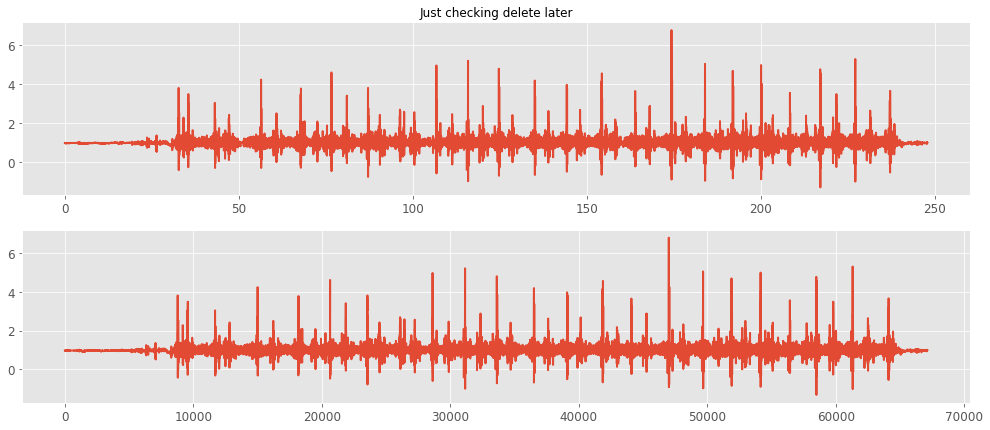

In [93]:
plt.subplot(2,1,1)
plt.title("Just checking delete later")
plt.plot(x,y)
plt.subplot(2,1,2)
plt.plot(xe,y)

Fourier analysis works well only for stationary data, use Polynomial Regression to find the best-fit polynomial function that fits the data. Then we will remove this line and obtain the stationary time-series ... (LEcture 4 Ts)

Text(0, 0.5, 'Price')

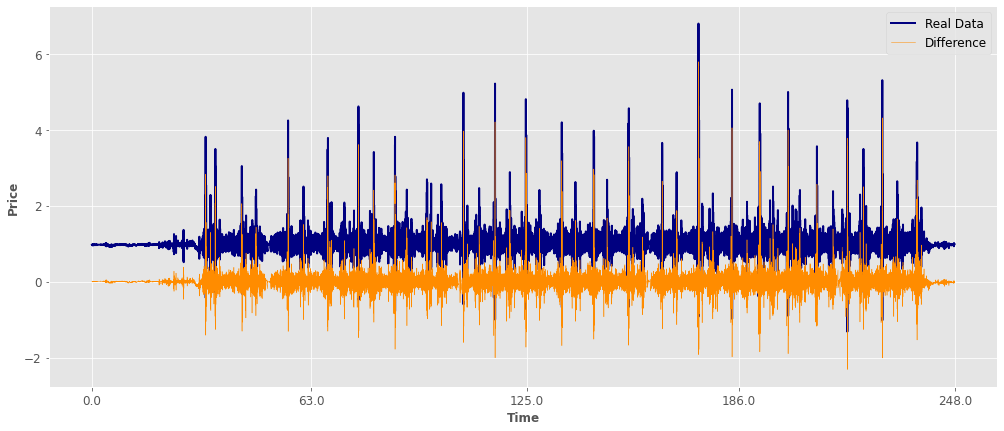

In [94]:
idx = np.linspace(0,len(x)-1,5).astype(int)
X = np.array(df6.index).reshape(-1,1)
pf = PolynomialFeatures(3)
X = pf.fit_transform(X)
reg = LinearRegression().fit(X, y)
reg.score(X, y)
#plt.plot(x,reg.predict(X),label='Polynomial Regression',color='firebrick', linewidth = 5)
plt.plot(x,y,label='Real Data',color='navy')
plt.plot(x,y-reg.predict(X),label='Difference',color='darkorange', linewidth = 0.5)
plt.legend()
plt.xticks(x[idx].round(),x[idx].round())
plt.xlabel('Time')
plt.ylabel('Price')

Fourier transform and plot the amplitude:¶
Denoising Algorithm

Text(0, 0.5, 'Fourier Amplitude')

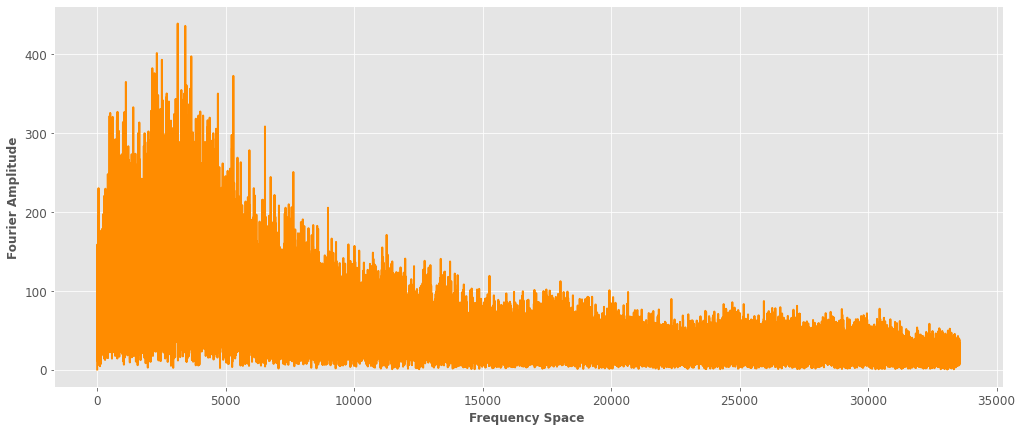

In [95]:
plt.rcParams['figure.figsize'] = (17, 7)
signal = reg.predict(X)-y
signal = signal-signal.mean()
fft_signal = np.abs(np.fft.fft(signal))
plt.plot(fft_signal[0:int(len(signal)/2)],color='darkorange')
plt.xlabel('Frequency Space ')
plt.ylabel('Fourier Amplitude')

In [96]:
new_Xph = fft_signal[0:int(len(signal)/2.)]

In [97]:
#functions from intro to BI lectures 8

def filter_signal(th):
    f_s = fft_filter(th)
    return np.real(np.fft.ifft(f_s))
def fft_filter(perc):
    fft_signal = np.fft.fft(signal)
    fft_abs = np.abs(fft_signal)
    th=perc*(2*fft_abs[0:int(len(signal)/2.)]/len(new_Xph)).max()
    fft_tof=fft_signal.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof
def fft_filter_amp(th):
    fft = np.fft.fft(signal)
    fft_tof=fft.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof_abs[fft_tof_abs<=th]=0
    return fft_tof_abs[0:int(len(fft_tof_abs)/2.)]

filter it. We are cutting out all the frequencies below a certain level. This level is set by using the maximum amplitude as a reference value.

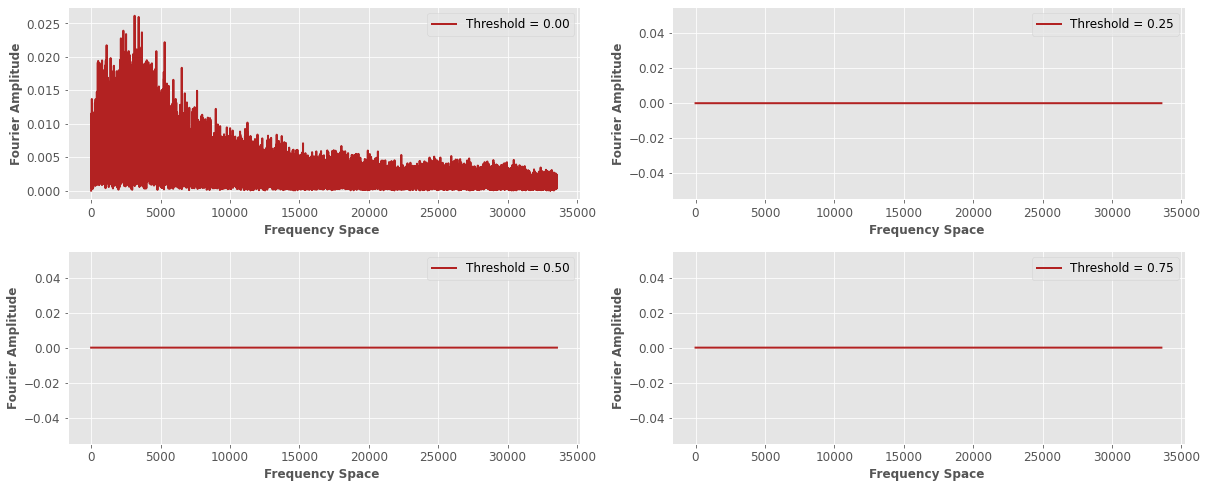

In [98]:
th_list = np.linspace(0,1,5)
th_list = th_list[0:len(th_list)-1]
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter_amp(th_i)
    plt.plot(th_filter[0:int(len(signal)/2.)],color='firebrick',label='Threshold = %.2f'%(th_list[i]))
    plt.xlabel('Frequency Space ')
    plt.ylabel('Fourier Amplitude')
    plt.legend()
plt.tight_layout()

inverse transform each filtered Fourier transforms

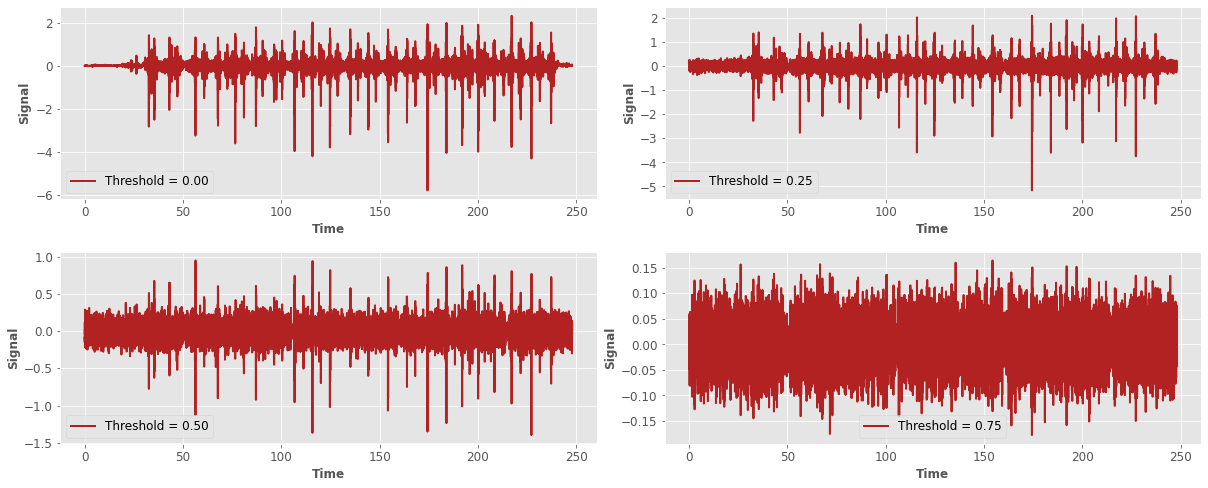

In [99]:
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter(th_i)
    signal_filter =np.real(np.fft.ifft(th_filter))
    plt.plot(x,signal_filter,color='firebrick',label='Threshold = %.2f'%(th_list[i]))
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend()
plt.tight_layout()

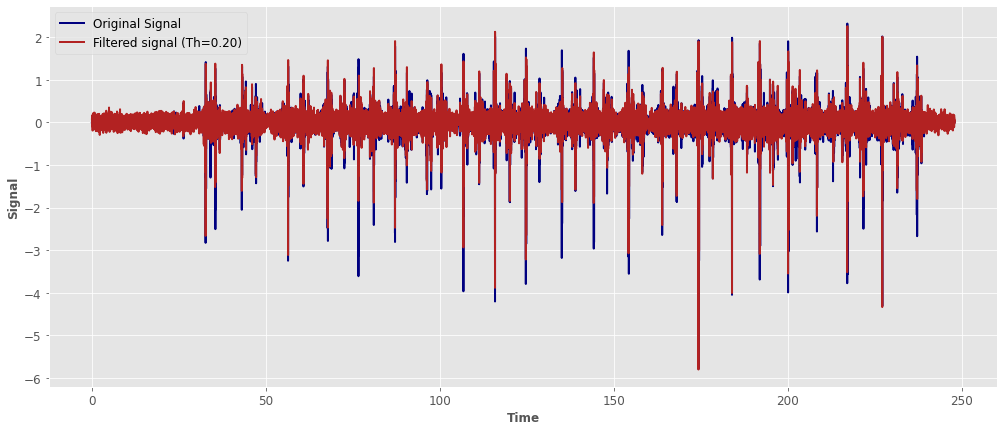

In [100]:
th_value = 0.2 #hit and trile , you may change and check this value
example_signal = filter_signal(th_value)
plt.plot(x,signal,color='navy',label='Original Signal')
plt.plot(x,example_signal,color='firebrick',label='Filtered signal (Th=%.2f)'%(th_value))
#plt.plot(x,signal-example_signal,color='darkorange',label='Difference')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()

signal should not correlate to the noise, ...................... correlation value and p-value) at different value of threshold

Text(0.5, 0, 'Threshold Value')

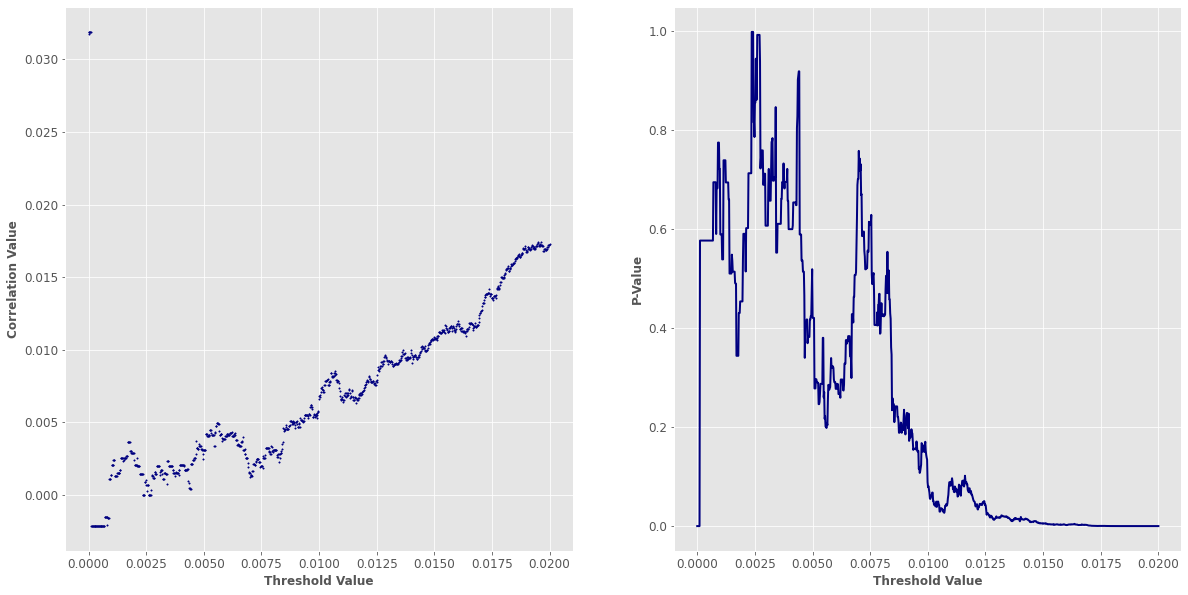

In [101]:
th_list = np.linspace(0,0.02,1000)
th_list = th_list[0:len(th_list)]
p_values = []
corr_values = []
for t in th_list:
    filt_signal = filter_signal(t)
    res = stats.spearmanr(signal,signal-filt_signal)
    p_values.append(res.pvalue)
    corr_values.append(res.correlation)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(th_list,corr_values,s=2,color='navy')
#plt.plot(th_list,p_values)
plt.ylabel('Correlation Value')
plt.xlabel('Threshold Value')
plt.subplot(1,2,2)
plt.plot(th_list,p_values,color='navy')
#plt.plot(th_list,p_values)
plt.ylabel('P-Value')
plt.xlabel('Threshold Value')

In [102]:
th_opt = th_list[np.array(corr_values).argmin()]
th_opt

0.00012012012012012012

FOURIER TRANSFORM ON StormBasin1 DATA. 

In [103]:
df7 = StormBasin1.copy()

In [104]:
df7.head()

timeRelativeRef  samplingTime  epoch  latitude  longitude  altitude  speed  \
0           232231        232231    NaN       NaN        NaN       NaN    NaN   
1           232319            88    NaN       NaN        NaN       NaN    NaN   
2           232336            17    NaN       NaN        NaN       NaN    NaN   
3           232341             5    NaN       NaN        NaN       NaN    NaN   
4           232343             2    NaN       NaN        NaN       NaN    NaN   

   satellites  accelerationX  accelerationY  ...  humidity  \
0         NaN          -0.23           0.05  ...       NaN   
1         NaN          -0.24           0.05  ...       NaN   
2         NaN          -0.23           0.05  ...       NaN   
3         NaN          -0.23           0.05  ...       NaN   
4         NaN          -0.23           0.05  ...       NaN   

   barometricPressure  light  PM1.0_CF1  PM2.5_CF1  PM10.0_CF1  PM1.0_Auto  \
0                 NaN    NaN        NaN        NaN         NaN         NaN   
1                 NaN    NaN        NaN        NaN         NaN         NaN   
2                 NaN    NaN        NaN        NaN         NaN         NaN   
3                 NaN    NaN        NaN        NaN         NaN         NaN   
4                 NaN    NaN        NaN        NaN         NaN         NaN   

   PM2.5_Auto  PM10.0_Auto       label  
0         NaN          NaN  stormBasin  
1         NaN          NaN  stormBasin  
2         NaN          NaN  stormBasin  
3         NaN          NaN  stormBasin  
4         NaN          NaN  stormBasin  

[5 rows x 25 columns]

In [105]:
df7['timeRelative_sec'] = df7['timeRelativeRef']/1000  # convert ms to sec. to understand easily
df7['timeRelative_sec'] = df7['timeRelative_sec']-min(df7['timeRelative_sec']) # start time form zero to make more sence 

df7['equal_sampled_numbers'] = df7.index # i think we don’t have equally sampled time space, lets create one starting from zero

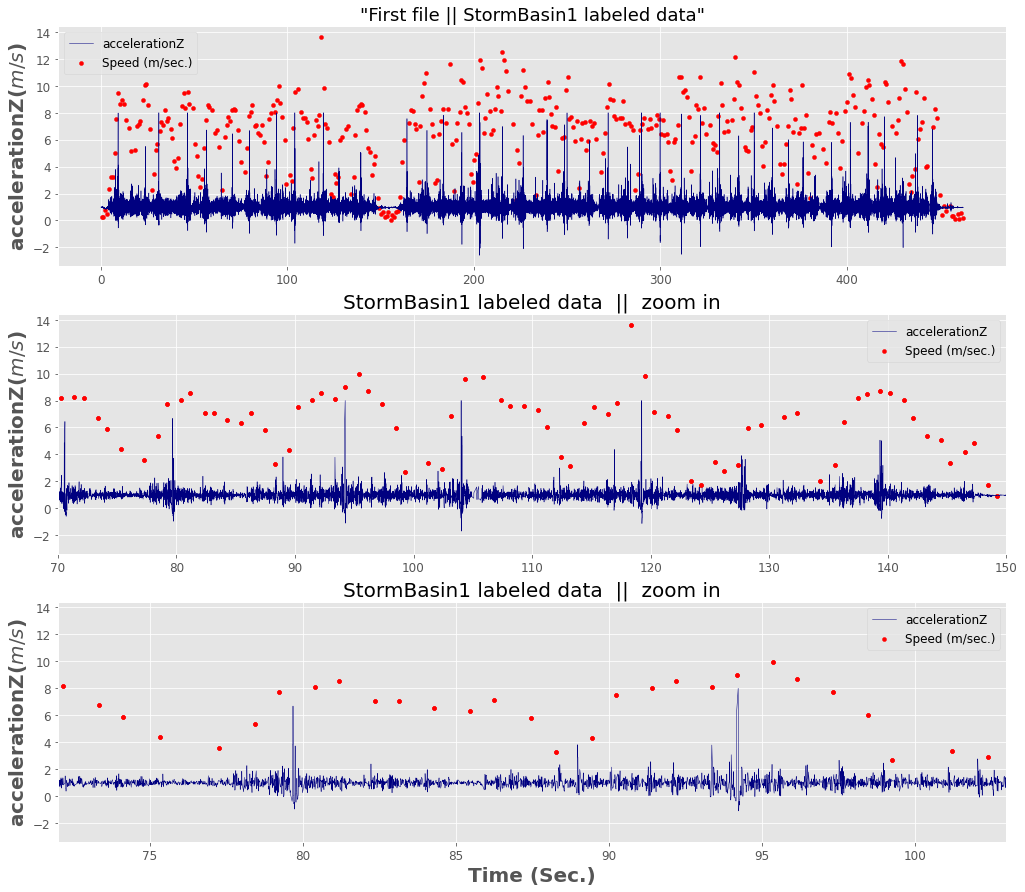

In [106]:
x = df7.timeRelative_sec
xe = df7.equal_sampled_numbers
y = df7.accelerationZ

plt.rcParams['figure.figsize'] = (17, 15)

plt.subplot(3,1,1)
plt.plot(x,y,'navy', linewidth = 0.5);plt.title('"First file || StormBasin1 labeled data"',fontsize=18)
speed =plt.scatter(x, df7['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(x,y,'navy', linewidth = 0.5)
speed =plt.scatter(x, df7['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
speed =plt.scatter(x, df7['speed'], color = 'red',marker='.')
plt.title('StormBasin1 labeled data  ||  zoom in',fontsize=20)
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
#plt.xlabel('Time (Sec.)',fontsize=20)
plt.xlim(70, 150)


plt.subplot(3,1,3)
plt.plot(x,y,'navy', linewidth = 0.5)
speed =plt.scatter(x, df7['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
speed =plt.scatter(x, df7['speed'], color = 'red',marker='.')
plt.title('StormBasin1 labeled data  ||  zoom in',fontsize=20)
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
plt.xlabel('Time (Sec.)',fontsize=20)
plt.xlim(70, 150)
plt.xlim(72, 103)
plt.rcParams['figure.figsize'] = (17, 7)

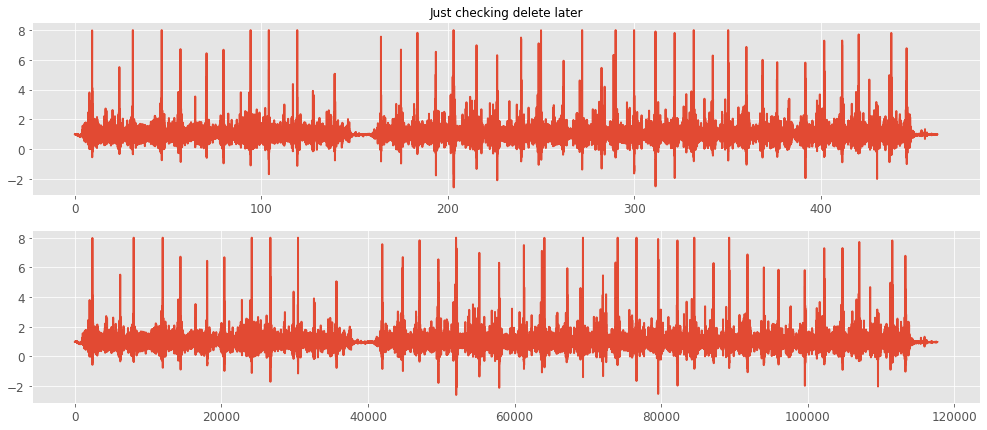

In [107]:
plt.subplot(2,1,1)
plt.title("Just checking delete later")
plt.plot(x,y)
plt.subplot(2,1,2)
plt.plot(xe,y)

Fourier analysis works well only for stationary data, use Polynomial Regression to find the best-fit polynomial function that fits the data. Then we will remove this line and obtain the stationary time-series ... (LEcture 4 Ts)

Text(0, 0.5, 'Price')

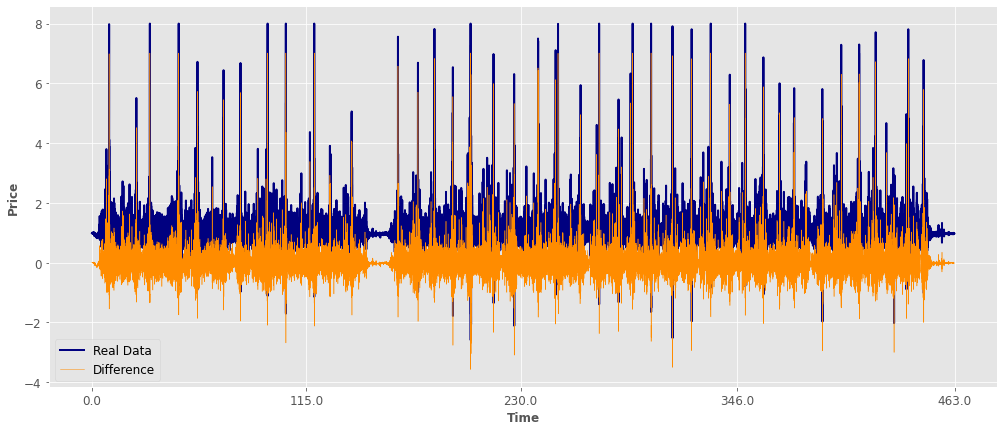

In [108]:
idx = np.linspace(0,len(x)-1,5).astype(int)
X = np.array(df7.index).reshape(-1,1)
pf = PolynomialFeatures(3)
X = pf.fit_transform(X)
reg = LinearRegression().fit(X, y)
reg.score(X, y)
#plt.plot(x,reg.predict(X),label='Polynomial Regression',color='firebrick', linewidth = 5)
plt.plot(x,y,label='Real Data',color='navy')
plt.plot(x,y-reg.predict(X),label='Difference',color='darkorange', linewidth = 0.5)
plt.legend()
plt.xticks(x[idx].round(),x[idx].round())
plt.xlabel('Time')
plt.ylabel('Price')

Fourier transform and plot the amplitude:¶ Denoising Algorithm

Text(0, 0.5, 'Fourier Amplitude')

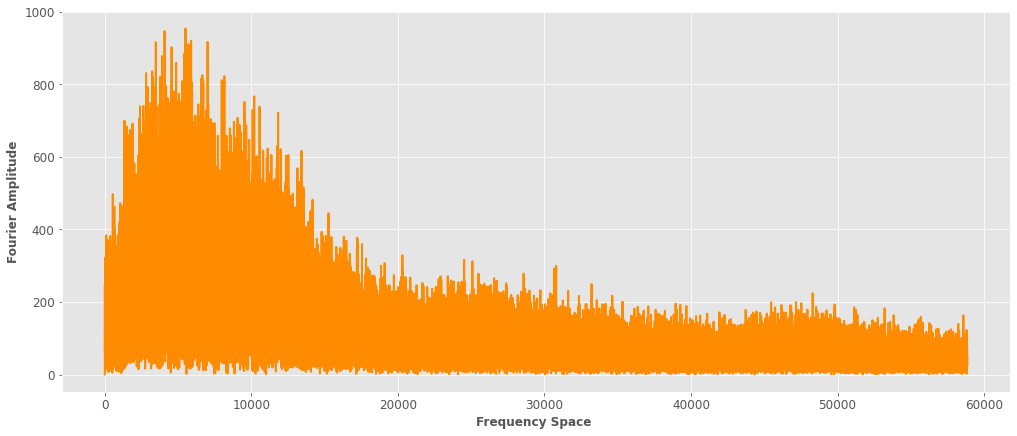

In [109]:
plt.rcParams['figure.figsize'] = (17, 7)
signal = reg.predict(X)-y
signal = signal-signal.mean()
fft_signal = np.abs(np.fft.fft(signal))
plt.plot(fft_signal[0:int(len(signal)/2)],color='darkorange')
plt.xlabel('Frequency Space ')
plt.ylabel('Fourier Amplitude')

In [110]:
new_Xph = fft_signal[0:int(len(signal)/2.)]

In [111]:
#functions from intro to BI lectures 8

def filter_signal(th):
    f_s = fft_filter(th)
    return np.real(np.fft.ifft(f_s))
def fft_filter(perc):
    fft_signal = np.fft.fft(signal)
    fft_abs = np.abs(fft_signal)
    th=perc*(2*fft_abs[0:int(len(signal)/2.)]/len(new_Xph)).max()
    fft_tof=fft_signal.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof
def fft_filter_amp(th):
    fft = np.fft.fft(signal)
    fft_tof=fft.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof_abs[fft_tof_abs<=th]=0
    return fft_tof_abs[0:int(len(fft_tof_abs)/2.)]

filter it. We are cutting out all the frequencies below a certain level. This level is set by using the maximum amplitude as a reference value.

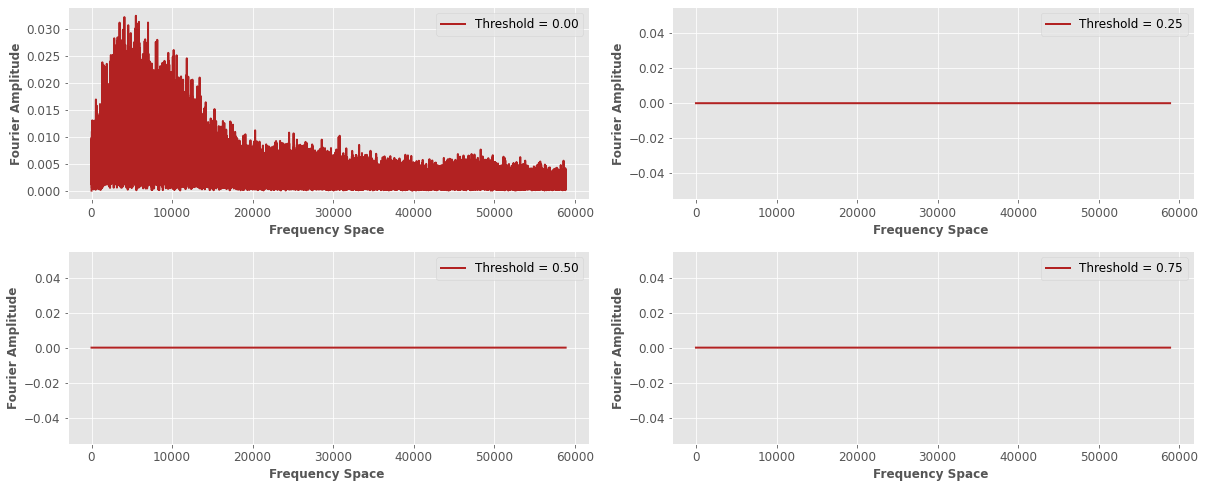

In [112]:
th_list = np.linspace(0,1,5)
th_list = th_list[0:len(th_list)-1]
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter_amp(th_i)
    plt.plot(th_filter[0:int(len(signal)/2.)],color='firebrick',label='Threshold = %.2f'%(th_list[i]))
    plt.xlabel('Frequency Space ')
    plt.ylabel('Fourier Amplitude')
    plt.legend()
plt.tight_layout()

inverse transform each filtered Fourier transforms

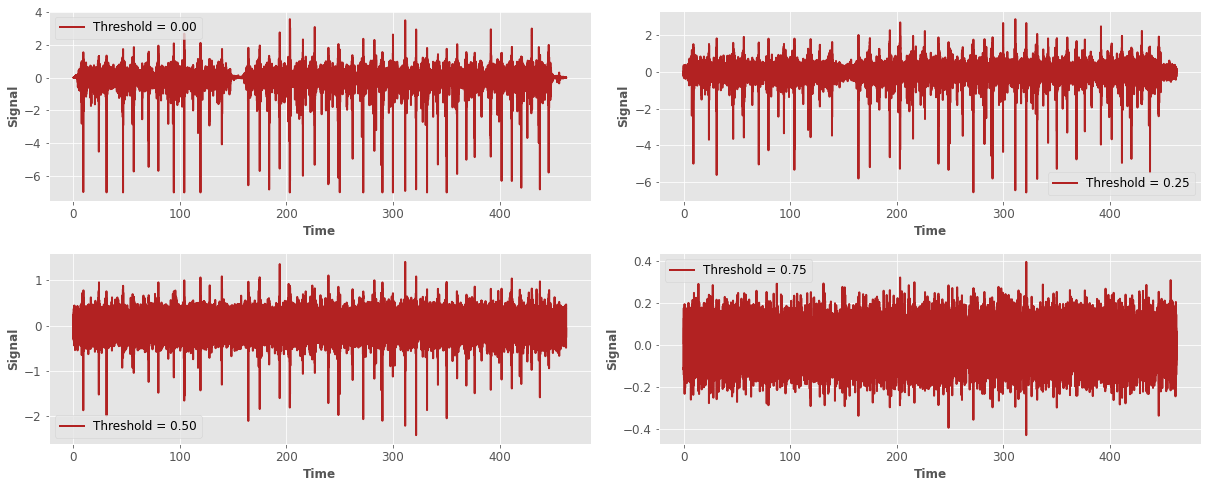

In [113]:
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter(th_i)
    signal_filter =np.real(np.fft.ifft(th_filter))
    plt.plot(x,signal_filter,color='firebrick',label='Threshold = %.2f'%(th_list[i]))
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend()
plt.tight_layout()

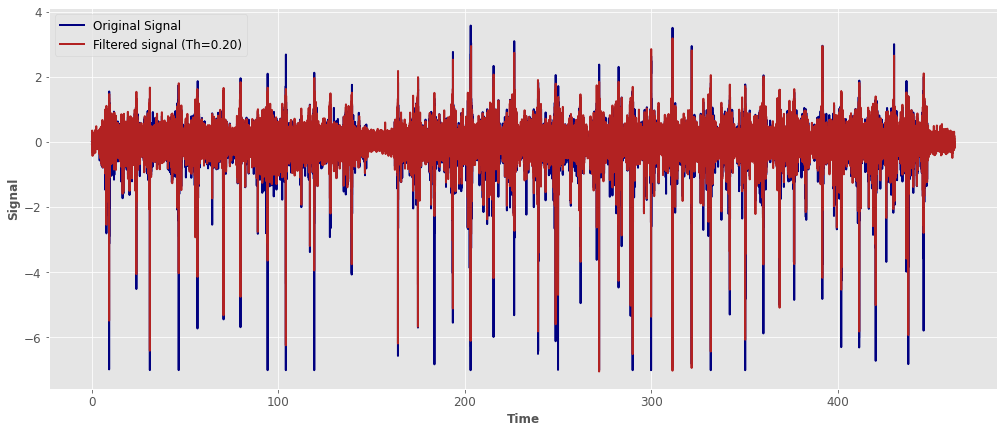

In [114]:
th_value = 0.2 #hit and trile , you may change and check this value
example_signal = filter_signal(th_value)
plt.plot(x,signal,color='navy',label='Original Signal')
plt.plot(x,example_signal,color='firebrick',label='Filtered signal (Th=%.2f)'%(th_value))
#plt.plot(x,signal-example_signal,color='darkorange',label='Difference')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()

signal should not correlate to the noise, ...................... correlation value and p-value) at different value of threshold

Text(0.5, 0, 'Threshold Value')

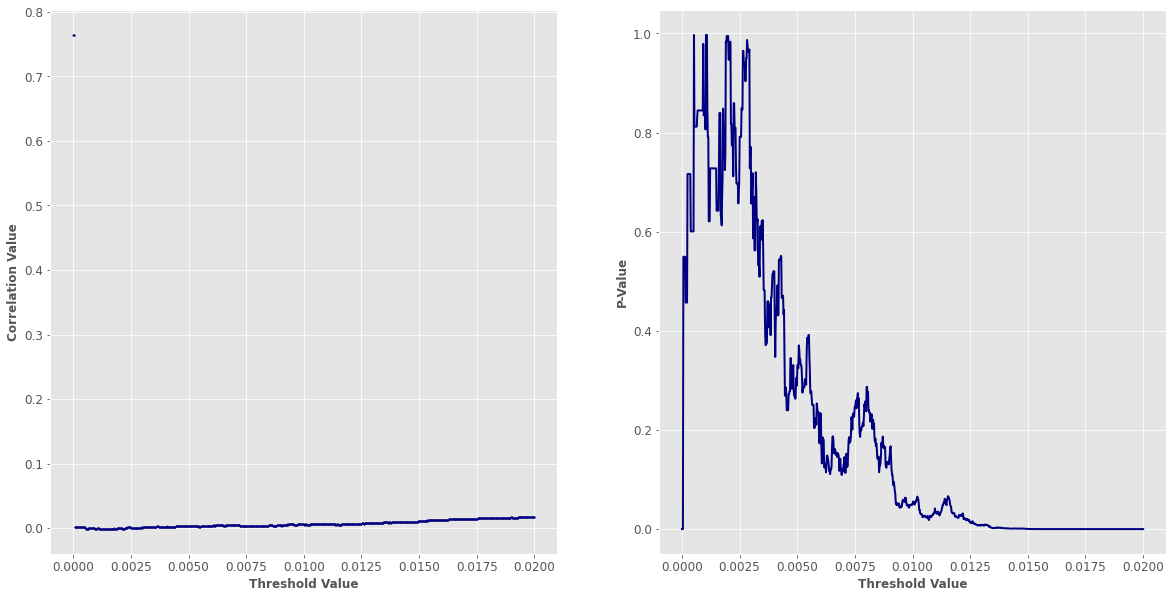

In [115]:
th_list = np.linspace(0,0.02,1000)
th_list = th_list[0:len(th_list)]
p_values = []
corr_values = []
for t in th_list:
    filt_signal = filter_signal(t)
    res = stats.spearmanr(signal,signal-filt_signal)
    p_values.append(res.pvalue)
    corr_values.append(res.correlation)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(th_list,corr_values,s=2,color='navy')
#plt.plot(th_list,p_values)
plt.ylabel('Correlation Value')
plt.xlabel('Threshold Value')
plt.subplot(1,2,2)
plt.plot(th_list,p_values,color='navy')
#plt.plot(th_list,p_values)
plt.ylabel('P-Value')
plt.xlabel('Threshold Value')

In [116]:
th_opt = th_list[np.array(corr_values).argmin()]
th_opt

0.0017217217217217217

FOURIER TRANSFORM ON StormBasin2 DATA.

In [117]:
df8 = StormBasin2.copy()

In [118]:
df8.head()

timeRelativeRef  samplingTime  epoch  latitude  longitude  altitude  speed  \
0           169151        169151    NaN       NaN        NaN       NaN    NaN   
1           169241            90    NaN       NaN        NaN       NaN    NaN   
2           169256            15    NaN       NaN        NaN       NaN    NaN   
3           169261             5    NaN       NaN        NaN       NaN    NaN   
4           169263             2    NaN       NaN        NaN       NaN    NaN   

   satellites  accelerationX  accelerationY  ...  humidity  \
0         NaN          -0.04          -0.20  ...       NaN   
1         NaN          -0.22          -0.22  ...       NaN   
2         NaN          -0.08          -0.12  ...       NaN   
3         NaN          -0.08          -0.12  ...       NaN   
4         NaN          -0.08          -0.12  ...       NaN   

   barometricPressure  light  PM1.0_CF1  PM2.5_CF1  PM10.0_CF1  PM1.0_Auto  \
0                 NaN    NaN        NaN        NaN         NaN         NaN   
1                 NaN    NaN        NaN        NaN         NaN         NaN   
2                 NaN    NaN        NaN        NaN         NaN         NaN   
3                 NaN    NaN        NaN        NaN         NaN         NaN   
4                 NaN    NaN        NaN        NaN         NaN         NaN   

   PM2.5_Auto  PM10.0_Auto       label  
0         NaN          NaN  stormBasin  
1         NaN          NaN  stormBasin  
2         NaN          NaN  stormBasin  
3         NaN          NaN  stormBasin  
4         NaN          NaN  stormBasin  

[5 rows x 25 columns]

In [119]:
df8['timeRelative_sec'] = df8['timeRelativeRef']/1000  # convert ms to sec. to understand easily
df8['timeRelative_sec'] = df8['timeRelative_sec']-min(df8['timeRelative_sec']) # start time form zero to make more sence 

df8['equal_sampled_numbers'] = df8.index # i think we don’t have equally sampled time space, lets creates one starting from zero

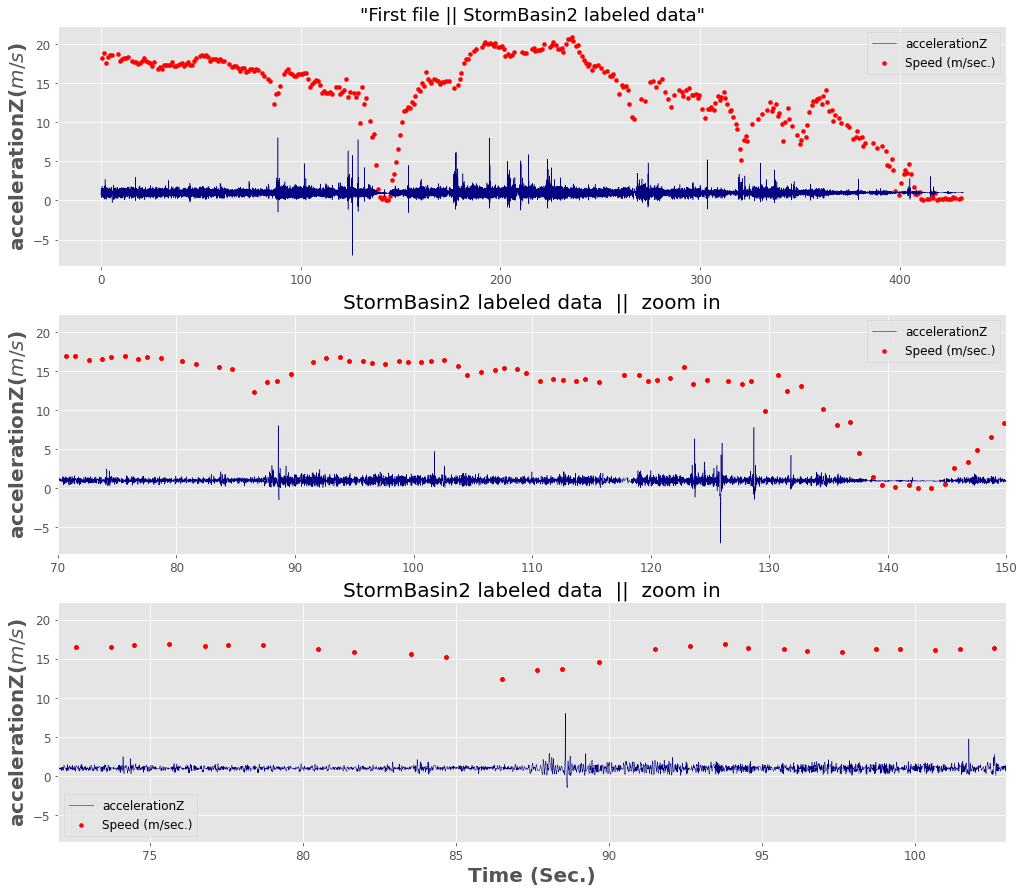

In [120]:
x = df8.timeRelative_sec
xe = df8.equal_sampled_numbers
y = df8.accelerationZ

plt.rcParams['figure.figsize'] = (17, 15)

plt.subplot(3,1,1)
plt.plot(x,y,'navy', linewidth = 0.5);plt.title('"First file || StormBasin2 labeled data"',fontsize=18)
speed =plt.scatter(x, df8['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(x,y,'navy', linewidth = 0.5)
speed =plt.scatter(x, df8['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
speed =plt.scatter(x, df8['speed'], color = 'red',marker='.')
plt.title('StormBasin2 labeled data  ||  zoom in',fontsize=20)
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
#plt.xlabel('Time (Sec.)',fontsize=20)
plt.xlim(70, 150)


plt.subplot(3,1,3)
plt.plot(x,y,'navy', linewidth = 0.5)
speed =plt.scatter(x, df8['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
speed =plt.scatter(x, df8['speed'], color = 'red',marker='.')
plt.title('StormBasin2 labeled data  ||  zoom in',fontsize=20)
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
plt.xlabel('Time (Sec.)',fontsize=20)
plt.xlim(70, 150)
plt.xlim(72, 103)
plt.rcParams['figure.figsize'] = (17, 7)

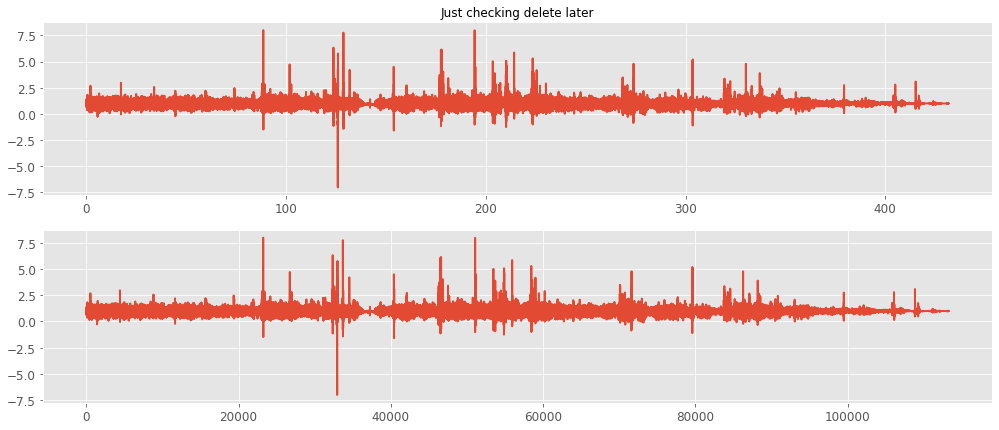

In [121]:
plt.subplot(2,1,1)
plt.title("Just checking delete later")
plt.plot(x,y)
plt.subplot(2,1,2)
plt.plot(xe,y)

Fourier analysis works well only for stationary data, use Polynomial Regression to find the best-fit polynomial function that fits the data. Then we will remove this line and obtain the stationary time-series ... (LEcture 4 Ts)

Text(0, 0.5, 'Price')

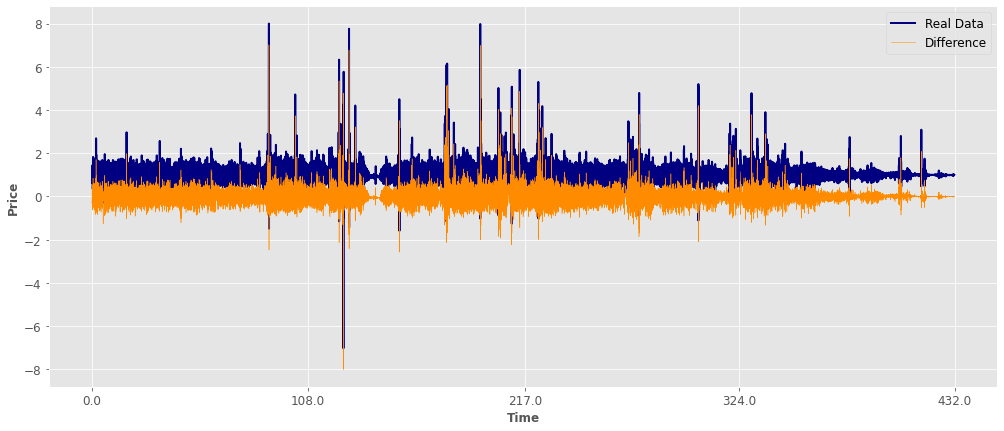

In [122]:
idx = np.linspace(0,len(x)-1,5).astype(int)
X = np.array(df8.index).reshape(-1,1)
pf = PolynomialFeatures(3)
X = pf.fit_transform(X)
reg = LinearRegression().fit(X, y)
reg.score(X, y)
#plt.plot(x,reg.predict(X),label='Polynomial Regression',color='firebrick', linewidth = 5)
plt.plot(x,y,label='Real Data',color='navy')
plt.plot(x,y-reg.predict(X),label='Difference',color='darkorange', linewidth = 0.5)
plt.legend()
plt.xticks(x[idx].round(),x[idx].round())
plt.xlabel('Time')
plt.ylabel('Price')

Fourier transform and plot the amplitude:¶ Denoising Algorithm

Text(0, 0.5, 'Fourier Amplitude')

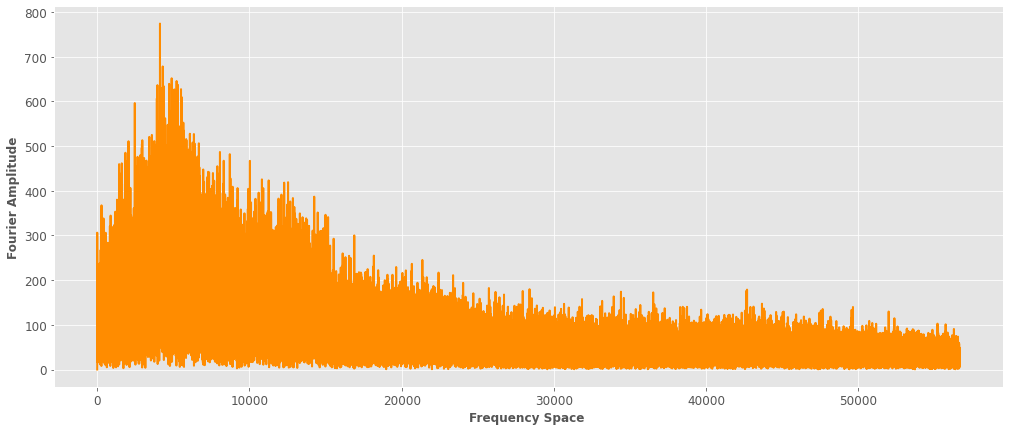

In [123]:
plt.rcParams['figure.figsize'] = (17, 7)
signal = reg.predict(X)-y
signal = signal-signal.mean()
fft_signal = np.abs(np.fft.fft(signal))
plt.plot(fft_signal[0:int(len(signal)/2)],color='darkorange')
plt.xlabel('Frequency Space ')
plt.ylabel('Fourier Amplitude')

In [124]:
new_Xph = fft_signal[0:int(len(signal)/2.)]

In [125]:
#functions from intro to BI lectures 8

def filter_signal(th):
    f_s = fft_filter(th)
    return np.real(np.fft.ifft(f_s))
def fft_filter(perc):
    fft_signal = np.fft.fft(signal)
    fft_abs = np.abs(fft_signal)
    th=perc*(2*fft_abs[0:int(len(signal)/2.)]/len(new_Xph)).max()
    fft_tof=fft_signal.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof
def fft_filter_amp(th):
    fft = np.fft.fft(signal)
    fft_tof=fft.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof_abs[fft_tof_abs<=th]=0
    return fft_tof_abs[0:int(len(fft_tof_abs)/2.)]

filter it. We are cutting out all the frequencies below a certain level. This level is set by using the maximum amplitude as a reference value.

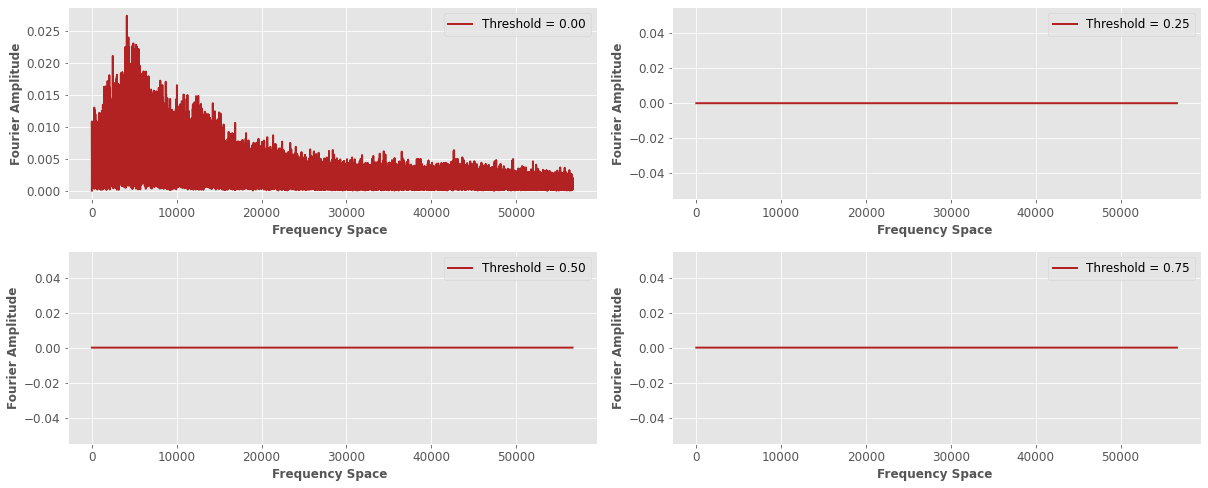

In [126]:
th_list = np.linspace(0,1,5)
th_list = th_list[0:len(th_list)-1]
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter_amp(th_i)
    plt.plot(th_filter[0:int(len(signal)/2.)],color='firebrick',label='Threshold = %.2f'%(th_list[i]))
    plt.xlabel('Frequency Space ')
    plt.ylabel('Fourier Amplitude')
    plt.legend()
plt.tight_layout()

inverse transform each filtered Fourier transforms

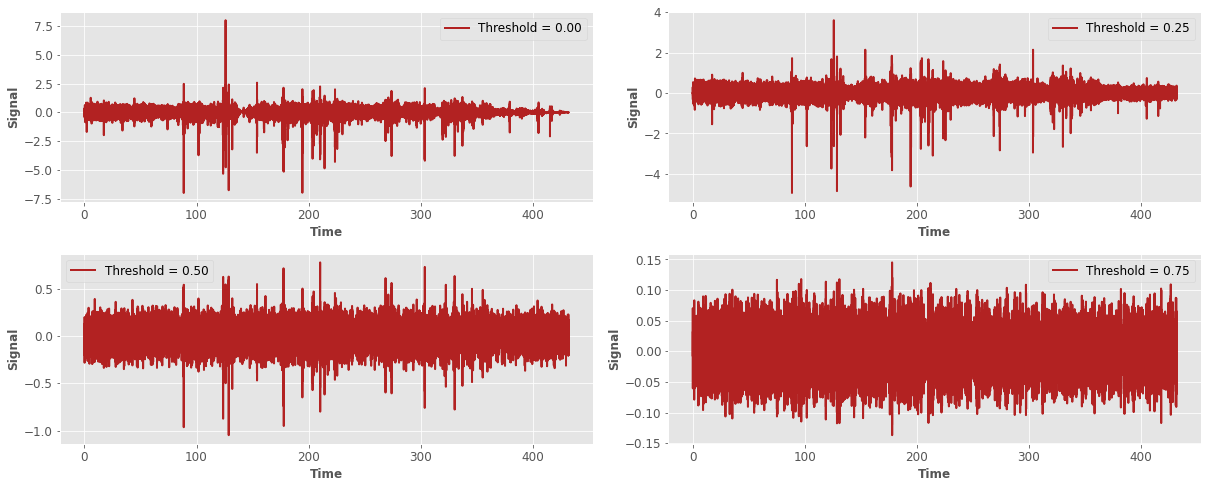

In [127]:
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter(th_i)
    signal_filter =np.real(np.fft.ifft(th_filter))
    plt.plot(x,signal_filter,color='firebrick',label='Threshold = %.2f'%(th_list[i]))
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend()
plt.tight_layout()

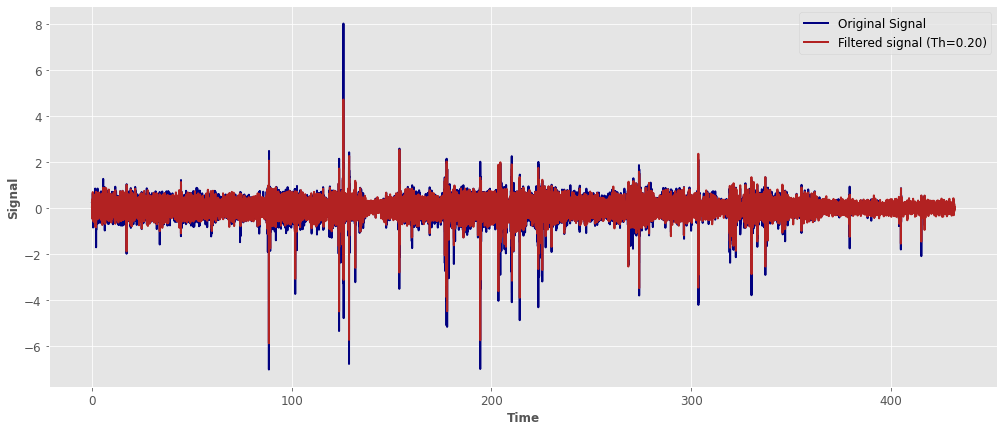

In [128]:
th_value = 0.2 #hit and trile , you may change and check this value
example_signal = filter_signal(th_value)
plt.plot(x,signal,color='navy',label='Original Signal')
plt.plot(x,example_signal,color='firebrick',label='Filtered signal (Th=%.2f)'%(th_value))
#plt.plot(x,signal-example_signal,color='darkorange',label='Difference')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()

signal should not correlate to the noise, ...................... correlation value and p-value) at different value of threshold

Text(0.5, 0, 'Threshold Value')

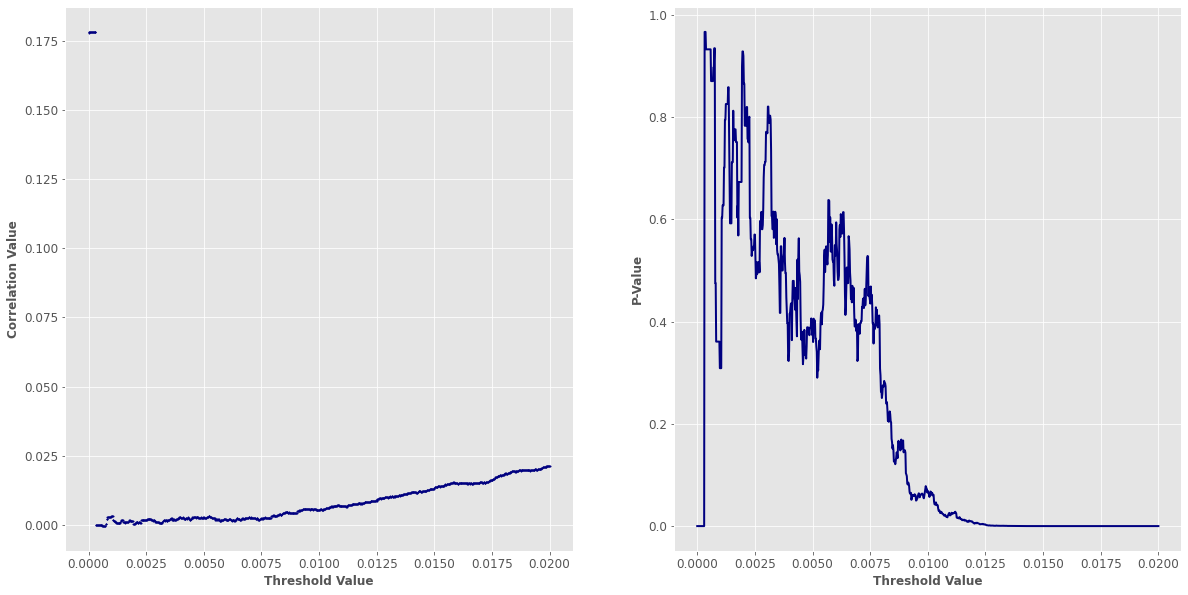

In [129]:
th_list = np.linspace(0,0.02,1000)
th_list = th_list[0:len(th_list)]
p_values = []
corr_values = []
for t in th_list:
    filt_signal = filter_signal(t)
    res = stats.spearmanr(signal,signal-filt_signal)
    p_values.append(res.pvalue)
    corr_values.append(res.correlation)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(th_list,corr_values,s=2,color='navy')
#plt.plot(th_list,p_values)
plt.ylabel('Correlation Value')
plt.xlabel('Threshold Value')
plt.subplot(1,2,2)
plt.plot(th_list,p_values,color='navy')
#plt.plot(th_list,p_values)
plt.ylabel('P-Value')
plt.xlabel('Threshold Value')

In [130]:
th_opt = th_list[np.array(corr_values).argmin()]
th_opt

0.0006006006006006006

FOURIER TRANSFORM ON StormBasin3 DATA.

In [131]:
df9 = StormBasin3.copy()

In [132]:
df9.head()

timeRelativeRef  samplingTime  epoch  latitude  longitude  altitude  speed  \
0           249719        249719    NaN       NaN        NaN       NaN    NaN   
1           249806            87    NaN       NaN        NaN       NaN    NaN   
2           249822            16    NaN       NaN        NaN       NaN    NaN   
3           249826             4    NaN       NaN        NaN       NaN    NaN   
4           249829             3    NaN       NaN        NaN       NaN    NaN   

   satellites  accelerationX  accelerationY  ...  humidity  \
0         NaN          -0.38           0.10  ...       NaN   
1         NaN          -0.16           0.16  ...       NaN   
2         NaN          -0.22          -0.09  ...       NaN   
3         NaN          -0.19          -0.11  ...       NaN   
4         NaN          -0.19          -0.11  ...       NaN   

   barometricPressure  light  PM1.0_CF1  PM2.5_CF1  PM10.0_CF1  PM1.0_Auto  \
0                 NaN    NaN        NaN        NaN         NaN         NaN   
1                 NaN    NaN        NaN        NaN         NaN         NaN   
2                 NaN    NaN        NaN        NaN         NaN         NaN   
3                 NaN    NaN        NaN        NaN         NaN         NaN   
4                 NaN    NaN        NaN        NaN         NaN         NaN   

   PM2.5_Auto  PM10.0_Auto       label  
0         NaN          NaN  stormBasin  
1         NaN          NaN  stormBasin  
2         NaN          NaN  stormBasin  
3         NaN          NaN  stormBasin  
4         NaN          NaN  stormBasin  

[5 rows x 25 columns]

In [133]:
df9['timeRelative_sec'] = df9['timeRelativeRef']/1000  # convert ms to sec. to understand easily
df9['timeRelative_sec'] = df9['timeRelative_sec']-min(df9['timeRelative_sec']) # start time form zero to make more sence 

df9['equal_sampled_numbers'] = df9.index # i think we don’t have equally sampled time space, lets creates one starting from zero

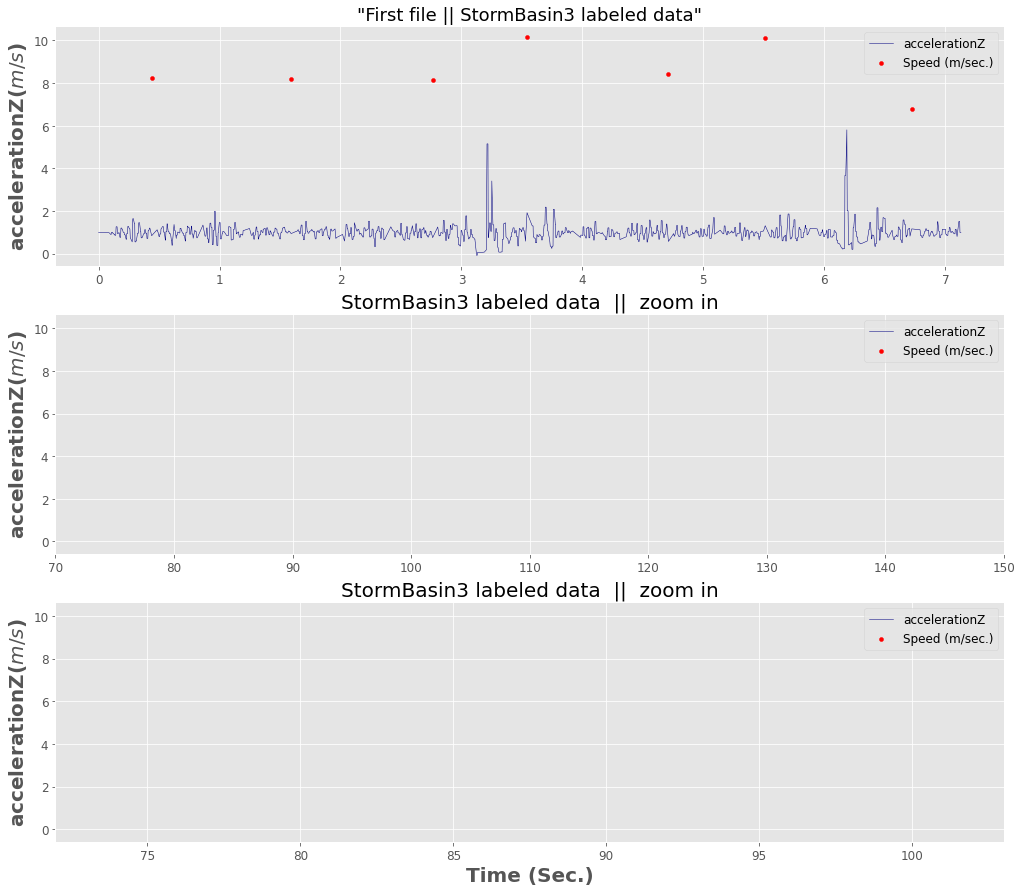

In [134]:
x = df9.timeRelative_sec
xe = df9.equal_sampled_numbers
y = df9.accelerationZ

plt.rcParams['figure.figsize'] = (17, 15)

plt.subplot(3,1,1)
plt.plot(x,y,'navy', linewidth = 0.5);plt.title('"First file || StormBasin3 labeled data"',fontsize=18)
speed =plt.scatter(x, df9['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(x,y,'navy', linewidth = 0.5)
speed =plt.scatter(x, df9['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
speed =plt.scatter(x, df9['speed'], color = 'red',marker='.')
plt.title('StormBasin3 labeled data  ||  zoom in',fontsize=20)
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
#plt.xlabel('Time (Sec.)',fontsize=20)
plt.xlim(70, 150)


plt.subplot(3,1,3)
plt.plot(x,y,'navy', linewidth = 0.5)
speed =plt.scatter(x, df9['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
speed =plt.scatter(x, df9['speed'], color = 'red',marker='.')
plt.title('StormBasin3 labeled data  ||  zoom in',fontsize=20)
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
plt.xlabel('Time (Sec.)',fontsize=20)
plt.xlim(70, 150)
plt.xlim(72, 103)
plt.rcParams['figure.figsize'] = (17, 7)

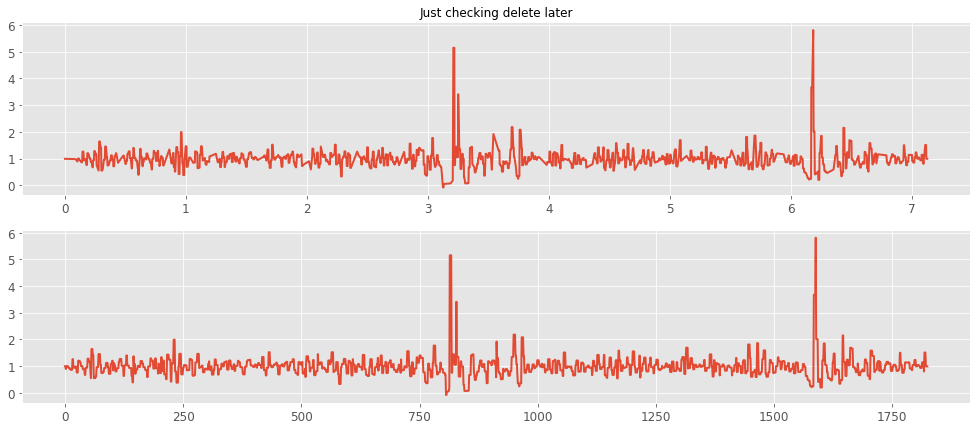

In [135]:
plt.subplot(2,1,1)
plt.title("Just checking delete later")
plt.plot(x,y)
plt.subplot(2,1,2)
plt.plot(xe,y)

Fourier analysis works well only for stationary data, use Polynomial Regression to find the best-fit polynomial function that fits the data. Then we will remove this line and obtain the stationary time-series ... (LEcture 4 Ts)

Text(0, 0.5, 'Price')

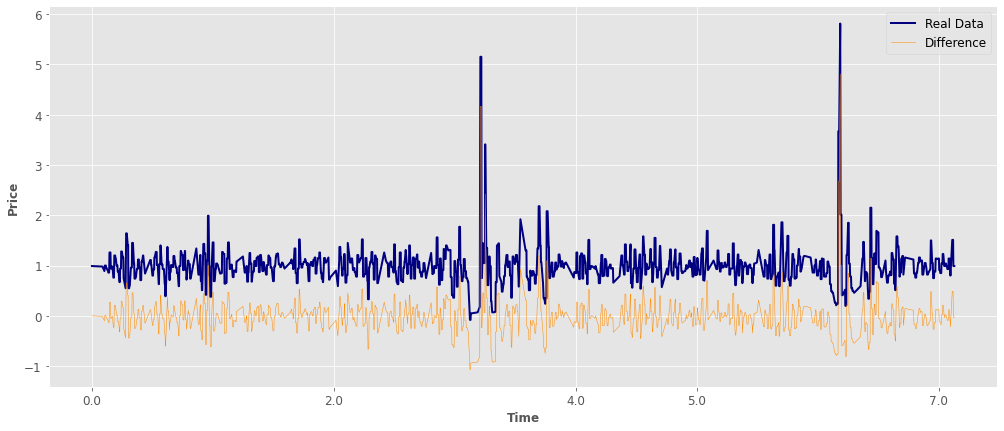

In [136]:
idx = np.linspace(0,len(x)-1,5).astype(int)
X = np.array(df9.index).reshape(-1,1)
pf = PolynomialFeatures(3)
X = pf.fit_transform(X)
reg = LinearRegression().fit(X, y)
reg.score(X, y)
#plt.plot(x,reg.predict(X),label='Polynomial Regression',color='firebrick', linewidth = 5)
plt.plot(x,y,label='Real Data',color='navy')
plt.plot(x,y-reg.predict(X),label='Difference',color='darkorange', linewidth = 0.5)
plt.legend()
plt.xticks(x[idx].round(),x[idx].round())
plt.xlabel('Time')
plt.ylabel('Price')

Fourier transform and plot the amplitude:¶ Denoising Algorithm

Text(0, 0.5, 'Fourier Amplitude')

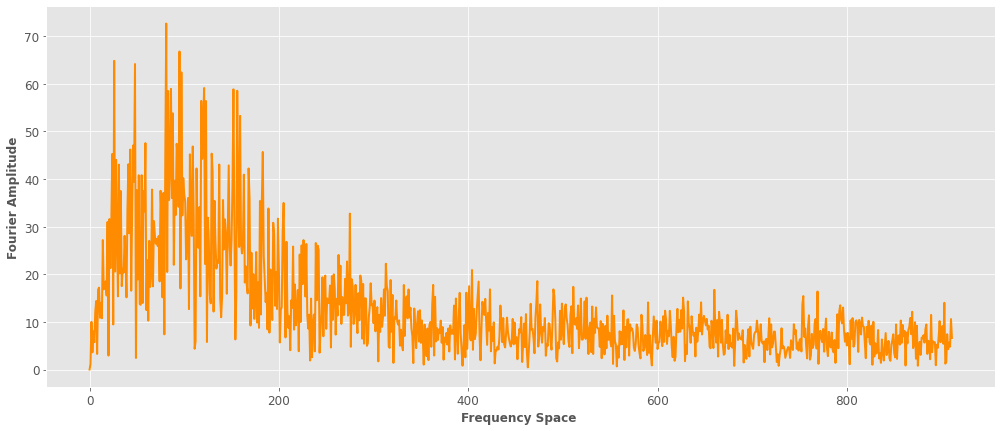

In [137]:
plt.rcParams['figure.figsize'] = (17, 7)
signal = reg.predict(X)-y
signal = signal-signal.mean()
fft_signal = np.abs(np.fft.fft(signal))
plt.plot(fft_signal[0:int(len(signal)/2)],color='darkorange')
plt.xlabel('Frequency Space ')
plt.ylabel('Fourier Amplitude')

In [138]:
new_Xph = fft_signal[0:int(len(signal)/2.)]

In [139]:
#functions from intro to BI lectures 8

def filter_signal(th):
    f_s = fft_filter(th)
    return np.real(np.fft.ifft(f_s))
def fft_filter(perc):
    fft_signal = np.fft.fft(signal)
    fft_abs = np.abs(fft_signal)
    th=perc*(2*fft_abs[0:int(len(signal)/2.)]/len(new_Xph)).max()
    fft_tof=fft_signal.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof
def fft_filter_amp(th):
    fft = np.fft.fft(signal)
    fft_tof=fft.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof_abs[fft_tof_abs<=th]=0
    return fft_tof_abs[0:int(len(fft_tof_abs)/2.)]

filter it. We are cutting out all the frequencies below a certain level. This level is set by using the maximum amplitude as a reference value.

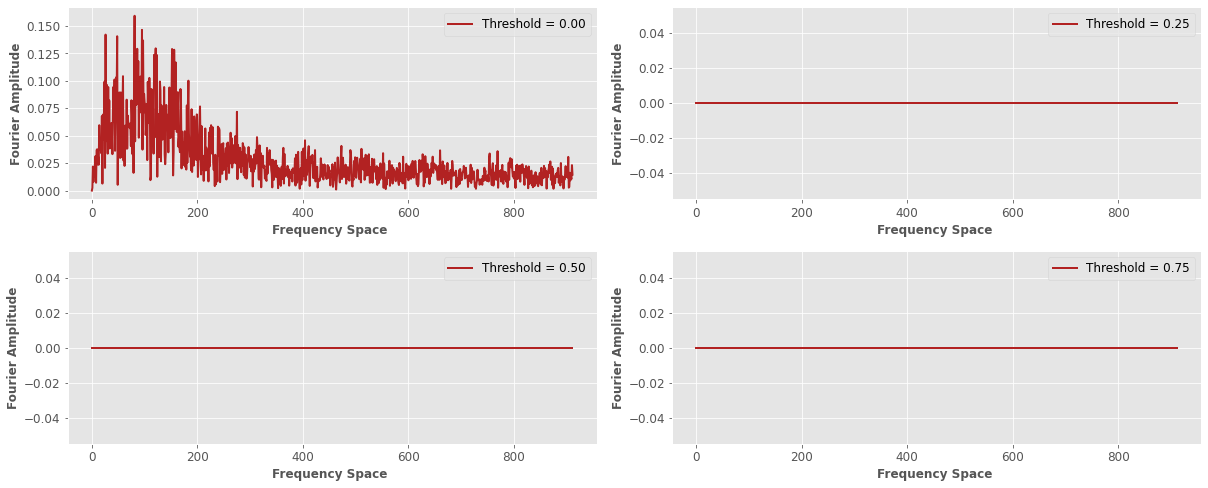

In [140]:
th_list = np.linspace(0,1,5)
th_list = th_list[0:len(th_list)-1]
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter_amp(th_i)
    plt.plot(th_filter[0:int(len(signal)/2.)],color='firebrick',label='Threshold = %.2f'%(th_list[i]))
    plt.xlabel('Frequency Space ')
    plt.ylabel('Fourier Amplitude')
    plt.legend()
plt.tight_layout()

inverse transform each filtered Fourier transforms

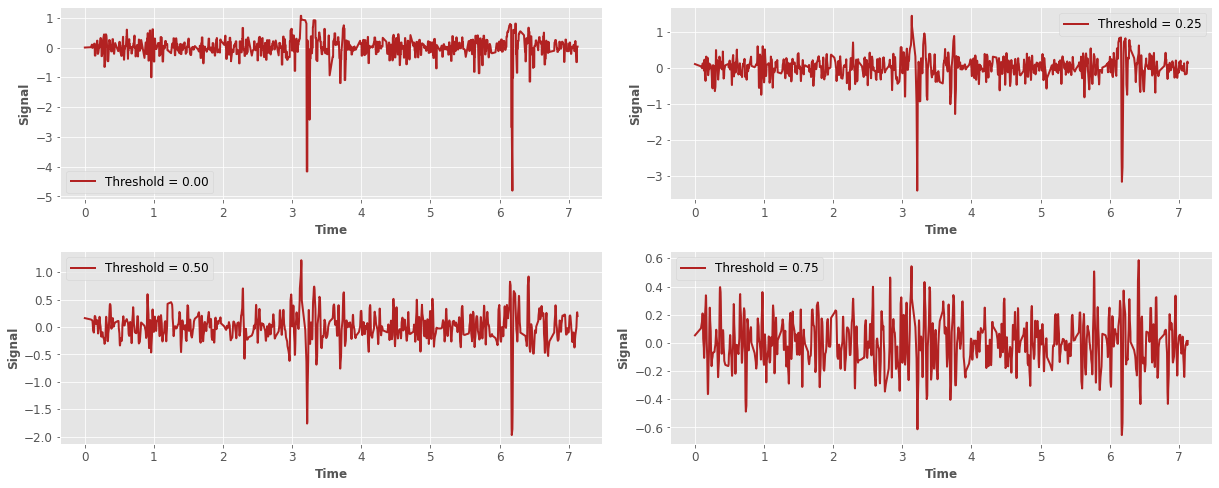

In [141]:
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter(th_i)
    signal_filter =np.real(np.fft.ifft(th_filter))
    plt.plot(x,signal_filter,color='firebrick',label='Threshold = %.2f'%(th_list[i]))
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend()
plt.tight_layout()

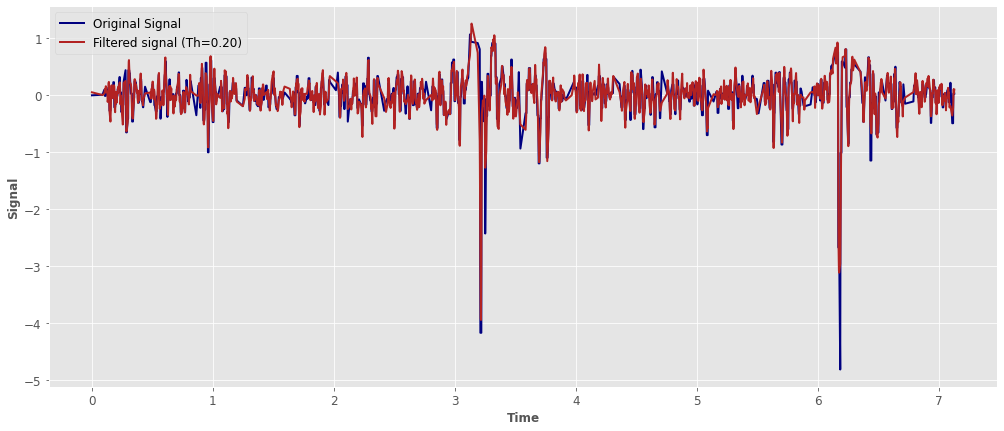

In [142]:
th_value = 0.2 #hit and trile , you may change and check this value
example_signal = filter_signal(th_value)
plt.plot(x,signal,color='navy',label='Original Signal')
plt.plot(x,example_signal,color='firebrick',label='Filtered signal (Th=%.2f)'%(th_value))
#plt.plot(x,signal-example_signal,color='darkorange',label='Difference')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()

signal should not correlate to the noise, ...................... correlation value and p-value) at different value of threshold

Text(0.5, 0, 'Threshold Value')

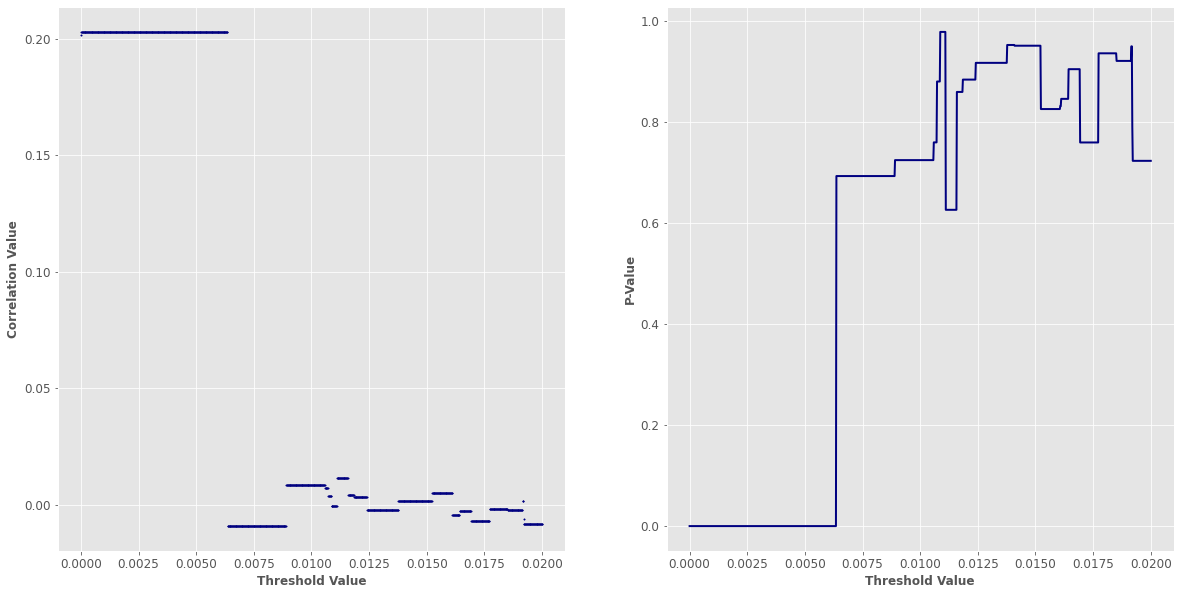

In [143]:
th_list = np.linspace(0,0.02,1000)
th_list = th_list[0:len(th_list)]
p_values = []
corr_values = []
for t in th_list:
    filt_signal = filter_signal(t)
    res = stats.spearmanr(signal,signal-filt_signal)
    p_values.append(res.pvalue)
    corr_values.append(res.correlation)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(th_list,corr_values,s=2,color='navy')
#plt.plot(th_list,p_values)
plt.ylabel('Correlation Value')
plt.xlabel('Threshold Value')
plt.subplot(1,2,2)
plt.plot(th_list,p_values,color='navy')
#plt.plot(th_list,p_values)
plt.ylabel('P-Value')
plt.xlabel('Threshold Value')

In [144]:
th_opt = th_list[np.array(corr_values).argmin()]
th_opt

0.006366366366366366

FOURIER TRANSFORM ON Bricked1 DATA.

In [145]:
df10 = Bricked1.copy()

In [146]:
df10.head()

timeRelativeRef  samplingTime  epoch  latitude  longitude  altitude  speed  \
0           536820        536820    NaN       NaN        NaN       NaN    NaN   
1           536895            75    NaN       NaN        NaN       NaN    NaN   
2           536911            16    NaN       NaN        NaN       NaN    NaN   
3           536915             4    NaN       NaN        NaN       NaN    NaN   
4           536918             3    NaN       NaN        NaN       NaN    NaN   

   satellites  accelerationX  accelerationY  ...  humidity  \
0         NaN          -0.23            0.0  ...       NaN   
1         NaN          -0.22            0.0  ...       NaN   
2         NaN          -0.22            0.0  ...       NaN   
3         NaN          -0.22            0.0  ...       NaN   
4         NaN          -0.22            0.0  ...       NaN   

   barometricPressure  light  PM1.0_CF1  PM2.5_CF1  PM10.0_CF1  PM1.0_Auto  \
0                 NaN    NaN        NaN        NaN         NaN         NaN   
1                 NaN    NaN        NaN        NaN         NaN         NaN   
2                 NaN    NaN        NaN        NaN         NaN         NaN   
3                 NaN    NaN        NaN        NaN         NaN         NaN   
4                 NaN    NaN        NaN        NaN         NaN         NaN   

   PM2.5_Auto  PM10.0_Auto    label  
0         NaN          NaN  bricked  
1         NaN          NaN  bricked  
2         NaN          NaN  bricked  
3         NaN          NaN  bricked  
4         NaN          NaN  bricked  

[5 rows x 25 columns]

In [147]:
df10['timeRelative_sec'] = df10['timeRelativeRef']/1000  # convert ms to sec. to understand easily
df10['timeRelative_sec'] = df10['timeRelative_sec']-min(df10['timeRelative_sec']) # start time form zero to make more sence 

df10['equal_sampled_numbers'] = df10.index # i think we don’t have equally sampled time space, lets creates one starting from zero

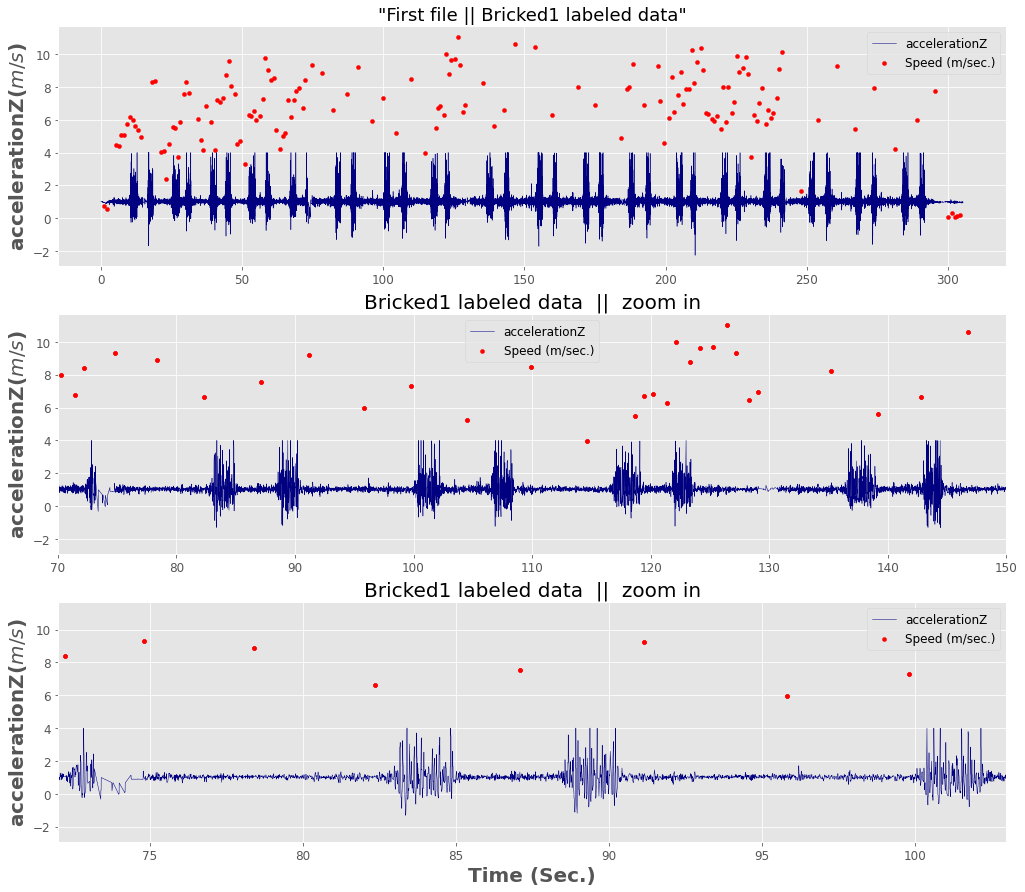

In [148]:
x = df10.timeRelative_sec
xe = df10.equal_sampled_numbers
y = df10.accelerationZ

plt.rcParams['figure.figsize'] = (17, 15)

plt.subplot(3,1,1)
plt.plot(x,y,'navy', linewidth = 0.5);plt.title('"First file || Bricked1 labeled data"',fontsize=18)
speed =plt.scatter(x, df10['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(x,y,'navy', linewidth = 0.5)
speed =plt.scatter(x, df10['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
speed =plt.scatter(x, df10['speed'], color = 'red',marker='.')
plt.title('Bricked1 labeled data  ||  zoom in',fontsize=20)
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
#plt.xlabel('Time (Sec.)',fontsize=20)
plt.xlim(70, 150)


plt.subplot(3,1,3)
plt.plot(x,y,'navy', linewidth = 0.5)
speed =plt.scatter(x, df10['speed'], color = 'red',marker='.')
plt.legend(['accelerationZ',"Speed (m/sec.)"])
speed =plt.scatter(x, df10['speed'], color = 'red',marker='.')
plt.title('Bricked1 labeled data  ||  zoom in',fontsize=20)
plt.ylabel('accelerationZ($m/s$)',fontsize=20)
plt.xlabel('Time (Sec.)',fontsize=20)
plt.xlim(70, 150)
plt.xlim(72, 103)
plt.rcParams['figure.figsize'] = (17, 7)

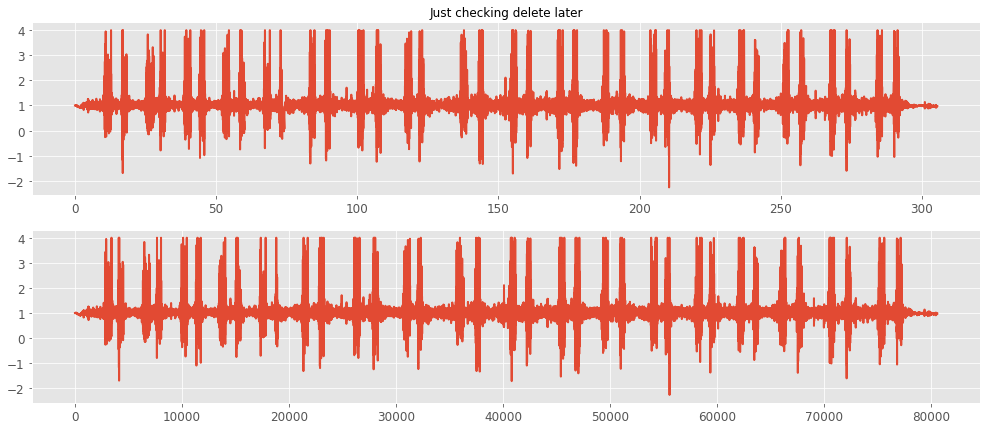

In [149]:
plt.subplot(2,1,1)
plt.title("Just checking delete later")
plt.plot(x,y)
plt.subplot(2,1,2)
plt.plot(xe,y)

Fourier analysis works well only for stationary data, use Polynomial Regression to find the best-fit polynomial function that fits the data. Then we will remove this line and obtain the stationary time-series ... (LEcture 4 Ts)

Text(0, 0.5, 'Price')

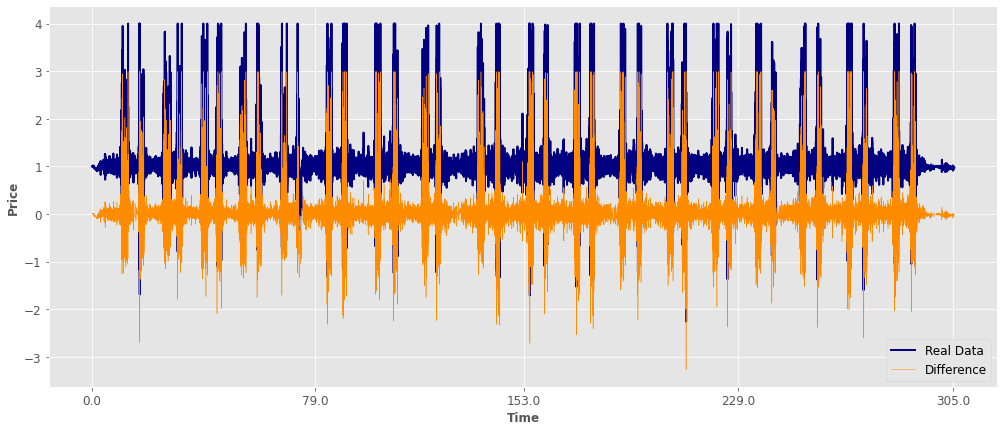

In [150]:
idx = np.linspace(0,len(x)-1,5).astype(int)
X = np.array(df10.index).reshape(-1,1)
pf = PolynomialFeatures(3)
X = pf.fit_transform(X)
reg = LinearRegression().fit(X, y)
reg.score(X, y)
#plt.plot(x,reg.predict(X),label='Polynomial Regression',color='firebrick', linewidth = 5)
plt.plot(x,y,label='Real Data',color='navy')
plt.plot(x,y-reg.predict(X),label='Difference',color='darkorange', linewidth = 0.5)
plt.legend()
plt.xticks(x[idx].round(),x[idx].round())
plt.xlabel('Time')
plt.ylabel('Price')

Fourier transform and plot the amplitude:¶ Denoising Algorithm

Text(0, 0.5, 'Fourier Amplitude')

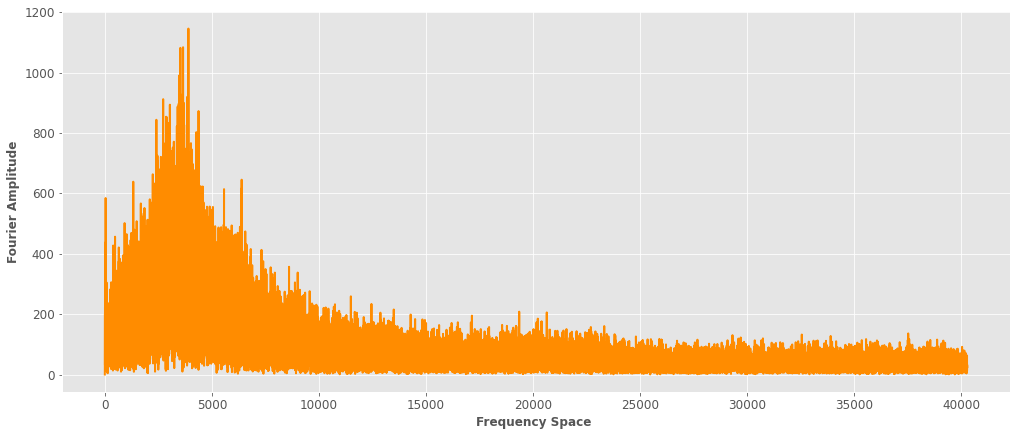

In [151]:
plt.rcParams['figure.figsize'] = (17, 7)
signal = reg.predict(X)-y
signal = signal-signal.mean()
fft_signal = np.abs(np.fft.fft(signal))
plt.plot(fft_signal[0:int(len(signal)/2)],color='darkorange')
plt.xlabel('Frequency Space ')
plt.ylabel('Fourier Amplitude')

In [152]:
new_Xph = fft_signal[0:int(len(signal)/2.)]

In [153]:
#functions from intro to BI lectures 8

def filter_signal(th):
    f_s = fft_filter(th)
    return np.real(np.fft.ifft(f_s))
def fft_filter(perc):
    fft_signal = np.fft.fft(signal)
    fft_abs = np.abs(fft_signal)
    th=perc*(2*fft_abs[0:int(len(signal)/2.)]/len(new_Xph)).max()
    fft_tof=fft_signal.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof
def fft_filter_amp(th):
    fft = np.fft.fft(signal)
    fft_tof=fft.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof_abs[fft_tof_abs<=th]=0
    return fft_tof_abs[0:int(len(fft_tof_abs)/2.)]

filter it. We are cutting out all the frequencies below a certain level. This level is set by using the maximum amplitude as a reference value.

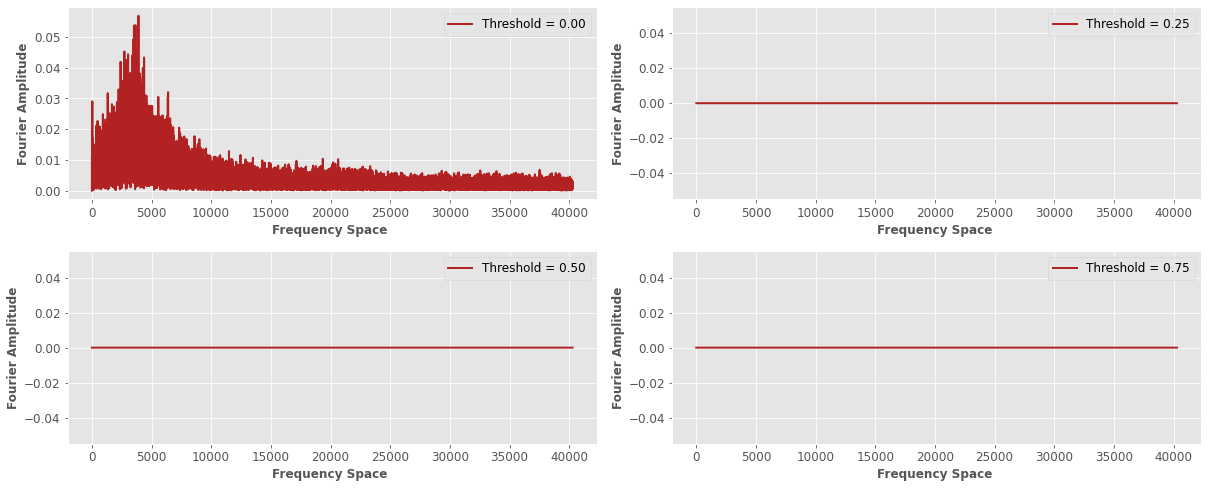

In [154]:
th_list = np.linspace(0,1,5)
th_list = th_list[0:len(th_list)-1]
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter_amp(th_i)
    plt.plot(th_filter[0:int(len(signal)/2.)],color='firebrick',label='Threshold = %.2f'%(th_list[i]))
    plt.xlabel('Frequency Space ')
    plt.ylabel('Fourier Amplitude')
    plt.legend()
plt.tight_layout()

inverse transform each filtered Fourier transforms

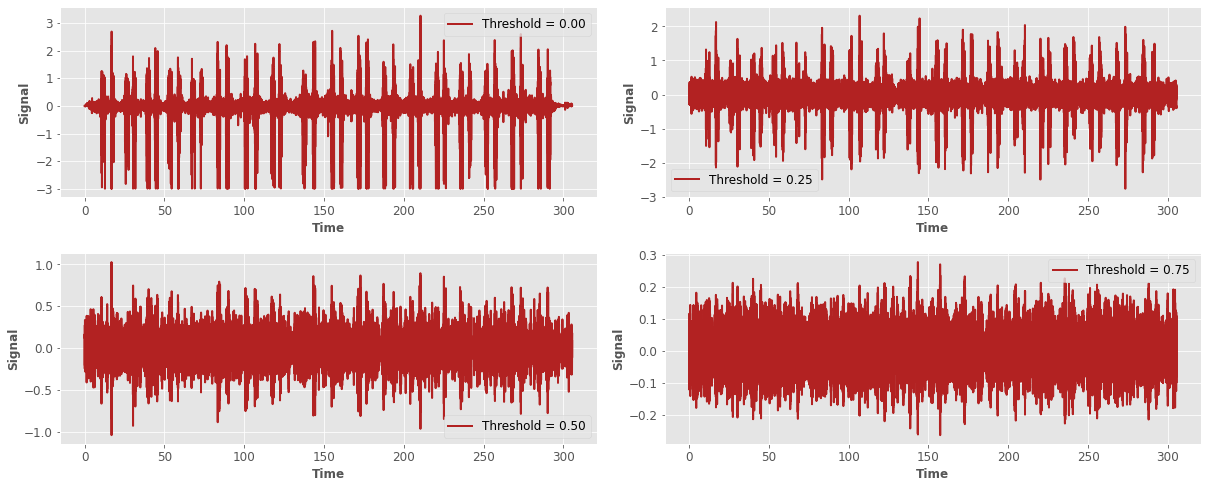

In [155]:
for i in range(0,4):
    plt.subplot(2,2,i+1)
    th_i=th_list[i].round(2)
    th_filter = fft_filter(th_i)
    signal_filter =np.real(np.fft.ifft(th_filter))
    plt.plot(x,signal_filter,color='firebrick',label='Threshold = %.2f'%(th_list[i]))
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend()
plt.tight_layout()

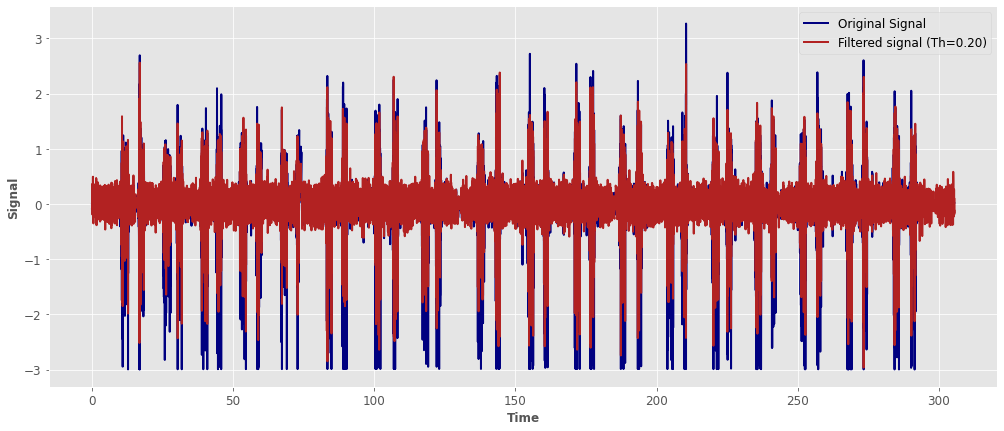

In [156]:
th_value = 0.2 #hit and trile , you may change and check this value
example_signal = filter_signal(th_value)
plt.plot(x,signal,color='navy',label='Original Signal')
plt.plot(x,example_signal,color='firebrick',label='Filtered signal (Th=%.2f)'%(th_value))
#plt.plot(x,signal-example_signal,color='darkorange',label='Difference')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()

signal should not correlate to the noise, ...................... correlation value and p-value) at different value of threshold

Text(0.5, 0, 'Threshold Value')

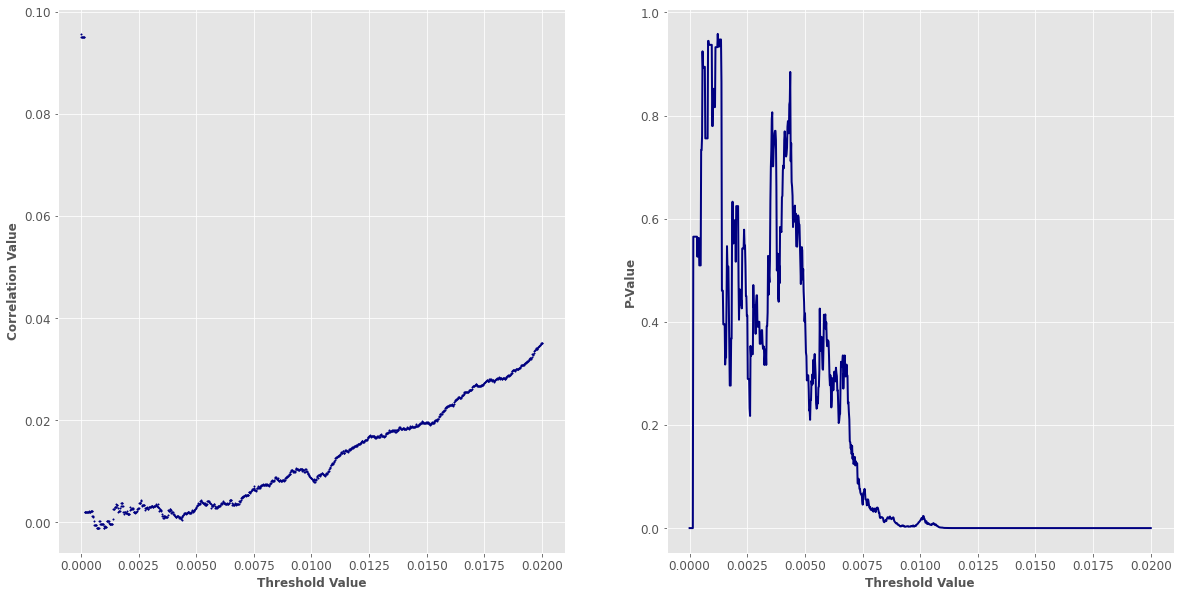

In [157]:
th_list = np.linspace(0,0.02,1000)
th_list = th_list[0:len(th_list)]
p_values = []
corr_values = []
for t in th_list:
    filt_signal = filter_signal(t)
    res = stats.spearmanr(signal,signal-filt_signal)
    p_values.append(res.pvalue)
    corr_values.append(res.correlation)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(th_list,corr_values,s=2,color='navy')
#plt.plot(th_list,p_values)
plt.ylabel('Correlation Value')
plt.xlabel('Threshold Value')
plt.subplot(1,2,2)
plt.plot(th_list,p_values,color='navy')
#plt.plot(th_list,p_values)
plt.ylabel('P-Value')
plt.xlabel('Threshold Value')

In [158]:
th_opt = th_list[np.array(corr_values).argmin()]
th_opt

0.0006806806806806807